# RMS Maple Tree Sap Harvesting Exploratory Data Analysis

**Purpose:**  Inspection and exploration of 2020 season data of sap collection remote monitoring devices and build features for sap flow prediction.

## Load and Inspection of Full Dataset

### Load and Review Data

In [1]:
# load libraries
import pandas as pd
import numpy as np

# load process data
sap_df = pd.read_excel('2020 Season Data.xlsx', sheet_name='Stat')

# load location data
loc_df = pd.read_excel('2020 Season Data.xlsx', sheet_name='Vitals')


In [2]:
# inspect sap data types
sap_df.info()

# sample 5 rows to inspect
sap_df.sample(n=5, random_state=27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193065 entries, 0 to 193064
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   PUBLISHED_AT (UTC)  193065 non-null  datetime64[ns]
 1   DEVICE_ID           193065 non-null  object        
 2   TempF               193065 non-null  float64       
 3   Tank                193065 non-null  float64       
 4   Vac                 193065 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 7.4+ MB


PUBLISHED_AT (UTC)                 DEVICE_ID  TempF   Tank     Vac
117674 2020-02-20 21:01:17.380  e00fce6824cfed90b8f4847a   13.2  158.8 -615.24
158865 2020-01-22 09:18:57.007  e00fce6824cfed90b8f4847a   62.3   64.0    0.57
16675  2020-04-07 08:22:13.727  e00fce68e4f625acc501ce01   44.6    3.5    1.58
20974  2020-04-04 06:41:20.423  e00fce682c0fbd41f8271091   41.5   -6.0    0.91
5049   2020-04-16 04:38:30.007  e00fce683945d780412a3ad6   22.1  103.9    0.54

In [3]:
# get summary stats of numeric features, transpose output to make more readable
sap_df.describe().T


count       mean         std      min   25%    50%    75%     max
TempF  193065.0  44.464515   15.184012   -19.60  32.0  41.40  60.20  185.00
Tank   193065.0  30.165446  114.082626 -1233.50  13.3  42.80  80.00  247.00
Vac    193065.0 -11.360602  102.620044  -621.58   0.6   0.98   2.42   29.54

In [4]:
# inspect loc data types
loc_df.info()

# sample 5 rows to inspect
loc_df.sample(n=5, random_state=27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569 entries, 0 to 4568
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PUBLISHED_AT   4569 non-null   datetime64[ns]
 1   DEVICE_ID      4569 non-null   object        
 2   BATTERY        4569 non-null   object        
 3   SIGNAL         4569 non-null   object        
 4   CELLULAR       4569 non-null   object        
 5   LatLon         4450 non-null   object        
 6   hourlyWeather  4450 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 250.0+ KB


PUBLISHED_AT                 DEVICE_ID  \
1739 2020-03-18 08:00:34.627  e00fce68e4f625acc501ce01   
1400 2020-03-22 17:27:59.883  e00fce683945d780412a3ad6   
3142 2020-02-19 02:42:18.807  e00fce68dc772fb3d147aa3c   
3953 2020-01-02 23:33:40.387  e00fce68c37e04ac6bafd7ad   
2908 2020-02-29 09:17:25.633  e00fce68c02f6abda1770a60   

                                        BATTERY  \
1739  {'charge': 54.71, 'state': 'discharging'}   
1400   {'charge': 5.05, 'state': 'discharging'}   
3142  {'charge': 86.35, 'state': 'discharging'}   
3953    {'charge': 100, 'state': 'discharging'}   
2908  {'charge': 93.84, 'state': 'discharging'}   

                                                 SIGNAL  \
1739  {'at': 'LTE', 'strength': 15.46, 'strength_uni...   
1400  {'at': 'LTE', 'strength': 27.83, 'strength_uni...   
3142  {'rssi': -121, 'strength': 20.62, 'quality': 5...   
3953  {'rssi': -120, 'strength': 21.64, 'quality': 5...   
2908  {'rssi': -90, 'strength': 52.57, 'quality': 76...   

                                               CELLULAR  \
1739  {'radio_access_technology': 'LTE', 'operator':...   
1400  {'radio_access_technology': 'LTE', 'operator':...   
3142  {'cell_global_identity': {'mobile_country_code...   
3953  {'cell_global_identity': {'mobile_country_code...   
2908  {'cell_global_identity': {'mobile_country_code...   

                                                 LatLon  \
1739  {'location': {'lat': 45.1560315, 'lng': -89.96...   
1400  {'location': {'lat': 44.3369174, 'lng': -87.83...   
3142  {'location': {'lat': 45.081789699999995, 'lng'...   
3953  {'location': {'lat': 44.2040477, 'lng': -88.32...   
2908  {'location': {'lat': 44.2451106, 'lng': -87.63...   

                                          hourlyWeather  
1739  {'error': 'Your API key does not allow access ...  
1400  {'error': 'Your API key does not allow access ...  
3142  {'error': 'Your API key does not allow access ...  
3953  {'data': [{'wind_cdir': 'WSW', 'rh': 100, 'pod...  
2908  {'error': 'Your API key does not allow access ...

In [5]:
# inspect how many observations were collected in the sap and location df's per device
( pd.concat([sap_df.DEVICE_ID.value_counts(), loc_df.DEVICE_ID.value_counts()],
            join='outer',
            keys=['sap counts', 'loc counts'],
            names=['device_id'],
            axis='columns') ) 

device_id                 sap counts  loc counts
e00fce6824cfed90b8f4847a       39439       967.0
e00fce68e4f625acc501ce01       20699       371.0
e00fce68c37e04ac6bafd7ad       18515       207.0
e00fce68ce2da8e69cb18999       17774       131.0
e00fce68c02f6abda1770a60       16529       222.0
e00fce683945d780412a3ad6       15278      1406.0
e00fce682c0fbd41f8271091       12160       147.0
e00fce689a29ae29a276110a       12095       138.0
e00fce68dc772fb3d147aa3c       11510       243.0
e00fce687cba489cc38e98b3       11403       230.0
e00fce68cc9cee8042d99cc8        7192       201.0
e00fce68db9283aa8002fb11        4882       240.0
e00fce688e6a6ec5f95af577        3898        61.0
e00fce68352e555e5e7fe43d        1669         NaN
e00fce6868ae46b8a8dfc6a0          22         5.0

### Assign a new ID to each device to assist with the data pipeline

In [6]:
# create series of devices sorted by sap data counts
id_lookup = sap_df.DEVICE_ID.value_counts().sort_values(ascending = False)

id_lookup

e00fce6824cfed90b8f4847a    39439
e00fce68e4f625acc501ce01    20699
e00fce68c37e04ac6bafd7ad    18515
e00fce68ce2da8e69cb18999    17774
e00fce68c02f6abda1770a60    16529
e00fce683945d780412a3ad6    15278
e00fce682c0fbd41f8271091    12160
e00fce689a29ae29a276110a    12095
e00fce68dc772fb3d147aa3c    11510
e00fce687cba489cc38e98b3    11403
e00fce68cc9cee8042d99cc8     7192
e00fce68db9283aa8002fb11     4882
e00fce688e6a6ec5f95af577     3898
e00fce68352e555e5e7fe43d     1669
e00fce6868ae46b8a8dfc6a0       22
Name: DEVICE_ID, dtype: int64

Some devices have very few observations and will be dropped from analysis in proceeding steps

In [7]:
# replace the counts with a range index id starting with 0
ids = range(len(id_lookup))

for ii in ids:
    id_lookup[ii] = ii
    

# rename the series value to dev_id
id_lookup.rename('dev_id', inplace=True)

# review the device_id to devid series lookup    
id_lookup


e00fce6824cfed90b8f4847a     0
e00fce68e4f625acc501ce01     1
e00fce68c37e04ac6bafd7ad     2
e00fce68ce2da8e69cb18999     3
e00fce68c02f6abda1770a60     4
e00fce683945d780412a3ad6     5
e00fce682c0fbd41f8271091     6
e00fce689a29ae29a276110a     7
e00fce68dc772fb3d147aa3c     8
e00fce687cba489cc38e98b3     9
e00fce68cc9cee8042d99cc8    10
e00fce68db9283aa8002fb11    11
e00fce688e6a6ec5f95af577    12
e00fce68352e555e5e7fe43d    13
e00fce6868ae46b8a8dfc6a0    14
Name: dev_id, dtype: int64

In [8]:
# replace DEVICE_ID field with simpler form
# used to increase speed as maintaining the original DEVICE_ID slows processing

# list of dataframes to process
df_list = [sap_df, loc_df]  

# replace DEVICE_ID with a simpler form to aid the data pipeline
# NOTE:  int8 datatype is good for device ids 0-255; need to expand for more devices in the data pipeline
for df in df_list:
    df['DEVICE_ID'] = df['DEVICE_ID'].map(id_lookup).astype('int8')


In [9]:
# inspect dataframes
sap_df.sample(5)

PUBLISHED_AT (UTC)  DEVICE_ID  TempF  Tank     Vac
61402  2020-03-19 08:07:25.157          3   34.2  20.7   11.00
159512 2020-01-20 01:42:22.357          0   62.0  64.1    0.26
170943 2019-12-21 18:15:52.960          2   34.8  86.2    0.47
157423 2020-01-27 03:25:56.660          0   32.0  67.2 -615.24
76922  2020-03-13 02:37:32.740          1   32.5  31.2   26.40

In [10]:
loc_df.sample(5)


PUBLISHED_AT  DEVICE_ID  \
2548 2020-03-06 02:25:39.810          8   
185  2020-04-09 09:56:15.567          1   
3367 2020-02-12 04:14:36.723          1   
480  2020-04-01 16:46:06.157          5   
2164 2020-03-11 10:37:50.037          5   

                                        BATTERY  \
2548  {'charge': 75.77, 'state': 'discharging'}   
185    {'charge': 2.82, 'state': 'discharging'}   
3367     {'charge': 85, 'state': 'discharging'}   
480    {'charge': 2.72, 'state': 'discharging'}   
2164  {'charge': 64.76, 'state': 'discharging'}   

                                                 SIGNAL  \
2548  {'rssi': -137, 'strength': 4.12, 'quality': 0,...   
185   {'at': 'LTE', 'strength': 17.52, 'strength_uni...   
3367  {'rssi': -115, 'strength': 26.8, 'quality': 5....   
480   {'at': 'LTE', 'strength': 27.83, 'strength_uni...   
2164  {'rssi': -140, 'strength': 1.03, 'quality': 10...   

                                               CELLULAR  \
2548  {'cell_global_identity': {'mobile_country_code...   
185   {'radio_access_technology': 'LTE', 'operator':...   
3367  {'cell_global_identity': {'mobile_country_code...   
480   {'radio_access_technology': 'LTE', 'operator':...   
2164  {'cell_global_identity': {'mobile_country_code...   

                                                 LatLon  \
2548  {'location': {'lat': 45.0714817, 'lng': -90.06...   
185   {'location': {'lat': 45.1583851, 'lng': -89.98...   
3367  {'location': {'lat': 44.1880512, 'lng': -88.29...   
480   {'location': {'lat': 44.3363448, 'lng': -87.83...   
2164  {'location': {'lat': 44.319823799999995, 'lng'...   

                                          hourlyWeather  
2548  {'error': 'Your API key does not allow access ...  
185   {'error': 'Your API key does not allow access ...  
3367  {'error': 'Your API key does not allow access ...  
480   {'error': 'Your API key does not allow access ...  
2164  {'error': 'Your API key does not allow access ...

### Extract Latitude and Longitude information in separate columns

In [11]:
# get counts of invalid LatLon values
# -100
print(f'Count of -100 before: {sum(loc_df.LatLon == -100)}')
# NaN
print(f'Count of NaN before: {sum(loc_df.LatLon.isna())}')


# replace invalid values with default dict string; sets invalid locations to 0 values and allows easier parsing
loc_df['LatLon'][loc_df['LatLon'] == -100] = "{'location': {'lat': 0, 'lng': 0}, 'accuracy': 0}"
loc_df['LatLon'] = loc_df['LatLon'].fillna("{'location': {'lat': 0, 'lng': 0}, 'accuracy': 0}")


# get counts after transformation
# -100
print(f'Count of -100 after: {sum(loc_df.LatLon == -100)}')
# NaN
print(f'Count of NaN after: {sum(loc_df.LatLon.isna())}')


Count of -100 before: 218
Count of NaN before: 119
Count of -100 after: 0
Count of NaN after: 0


C:\Users\thomp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [12]:
# extract lat and lng values by converting LatLon field to a dict

# load abstract syntax trees library for literal_eval function to eliminate the need for custom string parsing
import ast

# functions to convert LatLon string to a Python container (dicts in this application)
# and extract value to return
def get_latitude(s):
    s_dict = ast.literal_eval(s)
    return s_dict['location']['lat']

def get_longitude(s):
    s_dict = ast.literal_eval(s)
    return s_dict['location']['lng']

# append lat and lng columns to df for future usage
loc_df['lat'] = loc_df['LatLon'].apply(get_latitude)
loc_df['lng'] = loc_df['LatLon'].apply(get_longitude)



In [13]:
# inspect values
loc_df.sample(5)


PUBLISHED_AT  DEVICE_ID  \
3482 2020-02-09 02:04:01.647          2   
2722 2020-03-03 19:28:29.177          5   
80   2020-04-15 03:02:06.617          5   
4142 2019-12-20 05:31:31.397          0   
1871 2020-03-16 17:12:00.767          1   

                                        BATTERY  \
3482   {'charge': 30.2, 'state': 'discharging'}   
2722  {'charge': 84.42, 'state': 'discharging'}   
80      {'charge': 100, 'state': 'discharging'}   
4142  {'charge': 95.57, 'state': 'discharging'}   
1871  {'charge': 63.27, 'state': 'discharging'}   

                                                 SIGNAL  \
3482  {'rssi': -124, 'strength': 17.52, 'quality': 1...   
2722  {'rssi': -117, 'strength': 24.74, 'quality': 4...   
80    {'at': 'LTE', 'strength': 26.8, 'strength_unit...   
4142  {'rssi': -114, 'strength': 27.83, 'quality': 2...   
1871  {'rssi': -129, 'strength': 12.37, 'quality': 1...   

                                               CELLULAR  \
3482  {'cell_global_identity': {'mobile_country_code...   
2722  {'cell_global_identity': {'mobile_country_code...   
80    {'radio_access_technology': 'LTE', 'operator':...   
4142  {'cell_global_identity': {'mobile_country_code...   
1871  {'cell_global_identity': {'mobile_country_code...   

                                                 LatLon  \
3482  {'location': {'lat': 44.204751099999996, 'lng'...   
2722  {'location': {'lat': 44.322018799999995, 'lng'...   
80    {'location': {'lat': 44.204279299999996, 'lng'...   
4142  {'location': {'lat': 44.203127099999996, 'lng'...   
1871  {'location': {'lat': 45.0714141, 'lng': -90.06...   

                                          hourlyWeather        lat        lng  
3482  {'error': 'Your API key does not allow access ...  44.204751 -88.323879  
2722  {'error': 'Your API key does not allow access ...  44.322019 -87.822137  
80    {'error': 'Your API key does not allow access ...  44.204279 -88.316072  
4142  {'data': [{'wind_cdir': 'ENE', 'rh': 93, 'pod'...  44.203127 -88.318374  
1871  {'error': 'Your API key does not allow access ...  45.071414 -90.063059

### Extract Hour of Day

In [14]:
# extract integer hour of day (0-23) as a possible feature for EDA
# NOTE:  cast as int8 for lower memory usage
sap_df['HourUTC'] = sap_df['PUBLISHED_AT (UTC)'].dt.hour.astype('int8')

# review a sample of the new feature
sap_df[['PUBLISHED_AT (UTC)','HourUTC']].sample(5)

PUBLISHED_AT (UTC)  HourUTC
137654 2020-02-08 17:28:10.577       17
77866  2020-03-12 16:32:42.787       16
98694  2020-03-03 03:08:33.533        3
169300 2019-12-24 16:48:38.607       16
112593 2020-02-23 22:14:38.473       22

## Data Review and Cleansing

### Data Summary Stats

In [15]:
# sap dataset

# check for missing values across all columns
print (sap_df.isna().sum())

# look at summary stats per device
sap_df.groupby(['DEVICE_ID']).describe().T



PUBLISHED_AT (UTC)    0
DEVICE_ID             0
TempF                 0
Tank                  0
Vac                   0
HourUTC               0
dtype: int64


DEVICE_ID                0             1             2             3   \
TempF   count  39439.000000  20699.000000  18515.000000  17774.000000   
        mean      48.476128     41.925064     51.841555     38.638523   
        std       16.327923     13.762579     17.328731     13.282889   
        min      -19.600000      4.300000     -1.400000      7.300000   
        25%       34.000000     31.700000     39.800000     31.200000   
        50%       57.000000     41.700000     60.300000     34.700000   
        75%       62.100000     49.200000     64.400000     44.800000   
        max       92.100000     78.200000     85.200000     94.700000   
Tank    count  39439.000000  20699.000000  18515.000000  17774.000000   
        mean     -14.075339     51.787139     72.065481     39.091808   
        std      216.041872     69.785008     39.164108     47.422248   
        min    -1233.500000   -543.800000   -368.700000   -440.000000   
        25%       26.000000     11.800000     48.300000     16.700000   
        50%       62.000000     43.200000     86.100000     27.100000   
        75%       64.300000    113.700000     97.400000     66.900000   
        max      247.000000    184.700000    246.200000    116.900000   
Vac     count  39439.000000  20699.000000  18515.000000  17774.000000   
        mean     -27.027787    -15.703019     -1.671408      5.604312   
        std      133.827549    107.358631     37.256475     54.243005   
        min     -621.580000   -615.240000   -615.240000   -615.240000   
        25%        0.260000      0.955000      0.300000      0.620000   
        50%        0.730000      1.400000      0.650000      0.990000   
        75%        1.040000      1.660000      0.910000     25.810000   
        max       29.540000     28.870000     13.000000     27.570000   
HourUTC count  39439.000000  20699.000000  18515.000000  17774.000000   
        mean      11.513324     11.482149     11.300891     11.514572   
        std        6.897375      6.880908      6.983973      6.940422   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        6.000000      6.000000      5.000000      5.000000   
        50%       12.000000     11.000000     11.000000     12.000000   
        75%       17.000000     17.000000     17.000000     18.000000   
        max       23.000000     23.000000     23.000000     23.000000   

DEVICE_ID                4             5             6             7   \
TempF   count  16529.000000  15278.000000  12160.000000  12095.000000   
        mean      43.372049     44.262423     37.322747     42.900653   
        std       12.951805     15.540898     10.702184     13.809899   
        min        9.200000     17.000000     16.900000     16.300000   
        25%       33.800000     32.600000     32.000000     32.000000   
        50%       40.300000     39.000000     34.400000     38.900000   
        75%       52.000000     59.300000     40.800000     54.900000   
        max       94.700000    185.000000    185.000000    185.000000   
Tank    count  16529.000000  15278.000000  12160.000000  12095.000000   
        mean      33.196019     34.498069     39.545896     42.012666   
        std       68.043619     46.534427     52.250652     31.720980   
        min     -401.100000   -363.900000   -418.400000   -144.800000   
        25%       16.200000     11.600000     13.800000     16.700000   
        50%       40.700000     21.000000     34.400000     36.700000   
        75%       70.200000     54.050000     62.700000     77.200000   
        max      118.300000    119.000000    125.100000    138.300000   
Vac     count  16529.000000  15278.000000  12160.000000  12095.000000   
        mean       4.547497      4.048362     -8.985080     12.798742   
        std       25.810461     42.394590    116.694438     11.647893   
        min     -615.240000   -615.240000   -615.240000    -27.340000   
        25%        0.580000      0.570000      0.600000  

In [16]:
# device location dataset

# check for missing lat/lng values across all columns
print (loc_df[['lat','lng']].isna().sum())

# look at summary stats per device
loc_df.groupby(['DEVICE_ID'])[['lat','lng']].agg(['count','min', 'max']).T


lat    0
lng    0
dtype: int64


DEVICE_ID          0           1           2           3           4   \
lat count  967.000000  371.000000  207.000000  131.000000  222.000000   
    min      0.000000    0.000000    0.000000    0.000000    0.000000   
    max     44.954459   45.158385   45.348965   44.319722   45.075714   
lng count  967.000000  371.000000  207.000000  131.000000  222.000000   
    min    -93.155647  -90.098597  -90.192162  -88.328041  -90.094167   
    max      0.000000    0.000000    0.000000    0.000000    0.000000   

DEVICE_ID           5           6           7           8           9   \
lat count  1406.000000  147.000000  138.000000  243.000000  230.000000   
    min       0.000000    0.000000    0.000000    0.000000    0.000000   
    max      44.360294   44.352865   44.205843   45.081905   45.158385   
lng count  1406.000000  147.000000  138.000000  243.000000  230.000000   
    min     -88.355223  -88.406074  -88.325634  -90.106812  -90.074340   
    max       0.000000    0.000000    0.000000    0.000000    0.000000   

DEVICE_ID          10          11         12         14  
lat count  201.000000  240.000000  61.000000   5.000000  
    min      0.000000    0.000000   0.000000  44.199253  
    max     45.321970   45.082175  45.126528  44.199253  
lng count  201.000000  240.000000  61.000000   5.000000  
    min    -90.063059  -90.231753 -90.074139 -88.308385  
    max      0.000000    0.000000   0.000000 -88.308385

Many of the process values are out of acceptable range and need to be cleansed.

Reasonable values are roughly as follows:

- TempF = -20 to 80
- Tank = 0 to 100
- Vac = 0 to 30


Some Latitude/Longitude values are not reasonable, such as 0.

In [17]:
# look at date range of timestamps of full dataset
sap_df.groupby(['DEVICE_ID'])['PUBLISHED_AT (UTC)'].describe(percentiles=[], datetime_is_numeric=True).T


DEVICE_ID                             0                              1   \
count                              39439                          20699   
mean       2020-01-26 06:30:40.051723520  2020-02-24 16:50:59.745502720   
min           2000-01-01 00:00:04.023000     2000-01-01 00:00:03.477000   
50%        2020-02-05 19:16:16.427000064  2020-03-10 01:11:48.083000064   
max           2020-04-18 17:54:25.560000     2020-04-20 02:02:40.053000   

DEVICE_ID                             2                              3   \
count                              18515                          17774   
mean       2019-11-12 06:03:05.812577536  2020-03-02 01:20:24.531286016   
min           2000-01-01 00:00:13.023000     2000-01-01 00:00:03.527000   
50%        2019-12-15 12:54:56.476999936     2020-03-08 07:29:33.280000   
max           2020-02-10 06:29:37.057000     2020-04-20 02:14:42.063000   

DEVICE_ID                             4                              5   \
count                              16529                          15278   
mean       2020-02-19 01:23:19.149620992  2020-03-14 14:33:07.405239808   
min           2000-01-01 00:00:03.497000     2000-01-01 00:00:04.037000   
50%           2020-03-03 23:13:54.160000  2020-03-17 08:39:40.623000064   
max           2020-04-02 14:21:16.117000     2020-04-20 02:09:57.057000   

DEVICE_ID                             6                              7   \
count                              12160                          12095   
mean       2020-02-23 06:03:38.774074624  2020-02-26 16:29:22.594364160   
min           2000-01-01 00:00:03.057000     2000-01-01 00:00:03.687000   
50%        2020-03-22 04:36:58.188499968     2020-03-13 21:15:36.540000   
max           2020-04-20 02:16:44.067000     2020-04-04 20:23:25.510000   

DEVICE_ID                             8                              9   \
count                              11510                          11403   
mean       2020-01-26 19:46:52.237751040  2020-01-02 10:24:01.122502400   
min           2000-01-01 00:00:03.643000     2000-01-01 00:00:03.473000   
50%        2020-02-22 01:43:23.376999936  2020-03-19 08:21:47.167000064   
max           2020-03-17 12:33:30.273000     2020-04-12 15:43:43.743000   

DEVICE_ID                             10                             11  \
count                               7192                           4882   
mean       2020-03-25 14:18:12.063053056  2020-03-19 21:41:56.186178304   
min           2000-01-01 00:00:04.023000     2000-01-01 00:00:04.183000   
50%        2020-03-30 17:53:34.387000064  2020-03-27 20:20:16.423000064   
max           2020-04-12 17:16:14.817000     2020-04-05 22:05:50.160000   

DEVICE_ID                             12                             13  \
count                               3898                           1669   
mean       2020-01-15 18:18:00.262349824  2019-11-14 03:20:59.487124992   
min                  2000-01-01 00:00:04     2019-11-11 03:03:45.217000   
50%        2020-02-07 02:59:04.750000128  2019-11-14 03:22:14.452999936   
max           2020-03-09 19:45:06.633000     2019-11-17 03:31:17.087000   

DEVICE_ID                             14  
count                                 22  
mean       2017-05-23 03:01:16.178545664  
min           2000-01-01 00:00:04.100000  
50%        2020-02-20 02:00:22.525000192  
max           2020-02-20 02:48:06.093000

In [18]:
loc_df.groupby(['DEVICE_ID'])['PUBLISHED_AT'].describe(percentiles=[], datetime_is_numeric=True).T

DEVICE_ID                             0                              1   \
count                                967                            371   
mean       2020-01-15 16:00:09.376232448  2020-03-12 23:47:07.395584512   
min           2019-12-08 14:37:18.020000     2020-02-01 01:05:40.903000   
50%        2019-12-20 18:18:33.612999936  2020-03-15 14:52:33.209999872   
max           2020-04-18 09:15:01.743000     2020-04-20 02:24:11.337000   

DEVICE_ID                             2                              3   \
count                                207                            131   
mean       2020-01-13 00:36:32.624999424  2020-03-03 11:25:51.860809984   
min           2019-12-07 05:40:08.337000     2020-02-01 05:11:43.877000   
50%           2020-01-09 16:38:04.980000  2020-02-23 02:55:32.867000064   
max           2020-02-10 06:09:23.277000     2020-04-19 22:47:46.950000   

DEVICE_ID                             4                              5   \
count                                222                           1406   
mean       2020-02-26 20:33:57.963445504  2020-03-18 11:29:55.915115776   
min           2020-02-01 05:00:53.637000     2020-02-18 04:53:33.667000   
50%        2020-02-22 04:47:25.971500032  2020-03-19 03:32:54.135000064   
max           2020-04-02 14:21:37.170000     2020-04-19 15:49:03.160000   

DEVICE_ID                             6                              7   \
count                                147                            138   
mean       2020-03-17 09:30:25.682810112  2020-03-03 04:35:21.904361984   
min           2020-02-29 07:12:02.090000     2020-02-01 05:02:35.460000   
50%        2020-03-12 01:54:14.916999936  2020-03-07 21:19:48.194999808   
max           2020-04-19 23:32:21.787000     2020-04-04 15:54:04.733000   

DEVICE_ID                             8                              9   \
count                                243                            230   
mean       2020-02-25 15:14:01.387136512  2020-03-16 07:37:09.839770368   
min           2020-01-30 05:05:08.957000     2020-02-01 00:32:59.267000   
50%           2020-02-27 15:42:53.640000  2020-03-25 15:09:25.563500032   
max           2020-03-17 11:12:50.793000     2020-04-12 05:39:30.180000   

DEVICE_ID                             10                             11  \
count                                201                            240   
mean       2020-03-29 07:48:24.715143424  2020-03-26 11:51:29.911454208   
min           2020-03-17 05:26:00.407000     2020-03-16 18:43:41.510000   
50%        2020-03-29 20:53:11.323000064  2020-03-25 13:37:11.546999808   
max           2020-04-12 17:16:36.897000     2020-04-05 21:45:28.187000   

DEVICE_ID                             12                             14  
count                                 61                              5  
mean       2020-02-10 00:21:42.318000128     2020-02-20 02:17:12.379200  
min           2020-01-31 04:31:41.277000     2020-02-20 01:53:23.640000  
50%        2020-02-08 22:29:44.147000064  2020-02-20 01:57:51.987000064  
max           2020-03-09 19:52:43.033000     2020-02-20 02:50:40.793000

Some of the timestamp values are out of acceptable range and need to be cleansed or removed.

Reasonable values are roughly from the following time frame that corresponds to sap harvesting:

February 2020 through April 2020


### Data Cleansing

#### Rename Timestamp columns

In [19]:
# rename timestamp columns to TSTAMP
sap_df.rename(columns = {'PUBLISHED_AT (UTC)':'TSTAMP'}, inplace = True) 
loc_df.rename(columns = {'PUBLISHED_AT':'TSTAMP'}, inplace = True) 

#### Drop uneeded features from location dataset

In [20]:
# remove features not in scope of analysis
# note:  the hourlyWeather feature is very sparse and will not be used for analysis

loc_df = loc_df.drop(columns = ['BATTERY','SIGNAL', 'CELLULAR', 'LatLon', 'hourlyWeather'] )

loc_df.sample(5)

TSTAMP  DEVICE_ID        lat        lng
4173 2019-12-19 06:38:18.817          0  44.203112 -88.318409
7    2020-04-19 11:30:10.777          1  45.157186 -89.943303
1903 2020-03-16 03:47:51.033          5  44.336433 -87.837628
4154 2019-12-19 12:53:01.987          0  44.203112 -88.318409
4225 2019-12-18 13:40:54.633          0  44.203533 -88.318833

#### Set unrealistic data to NaN

In [21]:
# sap dataset

# set Tank Levels < 0 and Tank Level > 100 as NaN
sap_df.loc[( (sap_df['Tank'] < 0) | (sap_df['Tank'] > 100) ), 'Tank'] = np.nan

# set Vac level < 0 and Vac Level > 30 as NaN
sap_df.loc[( (sap_df['Vac'] < 0) | (sap_df['Vac'] > 30) ), 'Vac'] = np.nan

# set TempF < -20 and Vac Level > 80 as NaN
sap_df.loc[( (sap_df['TempF'] < -20) | (sap_df['TempF'] > 80) ), 'TempF'] = np.nan

#### Subset the sap dataframe into multiple dataframes by Device ID for analysis

In [22]:
# create a dict of sap dataframes subsetted by the DEVICE_ID to separate each device for analysis
# (using deep copy to eliminate pointer to referenced df)
sap_devices = {ii: sap_df[(sap_df['DEVICE_ID'] == ii)].copy() for ii in ids}


In [23]:
# confirm the number of devices in the df list matches the number of defined devices
len(ids) == len(sap_devices)

True

In [24]:
# assign df index as TSTAMP for each device to analyze by time and sort in ascending order
for ii in range(len(sap_devices)):
        sap_devices[ii] = sap_devices[ii].set_index('TSTAMP').sort_index()

In [25]:
# inspect data for Device 3
sap_devices[3].head(5)

DEVICE_ID  TempF  Tank   Vac  HourUTC
TSTAMP                                                        
2000-01-01 00:00:03.527          3   32.0  77.1  0.76        0
2000-01-01 00:00:03.530          3   32.0  77.4  0.75        0
2000-01-01 00:00:03.547          3   32.0  17.0  0.88        0
2000-01-01 00:00:03.640          3   32.0  40.7   NaN        0
2000-01-01 00:00:03.643          3   32.0  38.8  0.84        0

#### Inspect Timeseries data trends

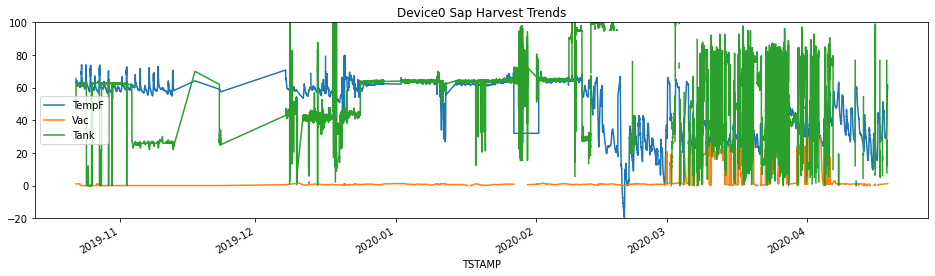

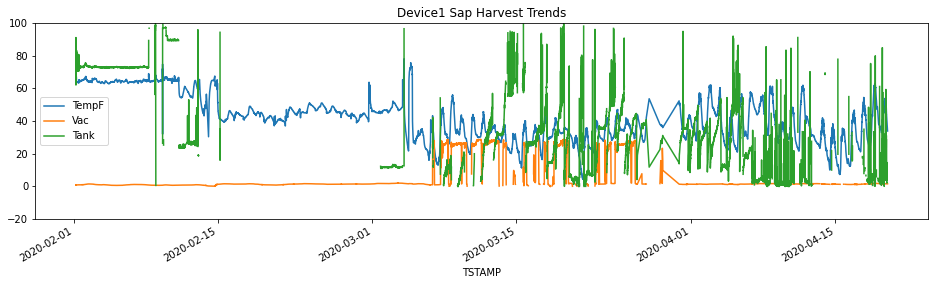

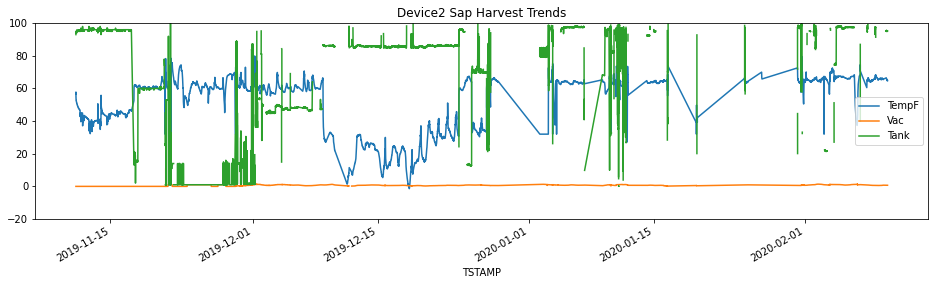

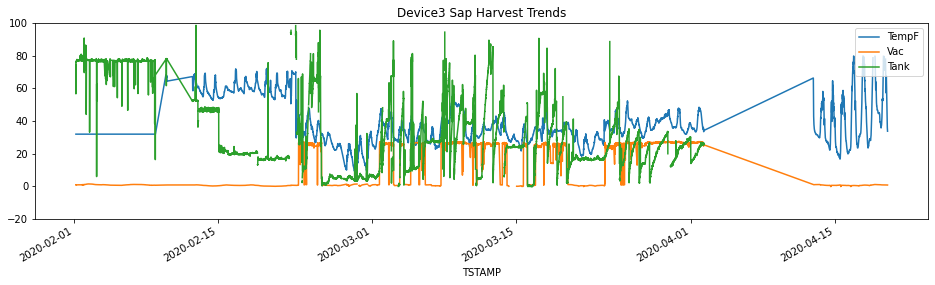

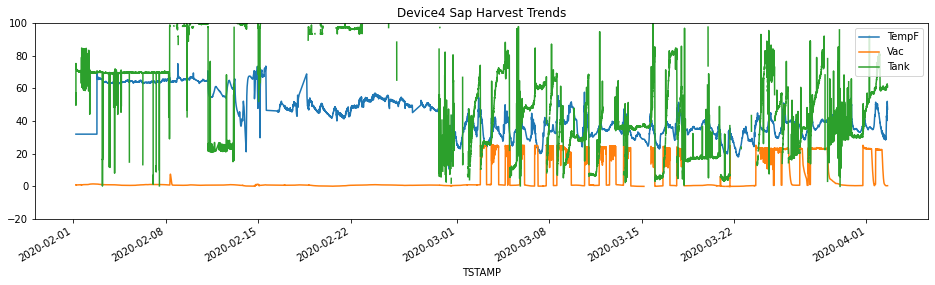

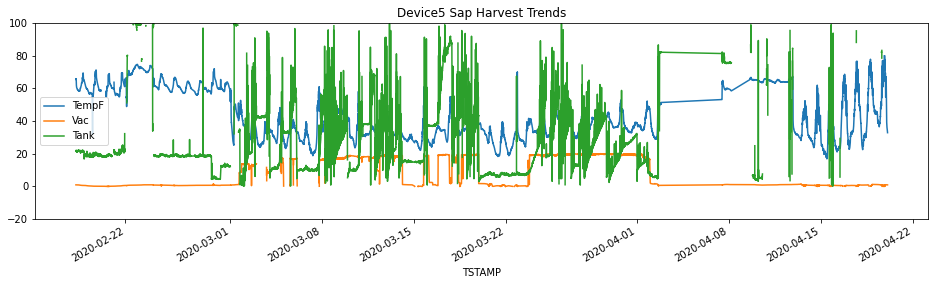

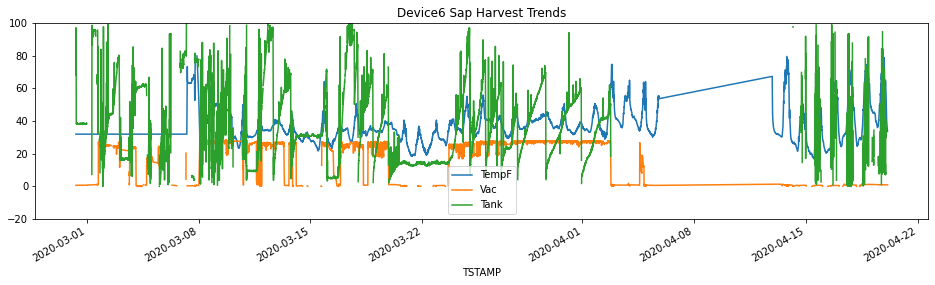

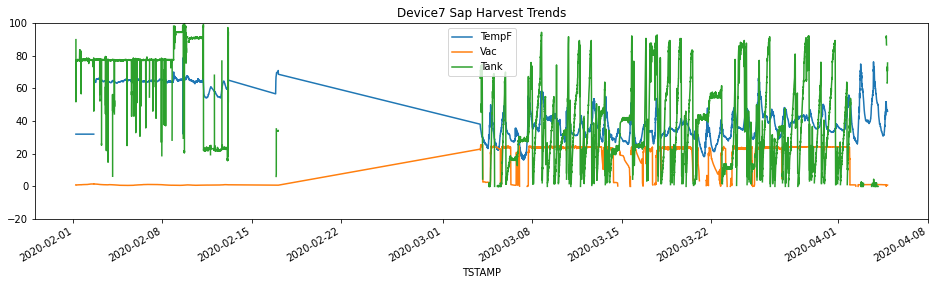

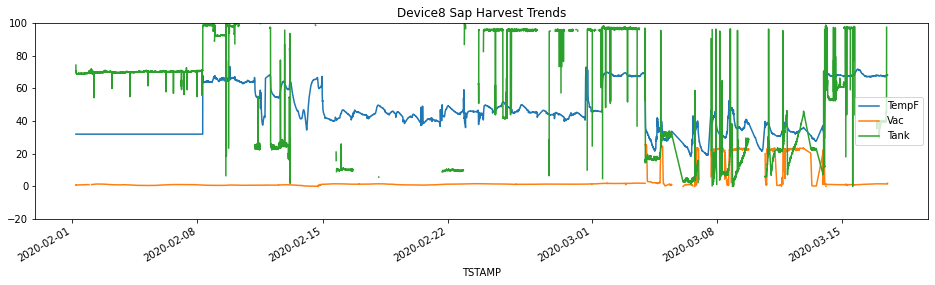

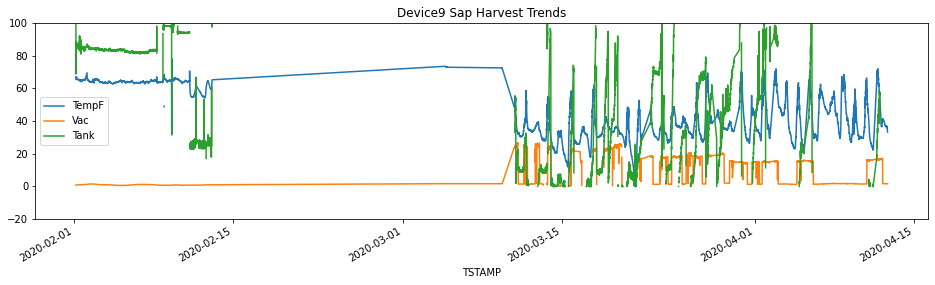

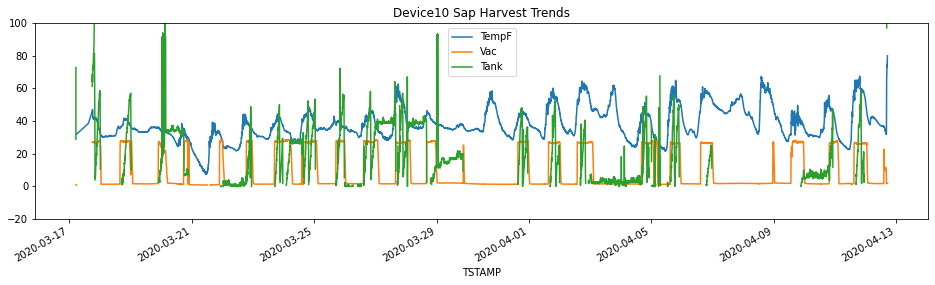

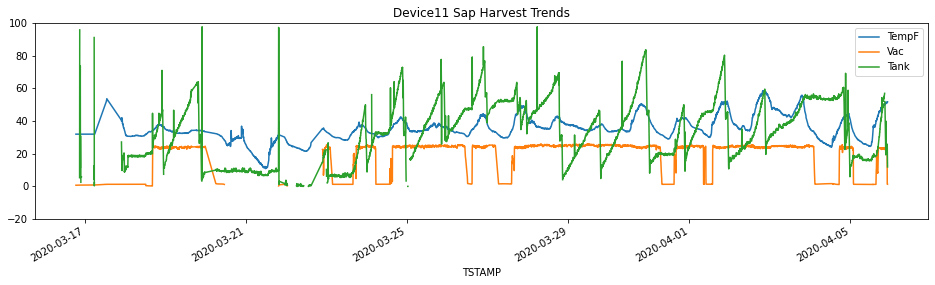

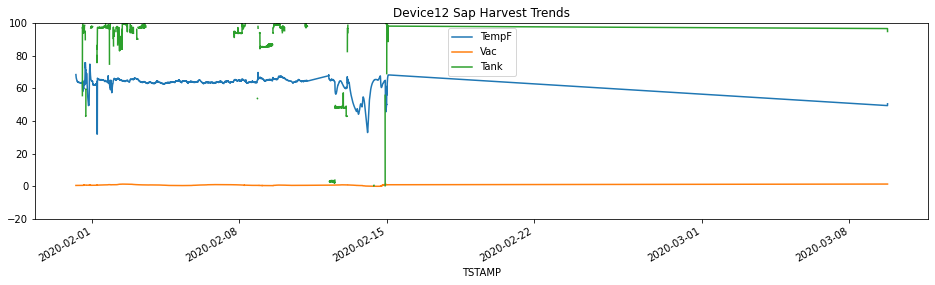

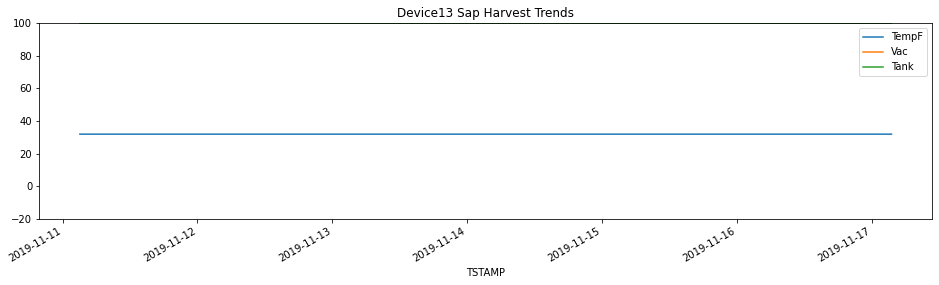

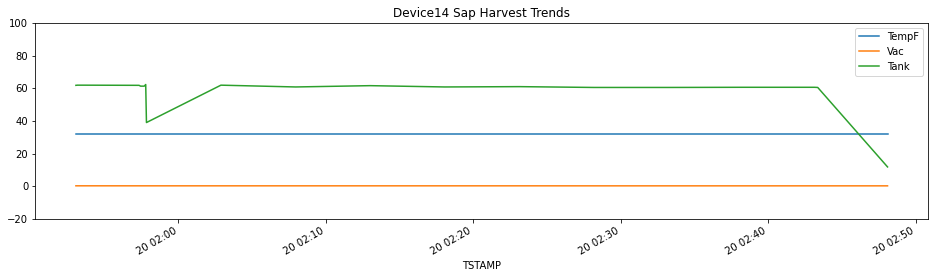

In [26]:
# create process plots of each device to inspect data within sap harvesting timeframe
for ii in range(len(sap_devices)):
    ( sap_devices[ii].loc['2019-01-01':'2020-04-30'][['TempF','Vac','Tank']]
     .plot(title = f'Device{ii} Sap Harvest Trends', ylim = (-20,100), figsize = (16,4))
    )



Based on data trends of each device and consultation with SME, the following devices will be dropped from analysis due to bad / incomplete data:

0, 2, 8, 12, 13, 14

Valid time ranges for analysis for each device are as follows:


$
\begin{array}{l|ccc}
 &  \rlap{\hspace{.2in}\text{Valid Time Range}} \\
\text{Device} &  \text{Start} & \text{Stop} \\  \hline
\text{1} & \text{Mar 3 2020 4:27 AM} & \text{Mar 26 2020 8:03 AM} \\
\text{3} & \text{Feb 22 2020 10:29 AM} & \text{Apr 1 2020 9:01 PM} \\
\text{4} & \text{Mar 2 2020 8:28 AM} & \text{Mar 18 2020 1:44 AM} \\
\text{4} & \text{Mar 23 2020 10:27 AM} & \text{Apr 2 2020 7:29 AM} \\
\text{5} & \text{Mar 1 2020 9:55 AM} & \text{Apr 01 2020 6:51 PM} \\
\text{6} & \text{Mar 7 2020 8:51 PM} & \text{Apr 02 2020 11:42 AM} \\
\text{7} & \text{Mar 3 2020 5:12 PM} & \text{Apr 01 2020 4:34 PM} \\
\text{9} & \text{Mar 14 2020 11:02 AM} & \text{Apr 02 2020 5:11 PM} \\
\text{10} & \text{Mar 22 2020 3:29 AM} & \text{Mar 29 2020 1:54 PM} \\
\text{10} & \text{Mar 31 2020 9:44 AM} & \text{Apr 05 2020 05:17 PM} \\
\text{11} & \text{Mar 22 2020 11:55 PM} & \text{Apr 05 2020 4:52 PM} \\
\hline
\end{array}
$


#### Further subset the sap data into valid harvest date ranges by Device ID and identify time gaps

In [27]:
# create a list of good device ids to analyze
good_ids = [1,3,4,5,6,7,9,10,11]

harvestdates = {1:[('2020-03-03 04:27', '2020-03-26 08:03')],
                3:[('2020-02-22 10:29', '2020-04-01 21:01')],
                4:[('2020-03-02 08:28', '2020-03-18 01:44'), ('2020-03-23 10:27','2020-04-02 07:28')],
                5:[('2020-03-01 09:55', '2020-04-01 18:51')],
                6:[('2020-03-07 20:51', '2020-04-02 11:42')],
                7:[('2020-03-03 17:12', '2020-04-01 16:34')],
                9:[('2020-03-14 11:02', '2020-04-02 17:11')],
                10:[('2020-03-22 03:29', '2020-03-29 13:54'), ('2020-03-31 09:44', '2020-04-05 17:17')],
                11:[('2020-03-22 23:55', '2020-04-05 16:52')] }


# inspect dict of harvest dates
harvestdates

{1: [('2020-03-03 04:27', '2020-03-26 08:03')],
 3: [('2020-02-22 10:29', '2020-04-01 21:01')],
 4: [('2020-03-02 08:28', '2020-03-18 01:44'),
  ('2020-03-23 10:27', '2020-04-02 07:28')],
 5: [('2020-03-01 09:55', '2020-04-01 18:51')],
 6: [('2020-03-07 20:51', '2020-04-02 11:42')],
 7: [('2020-03-03 17:12', '2020-04-01 16:34')],
 9: [('2020-03-14 11:02', '2020-04-02 17:11')],
 10: [('2020-03-22 03:29', '2020-03-29 13:54'),
  ('2020-03-31 09:44', '2020-04-05 17:17')],
 11: [('2020-03-22 23:55', '2020-04-05 16:52')]}

In [28]:
# create a dict of sap dataframes subsetted by the valid harvest times

# DEBUG dict comprehension:
# sap_devicesA = {ii: sap_devices[ii].loc[harvestdates[ii][0]:harvestdates[ii][1]].copy() for ii in good_ids}

# create new dict of df's with the valid date ranges to analyze
sap_devicesA = {}
for ii in good_ids:
    dates = harvestdates[ii]
    for dd in range(len(dates)):
        if dd == 0:
            sap_devicesA[ii] = sap_devices[ii].loc[dates[dd][0]:dates[dd][1]].copy()
        else: # if more than one date range, concat each portion into a single df
            sap_devicesA[ii] = pd.concat([sap_devicesA[ii], sap_devices[ii].loc[dates[dd][0]:dates[dd][1]].copy()])
        

In [29]:
# inspect data for Device 3
sap_devicesA[3].head(5)

DEVICE_ID  TempF  Tank   Vac  HourUTC
TSTAMP                                                        
2020-02-22 10:32:51.983          3   68.9   NaN  0.73       10
2020-02-22 10:37:55.983          3   68.9   NaN  0.73       10
2020-02-22 10:42:59.983          3   68.9   NaN  0.72       10
2020-02-22 10:48:03.987          3   68.7   NaN  0.73       10
2020-02-22 10:53:35.007          3   68.7   NaN  0.74       10

In [30]:
sap_devicesA[3].tail(5)

DEVICE_ID  TempF  Tank    Vac  HourUTC
TSTAMP                                                         
2020-04-01 20:38:58.247          3   47.6  24.2  27.17       20
2020-04-01 20:44:02.247          3   47.9  24.2  27.45       20
2020-04-01 20:49:06.250          3   47.7  24.2  27.42       20
2020-04-01 20:54:35.287          3   47.6  24.4  27.16       20
2020-04-01 20:59:39.287          3   47.7  25.1  27.04       20

#### Identify and handle duplicated timestamps for each device dataset

In [31]:
# loop through all device datasets and identify rows where the index is duplicated
# if any duplicates exist, keep only the first value
for ii in good_ids:
    if sap_devicesA[ii].index.has_duplicates:
        print(f'Device{ii} has the following duplicated index values that will be removed:')
        print(sap_devicesA[ii][sap_devicesA[ii].index.duplicated(keep=False)])
        # note:  the ~ accessor reverses the mask (i.e. a logical NOT)
        sap_devicesA[ii] = sap_devicesA[ii][~sap_devicesA[ii].index.duplicated(keep='first')]        
    else:
        print(f'Device{ii} data has no index duplicates!')

Device1 data has no index duplicates!
Device3 data has no index duplicates!
Device4 data has no index duplicates!
Device5 data has no index duplicates!
Device6 data has no index duplicates!
Device7 data has no index duplicates!
Device9 data has no index duplicates!
Device10 data has no index duplicates!
Device11 data has no index duplicates!


#### Identify the elapsed time uniformity between each period in the device datasets and non-uniform periods

The nominal data sampling rate of the device is once very 5 minutes (300 seconds).  Below we get summary stats of the period intervals across all devices to determine how variable the sampling periods are.  This will be helpful to determine the period uniformity, as many time-series models assume uniform periods.

In [32]:
# create an elapsed_seconds feature between 1-period differenced time periods (current time - previous time)
# round to the nearest second
for ii in good_ids:
    sap_devicesA[ii]['elapsed_seconds'] = sap_devicesA[ii].index.to_series().diff().dt.total_seconds()
    

In [33]:
# create empty series to compare period elapsed times across all devices
elapsed_series = pd.Series(dtype='float64')

# populate the series of elapsed_seconds values across all devices
for ii in good_ids:
    elapsed_series = elapsed_series.append(sap_devicesA[ii]['elapsed_seconds'], ignore_index=True)
    
# replace NaN values (created for beginning values from the time diff) with the median (50%-ile)
elapsed_series.fillna(value=elapsed_series.median(), inplace=True)

In [34]:
# view summary stats of elapsed_seconds 
elapsed_series.describe()

count     59501.000000
mean        329.422506
std        2051.920544
min           0.003000
25%         304.000000
50%         304.003000
75%         305.004000
max      463606.760000
dtype: float64

The majority of periods are 304 seconds, within the nominal period of 300 seconds (5 minutes).  This is confirmed in the histogram below.

<AxesSubplot:>

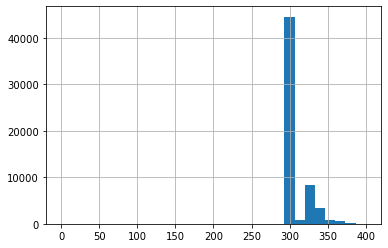

In [35]:
# identify the distribution of elapsed_seconds by device to understand the period distribution
elapsed_series.hist(bins=30, range=[0, 400])


Period elapsed time quantiles are generated below.

In [36]:
# create a dataframe of period elapsed seconds by quantile
quantile_list = [0.005, 0.01, 0.025, 0.05, 0.25, 0.5, 0.75, 0.95, 0.975, 0.99, 0.995]
   
elapsed_quantiles = pd.DataFrame([elapsed_series.quantile(qq) for qq in quantile_list],
                     index=quantile_list,
                     columns=['period elapsed seconds'])   
                                 
elapsed_quantiles.index.rename('quantile', inplace=True)

print("Period elapsed seconds by quantile:")
elapsed_quantiles


Period elapsed seconds by quantile:


period elapsed seconds
quantile                        
0.005                   303.0060
0.010                   304.0000
0.025                   304.0000
0.050                   304.0000
0.250                   304.0000
0.500                   304.0030
0.750                   305.0040
0.950                   340.0360
0.975                   352.0445
0.990                   372.0000
0.995                   444.5650

In [37]:
# we further identify the quantiles that bound the 3.5 and 6.5 minute periods, as we will assume this range 
# is acceptable for the nominal sampling rate of 5 minutes.

from scipy import stats

#inverse of quantile
pctile_4mins = stats.percentileofscore(elapsed_series.values, 3.5*60)
pctile_6mins = stats.percentileofscore(elapsed_series.values, 6.5*60)

print(f"Percent of Period Elapsed Time between 3.5 and 6.5 minutes is {pctile_6mins - pctile_4mins:.2f}%")


Percent of Period Elapsed Time between 3.5 and 6.5 minutes is 99.11%


Over 99% of the elapsed time periods are between 210 and 390 seconds (3.5 and 6.5 minutes). 

The time periods are fairly uniform to the nominal 5 minute sampling rate, but need to be accounted for in feature engineering to identify periods that are not sampled at uniform intervals for models that assume uniform sampling.

We will assume that any period intervals that are less than 3.5 minutes and greater than 6.5 minutes is a 'non-uniform' period.

In [38]:
# create a feature to indicate if the period elapsed time from the previous reading was within the uniform range
for ii in good_ids:
    # specify conditions in variables to improve readability
    cond1 = sap_devicesA[ii]['elapsed_seconds'] < 210
    cond2 = sap_devicesA[ii]['elapsed_seconds'] > 390
    sap_devicesA[ii]['nonuniform_period'] = cond1 | cond2


In [39]:
# review new feature
sap_devicesA[3][sap_devicesA[3]['nonuniform_period']==True]

DEVICE_ID  TempF  Tank    Vac  HourUTC  \
TSTAMP                                                            
2020-02-27 06:47:40.007          3   15.1   4.7   1.07        6   
2020-03-11 03:20:23.030          3   30.8   1.3  26.51        3   
2020-03-15 01:12:53.020          3   27.5  24.2   0.07        1   
2020-03-23 23:14:23.033          3   39.4  25.3  23.72       23   

                         elapsed_seconds  nonuniform_period  
TSTAMP                                                       
2020-02-27 06:47:40.007        22674.110               True  
2020-03-11 03:20:23.030         1580.563               True  
2020-03-15 01:12:53.020        12748.947               True  
2020-03-23 23:14:23.033         5294.370               True

In [40]:
sap_devicesA[3].loc['2020-02-27 00:00':'2020-02-27 06:52']

DEVICE_ID  TempF  Tank   Vac  HourUTC  \
TSTAMP                                                           
2020-02-27 00:04:01.880          3   23.1   5.3  0.67        0   
2020-02-27 00:09:05.883          3   23.1   4.9  0.67        0   
2020-02-27 00:14:33.897          3   23.1   4.7  0.67        0   
2020-02-27 00:19:37.897          3   22.8   5.1  0.68        0   
2020-02-27 00:24:41.897          3   22.8   4.9  0.68        0   
2020-02-27 00:29:45.897          3   22.7   4.9  0.69        0   
2020-02-27 06:47:40.007          3   15.1   4.7  1.07        6   
2020-02-27 06:52:44.007          3   14.7   4.7  1.07        6   

                         elapsed_seconds  nonuniform_period  
TSTAMP                                                       
2020-02-27 00:04:01.880          304.000              False  
2020-02-27 00:09:05.883          304.003              False  
2020-02-27 00:14:33.897          328.014              False  
2020-02-27 00:19:37.897          304.000              False  
2020-02-27 00:24:41.897          304.000              False  
2020-02-27 00:29:45.897          304.000              False  
2020-02-27 06:47:40.007        22674.110               True  
2020-02-27 06:52:44.007          304.000              False

In [41]:
# determine the percentage of non-uniform periods per device

nonuniform_pct = []
for ii in good_ids:
    pct = round(sap_devicesA[ii]['nonuniform_period'].mean()*100,2)
    cnt = len(sap_devicesA[ii].index)
    nonuniform_pct.append([cnt, pct])

nonuniform_pct_df = pd.DataFrame(nonuniform_pct,
                     index=good_ids,
                     columns=['total periods', 'non-uniform period %'])   

nonuniform_pct_df.index.rename('DeviceID', inplace=True)

# print("Dataset non-uniform periods by DeviceID:")
nonuniform_pct_df

total periods  non-uniform period %
DeviceID                                     
1                  6359                  0.11
3                 10837                  0.04
4                  7151                  0.46
5                  8566                  0.25
6                  7082                  0.14
7                  7943                  0.05
9                  4499                  0.82
10                 3513                  1.11
11                 3551                 10.59

The datasets for most devices have low percentages of non-uniform periods.  Device 11 has the highest at over 10%, which may impact using this device data in modeling.

#### Interpolate missing data via linear interpolation

We will use linear interpolation to fill-in NaN values which were created when removing noisy, out-of-range data.  The interpolation will use time-index spacing to account for any non-equally spaced values.

**NOTE:  this is a look-ahead which will provide 'future' information to the time-series data and can impact model results with live data where the 'future' is not known.  However, we will consider this during feature engineering and modeling.  Additionally, per the product developer, data collection for these devices will have improved on-device filtering to prevent out-of-range data in future harvesting seasons.  Therefore, an assumption is made that this look-ahead will be acceptable for modeling purposes.**

In [42]:
# save index list of first 5 NaN values of a device Tank level for later comparison
# are are observing Device 3 in this example:
test_obs = sap_devicesA[3][sap_devicesA[3]['Tank'].isnull()].index[0:5]

# review the missing Tank values
sap_devicesA[3].loc[test_obs]


DEVICE_ID  TempF  Tank   Vac  HourUTC  \
TSTAMP                                                           
2020-02-22 10:32:51.983          3   68.9   NaN  0.73       10   
2020-02-22 10:37:55.983          3   68.9   NaN  0.73       10   
2020-02-22 10:42:59.983          3   68.9   NaN  0.72       10   
2020-02-22 10:48:03.987          3   68.7   NaN  0.73       10   
2020-02-22 10:53:35.007          3   68.7   NaN  0.74       10   

                         elapsed_seconds  nonuniform_period  
TSTAMP                                                       
2020-02-22 10:32:51.983              NaN              False  
2020-02-22 10:37:55.983          304.000              False  
2020-02-22 10:42:59.983          304.000              False  
2020-02-22 10:48:03.987          304.004              False  
2020-02-22 10:53:35.007          331.020              False

In [43]:
# use linear interpolation to fill-in NaN values, using time-index spacing to account for any non-equally spaced values
# NOTE:  this is a look-ahead which could provide too much 'future' information to the time-series.

# create empty dict to hold interpolated data frames
sap_devicesB = {}

# populate new device dataframes with NaNs interpolated for Tank, Vac, and TempF
# (using deep copy to eliminate pointer to referenced df)
for ii in good_ids:
    sap_devicesB[ii] = sap_devicesA[ii].copy()
    sap_devicesB[ii]['Tank'].interpolate(method='time', inplace=True)
    sap_devicesB[ii]['Vac'].interpolate(method='time', inplace=True)
    sap_devicesB[ii]['TempF'].interpolate(method='time', inplace=True)  
    # backfill any remaining NaN values
    sap_devicesB[ii]['Tank'].fillna(method='bfill', inplace=True)
    sap_devicesB[ii]['Vac'].fillna(method='bfill', inplace=True)
    sap_devicesB[ii]['TempF'].fillna(method='bfill', inplace=True)

  

In [44]:
# review the interplated Tank values for comparison
sap_devicesB[3].loc[test_obs]

DEVICE_ID  TempF  Tank   Vac  HourUTC  \
TSTAMP                                                           
2020-02-22 10:32:51.983          3   68.9  92.9  0.73       10   
2020-02-22 10:37:55.983          3   68.9  92.9  0.73       10   
2020-02-22 10:42:59.983          3   68.9  92.9  0.72       10   
2020-02-22 10:48:03.987          3   68.7  92.9  0.73       10   
2020-02-22 10:53:35.007          3   68.7  92.9  0.74       10   

                         elapsed_seconds  nonuniform_period  
TSTAMP                                                       
2020-02-22 10:32:51.983              NaN              False  
2020-02-22 10:37:55.983          304.000              False  
2020-02-22 10:42:59.983          304.000              False  
2020-02-22 10:48:03.987          304.004              False  
2020-02-22 10:53:35.007          331.020              False

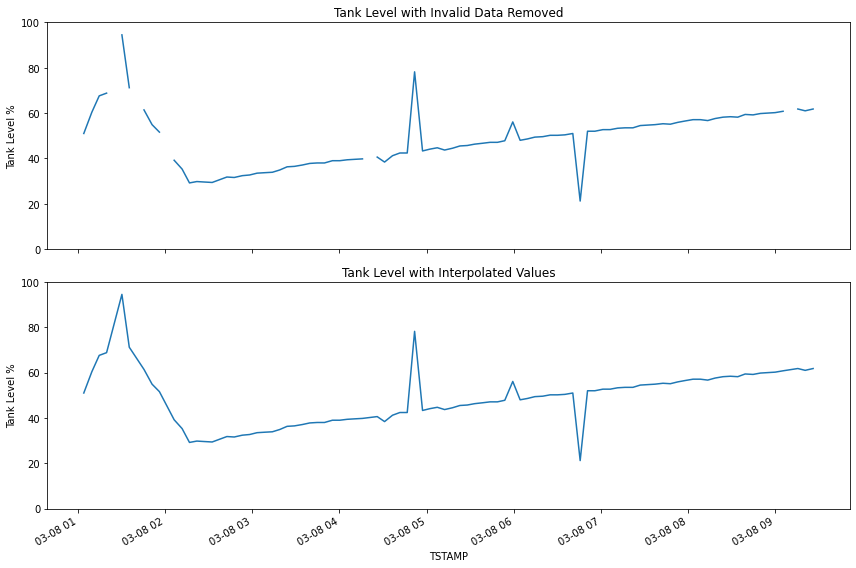

In [45]:
# plot tank rate by Temp by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,8))
# fig.suptitle(f'Sap Flow Rate (%/min) vs. Temperature (degF)', size = 20, y=1.02)

( sap_devicesA[3].loc['2020-03-08 01:00':'2020-03-08 09:30']['Tank']
     .plot(ax=axs[0], title = "Tank Level with Invalid Data Removed", ylim=(0,100)) ) 

( sap_devicesB[3].loc['2020-03-08 01:00':'2020-03-08 09:30']['Tank']
     .plot(ax=axs[1], title = "Tank Level with Interpolated Values", ylim=(0,100)) )

axs[0].set_xticklabels([])
axs[0].set_xlabel('')
axs[0].set_ylabel('Tank Level %')
axs[1].set_ylabel('Tank Level %')

plt.tight_layout()


Linear interpolation appears to be reasonable.  The data is still noisy, but the interpolated values appear to have good fit.  Other interpolated values for Vac and TempF provide similar results (not shown).

#### Apply Tank Level noise filtering to remove transient noise

Tank Level is a key value that will define sap flow rate based on period-by-period changes.  Sap flow rate will be the key predicted value of this analysis.  Therefore, the Tank Level data must be processed to remove noise that can cause excessive variability of this predicted variable.

Before applying noise filtering, we will review period-to-period tank level changes across all devices to check the relative distribution.

In [46]:
# create empty series to compare period-to-period Tank Level changes across all devices
tank_diffs = pd.Series(dtype='float64')

# populate the series of Tank Level changes across all devices
for ii in good_ids:
    tank_diffs = tank_diffs.append(sap_devicesB[ii]['Tank'].diff(1), ignore_index=True)
    
tank_diffs.describe()
    
    

count    59492.000000
mean        -0.000750
std          5.543266
min        -85.500000
25%         -0.200000
50%          0.000000
75%          0.400000
max         95.000000
dtype: float64

<AxesSubplot:>

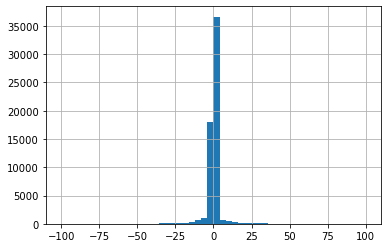

In [47]:
# histogram of distribution of period-to-period Tank Level changes
tank_diffs.hist(bins=50, range=[-100, 100])

The Tank Level period-to-period changes across devices are symmetrical with most values being near-zero.  Major outliers exist, so filtering based large deviations will be applied to create a simple low-pass filter.

First, we will apply a simple period filter that will filter out any large period-to-period deviations relative to the previous 2 periods.  The rules are:

- Define an arbitrary period-change limit that a value above this be considered 'noise'
- Look back 1 and 2 periods from the current value
- Assume that each period is within 6.5 minutes (over 99% of the recorded time periods of this dataset)
- If the absolute change in Tank level is above the limit for both periods then flag the value as a noise spike to remove

This creates a simple low-pass filter.

1a) Demonstrate the filter and review data:

In [48]:
# Simple period filter

chg_filt = 10 # limit of absolute change of Tank level within periods
Ptime = 390 # limit of a period time interval in seconds (6.5 minutes)

# specify conditions in variables for readability
P1DiffCond = sap_devicesB[3]['Tank'].diff(1).abs() > chg_filt
P2DiffCond = sap_devicesB[3]['Tank'].diff(2).abs() > chg_filt
P1DiffTime = sap_devicesB[3]['elapsed_seconds'] <= Ptime
P2DiffTime = sap_devicesB[3]['elapsed_seconds'].rolling(min_periods=1, window=2).sum() <= Ptime*2

sap_devicesB[3]['TankNoise'] = P1DiffCond & P2DiffCond & P1DiffTime & P2DiffTime

# review a noisy time-period for Device 3
# sap_devicesB[3][['Tank','TankNoise']].loc['2020-03-08 4:15':'2020-03-08 07:15']

In [49]:
# review the pct of noisy observations for Device3
print(f'{round(sap_devicesB[3]["TankNoise"].mean()*100,2)}% of values were identified as noisy for Device 3')


1.39% of values were identified as noisy for Device 3


Second, we will try a simple Median Absolute Deviation Filter based on a window of periods along each device dataset.  Median analysis is appropriate for the distribution of tank level changes, as the vast majority of observations are near-zero and would otherwise be highly influenced by large-magnitude values. A window of periods is appropriate to help create a 'short memory' adaptive mechanism to detect fundamental shifts in the period-to-period tank levels as harvest conditions change. In contrast, outlier detection based on means and standard deviations would be highly influenced by values much greater or less than zero.

https://core.ac.uk/download/pdf/206095228.pdf

1b) Demonstrate the filter and review data:

In [50]:
Deviations = 2.5 # limit of Tank Level median deviations
Ptime = 390 # upper limit of a uniform period time interval in seconds (6.5 minutes)

# series of absolute differenced Tank Levels to take rolling medians
TankDiffs = sap_devicesB[3]['Tank'].diff(1).abs()
# get overall median across the entire device to replace NaN's
TankDiffMdn = TankDiffs.median()

# specify conditions in variables for readability
WindowMedian = TankDiffs.rolling(min_periods = 10, window=30).median()

P1DiffCond = sap_devicesB[3]['Tank'].diff(1).abs() > Deviations * WindowMedian.fillna(TankDiffs.median())
P2DiffCond = sap_devicesB[3]['Tank'].diff(2).abs() > Deviations * WindowMedian.fillna(TankDiffs.median())
P1DiffTime = sap_devicesB[3]['elapsed_seconds'] <= Ptime
P2DiffTime = sap_devicesB[3]['elapsed_seconds'].rolling(min_periods=1, window=2).sum() <= Ptime*2


sap_devicesB[3]['TankNoise2'] = P1DiffCond & P2DiffCond & P1DiffTime & P2DiffTime

In [51]:
# review a noisy time-period for Device 3 using both methods
sap_devicesB[3][['Tank', 'TankNoise', 'TankNoise2']].loc['2020-03-08 4:15':'2020-03-08 07:15']

Tank  TankNoise  TankNoise2
TSTAMP                                                   
2020-03-08 04:15:49.983  39.800000      False       False
2020-03-08 04:20:53.983  40.199997      False       False
2020-03-08 04:25:57.987  40.600000      False       False
2020-03-08 04:31:01.987  38.400000      False        True
2020-03-08 04:36:30.010  41.200000      False       False
2020-03-08 04:41:34.010  42.400000      False       False
2020-03-08 04:46:38.010  42.400000      False       False
2020-03-08 04:51:42.013  78.200000       True        True
2020-03-08 04:57:10.040  43.300000      False       False
2020-03-08 05:02:14.043  44.100000      False       False
2020-03-08 05:07:18.043  44.700000      False       False
2020-03-08 05:12:22.043  43.700000      False       False
2020-03-08 05:17:49.070  44.500000      False       False
2020-03-08 05:22:53.070  45.500000      False       False
2020-03-08 05:27:57.070  45.700000      False       False
2020-03-08 05:33:01.073  46.300000      False       False
2020-03-08 05:38:35.107  46.700000      False       False
2020-03-08 05:43:39.107  47.100000      False       False
2020-03-08 05:48:43.110  47.100000      False       False
2020-03-08 05:53:47.110  47.800000      False       False
2020-03-08 05:59:16.143  56.100000      False        True
2020-03-08 06:04:20.147  48.000000      False       False
2020-03-08 06:09:24.147  48.600000      False       False
2020-03-08 06:14:28.147  49.400000      False       False
2020-03-08 06:19:56.177  49.600000      False       False
2020-03-08 06:25:00.177  50.200000      False       False
2020-03-08 06:30:04.177  50.200000      False       False
2020-03-08 06:35:08.180  50.400000      False       False
2020-03-08 06:40:35.217  51.000000      False       False
2020-03-08 06:45:39.217  21.200000       True        True
2020-03-08 06:50:43.217  52.000000      False       False
2020-03-08 06:55:47.217  52.000000      False       False
2020-03-08 07:01:16.250  52.700000      False       False
2020-03-08 07:06:20.250  52.700000      False       False
2020-03-08 07:11:24.253  53.300000      False       False

In [52]:
# review the pct of noisy observations for Device3
print(f'Simple Period-to-Period Filter: {round(sap_devicesB[3]["TankNoise"].mean()*100,2)}% of values were identified as noisy for Device 3')
print(f'MAD Filter: {round(sap_devicesB[3]["TankNoise2"].mean()*100,2)}% of values were identified as noisy for Device 3')   

del sap_devicesB[3]['TankNoise']
del sap_devicesB[3]['TankNoise2']         

Simple Period-to-Period Filter: 1.39% of values were identified as noisy for Device 3
MAD Filter: 11.09% of values were identified as noisy for Device 3


The MAD filter appears to be the most robust to cleanse the datasets.  Again, replacing this noisy data with an interpolated look-ahead is a known risk for modeling purposes.  However, this is an acceptable risk as future data collection from the devices will have improved on-device data filtering to prevent much of this noise.  Therefore, the assumption is that these de-noised datasets will be more similar to future real-time data.

2) Apply MAD filter across all device datasets and replace noise with NaN

In [53]:
Deviations = 2.5 # limit of Tank Level median deviations
Ptime = 390 # upper limit of a uniform period time interval in seconds (6.5 minutes)

# create empty dict to hold interpolated data frames
sap_devicesC = {}

# (using deep copy to eliminate pointer to referenced df)
for ii in good_ids:
    sap_devicesC[ii] = sap_devicesB[ii].copy()
    # series of absolute differenced Tank Levels to take rolling medians
    TankDiffs = sap_devicesC[ii]['Tank'].diff(1).abs()
    # get overall median across the entire device to replace NaN's
    TankDiffMdn = TankDiffs.median()    
    # specify conditions in variables for readability
    WindowMedian = TankDiffs.rolling(min_periods = 10, window=30).median()
    P1DiffCond = sap_devicesC[ii]['Tank'].diff(1).abs() > Deviations * WindowMedian.fillna(TankDiffMdn)
    P2DiffCond = sap_devicesC[ii]['Tank'].diff(2).abs() > Deviations * WindowMedian.fillna(TankDiffMdn)
    P1DiffTime = sap_devicesC[ii]['elapsed_seconds'] < Ptime
    P2DiffTime = sap_devicesC[ii]['elapsed_seconds'].rolling(min_periods=1, window=2).sum() < Ptime*2
    tank_noise = P1DiffCond & P2DiffCond & P1DiffTime & P2DiffTime
    print(f'Device {ii} has {round(tank_noise.mean()*100,2)}% of Tank Level values identified as noisy.')
    # set noise to NaN
    sap_devicesC[ii].loc[(P1DiffCond & P2DiffCond & P1DiffTime & P2DiffTime), 'Tank'] = np.nan
    


Device 1 has 12.67% of Tank Level values identified as noisy.
Device 3 has 11.09% of Tank Level values identified as noisy.
Device 4 has 11.84% of Tank Level values identified as noisy.
Device 5 has 13.37% of Tank Level values identified as noisy.
Device 6 has 12.24% of Tank Level values identified as noisy.
Device 7 has 17.03% of Tank Level values identified as noisy.
Device 9 has 11.14% of Tank Level values identified as noisy.
Device 10 has 12.67% of Tank Level values identified as noisy.
Device 11 has 11.1% of Tank Level values identified as noisy.


3) Interpolate missing values with linear interpolation.  The same logic applies as above to why we believe it is acceptable to use this lookahead for this data-cleansing step.

In [54]:
# use linear interpolation to fill-in NaN values, using time-index spacing to account for any non-equally spaced values
# NOTE:  this is a look-ahead which could provide too much 'future' information to the time-series.

# Interpolate the removed noisy values for Tank level
for ii in good_ids:
    sap_devicesC[ii]['Tank'].interpolate(method='time', inplace=True)


<AxesSubplot:title={'center':'Tank Level pre and post-noise filtered'}, xlabel='TSTAMP', ylabel='Tank Level %'>

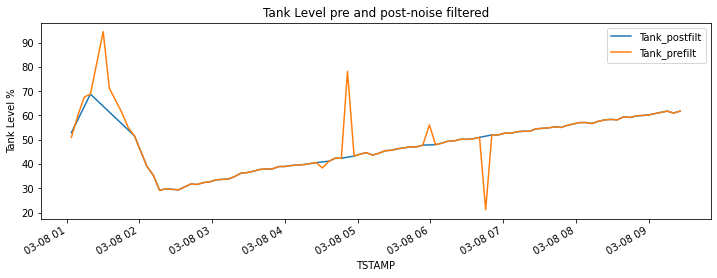

In [55]:
# plot the data with interpolated missing values
( sap_devicesC[3][['Tank']].join(sap_devicesB[3][['Tank']], lsuffix='_postfilt', rsuffix='_prefilt')
    .loc['2020-03-08 01:00':'2020-03-08 09:30']
    .plot(title = "Tank Level pre and post-noise filtered", ylabel='Tank Level %', figsize = (12,4)) 
)



#### Apply Tank Level moving-average smoothing

Simple trailing moving average smoothing is chosen as a low-pass filter to further reduce noise.  The moving window periods are chosen to be 3 and 6 to correspond to about 15 minutes and 30 minutes, respectively.

In [56]:
# apply simple trailing moving average smoothing to the Tank Level as another low-pass filter to reduce noise.
# NOTE:  the simple moving average will introduce 'lag' corresponding to the windowed-periods
#       this lag may impact the short-term response of predictions.

# create empty dict to hold data frames
sap_devicesD = {}

# populate new device dataframes with smoothed values for Tank Level
# (using deep copy to eliminate pointer to referenced df)
for ii in good_ids:
    sap_devicesD[ii] = sap_devicesC[ii].copy()
    # compute the 3-period rolling mean for tank level (about 15 minutes)
    sap_devicesD[ii]['Tank3PMovAvg'] = sap_devicesD[ii]['Tank'].rolling(window=3, min_periods=1).mean()
    # compute the 6-period rolling mean for tank level (about 30 minutes)
    sap_devicesD[ii]['Tank6PMovAvg'] = sap_devicesD[ii]['Tank'].rolling(window=6, min_periods=1).mean()



<AxesSubplot:title={'center':'Tank Level Comparison with Moving Average Smoothing'}, xlabel='TSTAMP', ylabel='Tank Level %'>

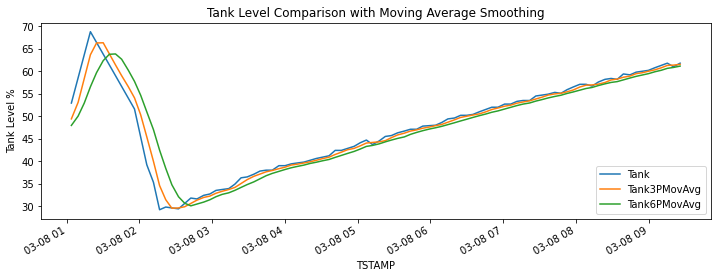

In [57]:
# plot example the Tank Level data with raw and smoothed values
# device3 data shown:

TankLevelCols = ['Tank', 'Tank3PMovAvg', 'Tank6PMovAvg']

( sap_devicesD[3].loc['2020-03-08 01:00':'2020-03-08 09:30'][TankLevelCols]
     .plot(title = "Tank Level Comparison with Moving Average Smoothing", 
           ylabel='Tank Level %', figsize = (12,4)) )

As expected, the smoothed Tank Level values better filter the noisy spikes at the expense of lagged response.

#### Calculate sap flow rate based on Tank Level change

Sap Flow Rate will be calculated by the trailing rate of tank level change (% per minute).  Sap Flow Rate will be the predicted variable of this process.  Calculating the rate of change is also a differencing function to transform the predicted feature to be stationary.

In [58]:
# calculate sap flow rates (level% / min)

TankRateCols = ['TankRate', 'Tank3PMARate', 'Tank6PMARate']
TankLevelCols = ['Tank', 'Tank3PMovAvg', 'Tank6PMovAvg']


# populate dataframes with calculated sap flow rates
for ii in good_ids:
    for rr in range(len(TankRateCols)):
        # create sap flow rate features based on 1-period differences
        sap_devicesD[ii][TankRateCols[rr]] = sap_devicesD[ii][TankLevelCols[rr]].diff(1) \
         / (sap_devicesD[ii]['elapsed_seconds'] / 60)
    
       
# review example data
print(sap_devicesD[3].loc['2020-03-08 02:00':'2020-03-08 04:00'][TankLevelCols].head(20))
print(sap_devicesD[3].loc['2020-03-08 02:00':'2020-03-08 04:00'][TankRateCols].head(20))



                              Tank  Tank3PMovAvg  Tank6PMovAvg
TSTAMP                                                        
2020-03-08 02:01:08.787  45.399959     50.332073     54.674826
2020-03-08 02:06:12.787  39.200000     45.399986     50.972520
2020-03-08 02:11:41.810  35.300000     39.966653     47.019590
2020-03-08 02:16:45.813  29.200000     34.566667     42.449370
2020-03-08 02:21:49.813  29.800000     31.433333     38.416660
2020-03-08 02:26:53.813  29.600000     29.533333     34.749993
2020-03-08 02:32:22.840  29.400000     29.600000     32.083333
2020-03-08 02:37:26.840  30.600000     29.866667     30.650000
2020-03-08 02:42:30.840  31.800000     30.600000     30.066667
2020-03-08 02:47:34.843  31.600000     31.333333     30.466667
2020-03-08 02:53:07.867  32.400000     31.933333     30.900000
2020-03-08 02:58:11.867  32.700000     32.233333     31.416667
2020-03-08 03:03:15.870  33.500000     32.866667     32.100000
2020-03-08 03:08:19.870  33.700000     33.300000     32

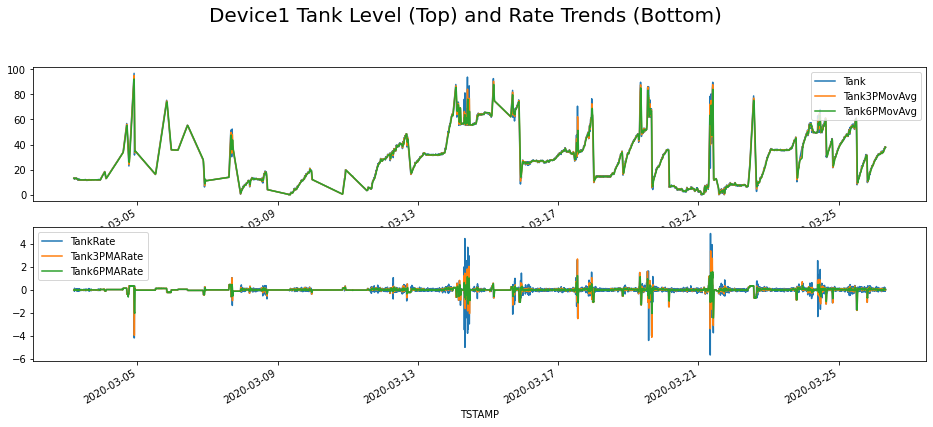

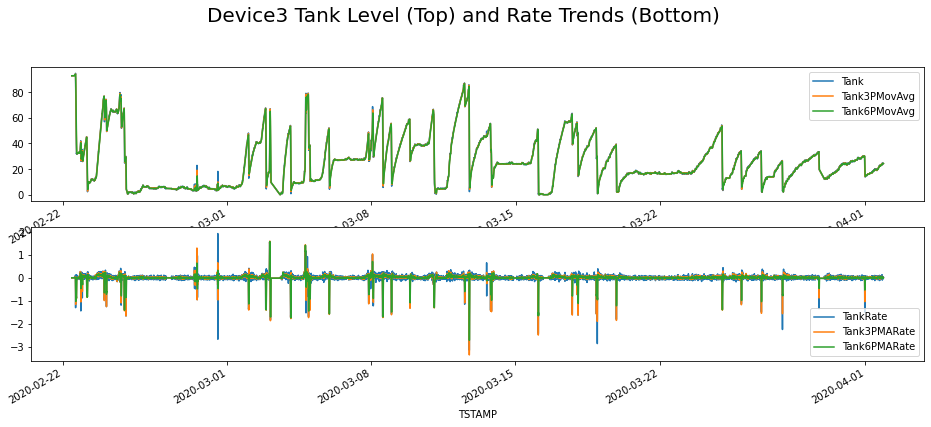

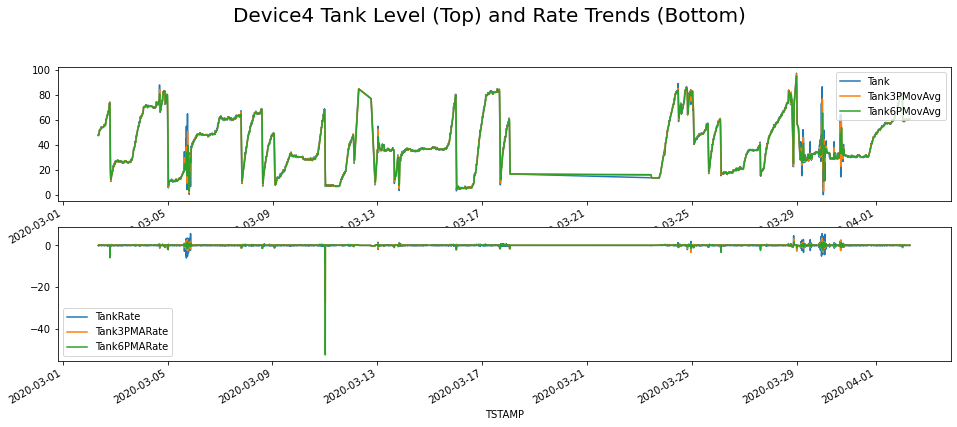

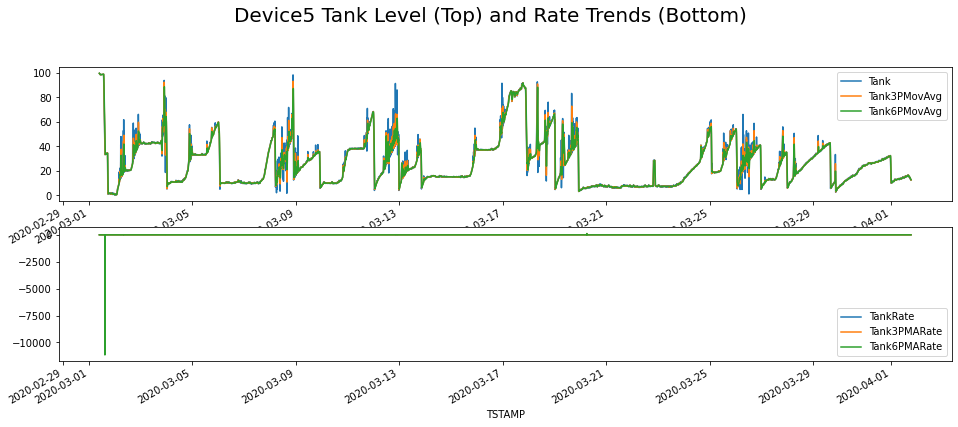

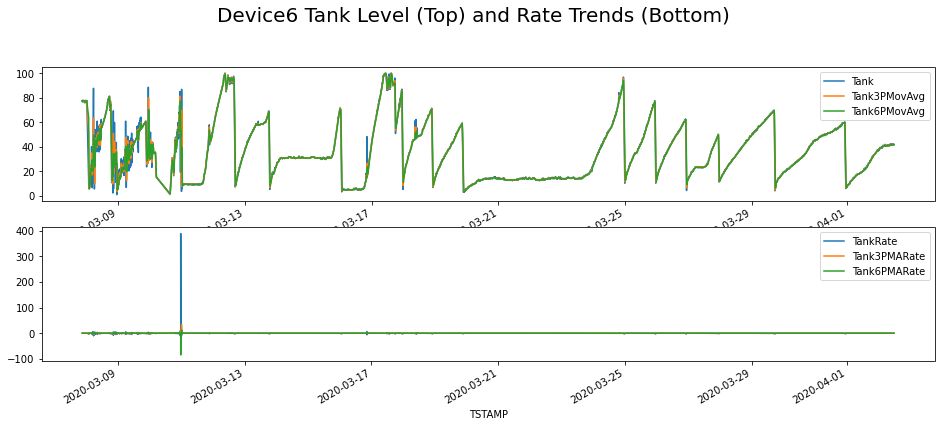

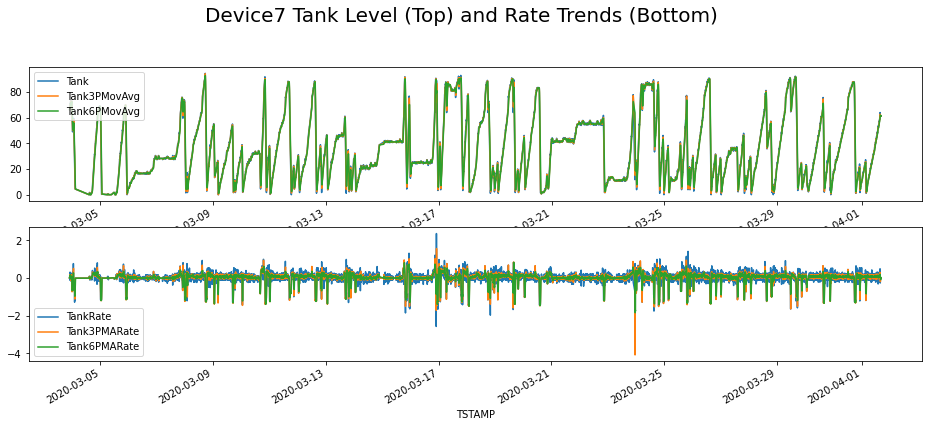

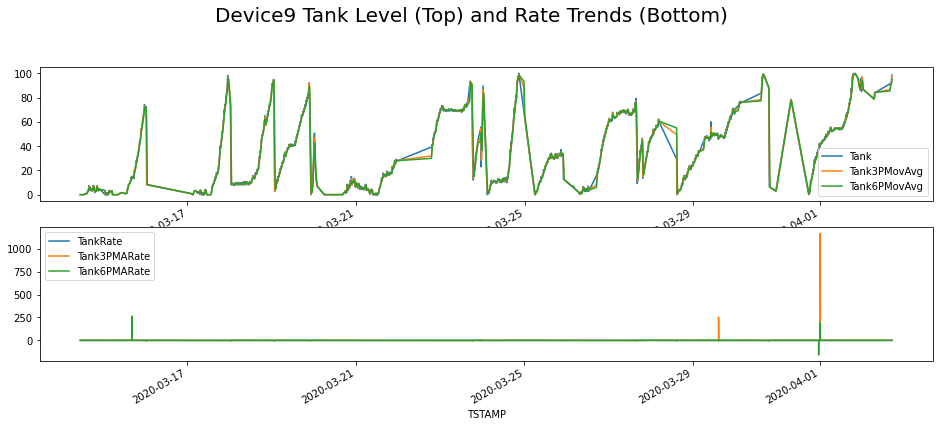

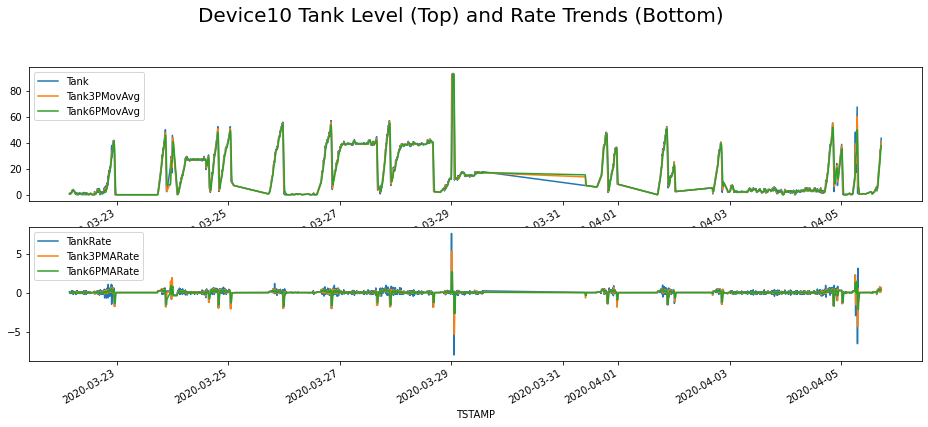

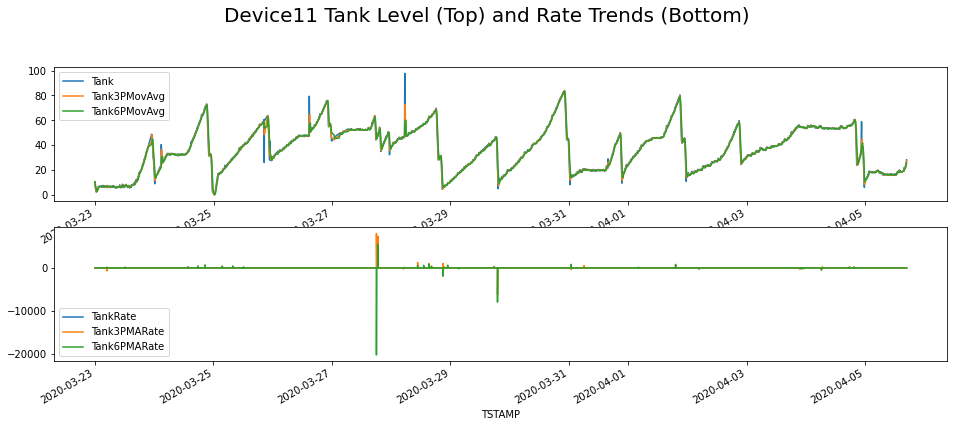

In [59]:
# plot the level and rate data for comparison

%matplotlib inline

import matplotlib.pyplot as plt

# generate trends of Tank Levels by device
for ii in good_ids:
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
    fig.suptitle(f'Device{ii} Tank Level (Top) and Rate Trends (Bottom)', size = 20, y=1.02)
    ( sap_devicesD[ii][TankLevelCols]
     .plot(ax=ax1) )
    ( sap_devicesD[ii][TankRateCols]
     .plot(ax=ax2) )
    


<AxesSubplot:title={'center':'Pre-filtered Tank Level Trend'}, xlabel='TSTAMP'>

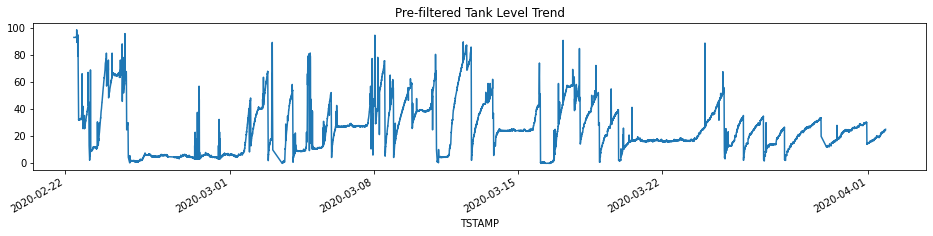

In [60]:
# plot the level and rate data for comparison

( sap_devicesB[3]['Tank']
     .plot(title = "Pre-filtered Tank Level Trend", figsize = (16,3)) )


The Tank Level Rates are clearly more stationary than the Levels due to the differencing.  This is also shown in the tighter distributions of the Rates vs. the Tank Levels.

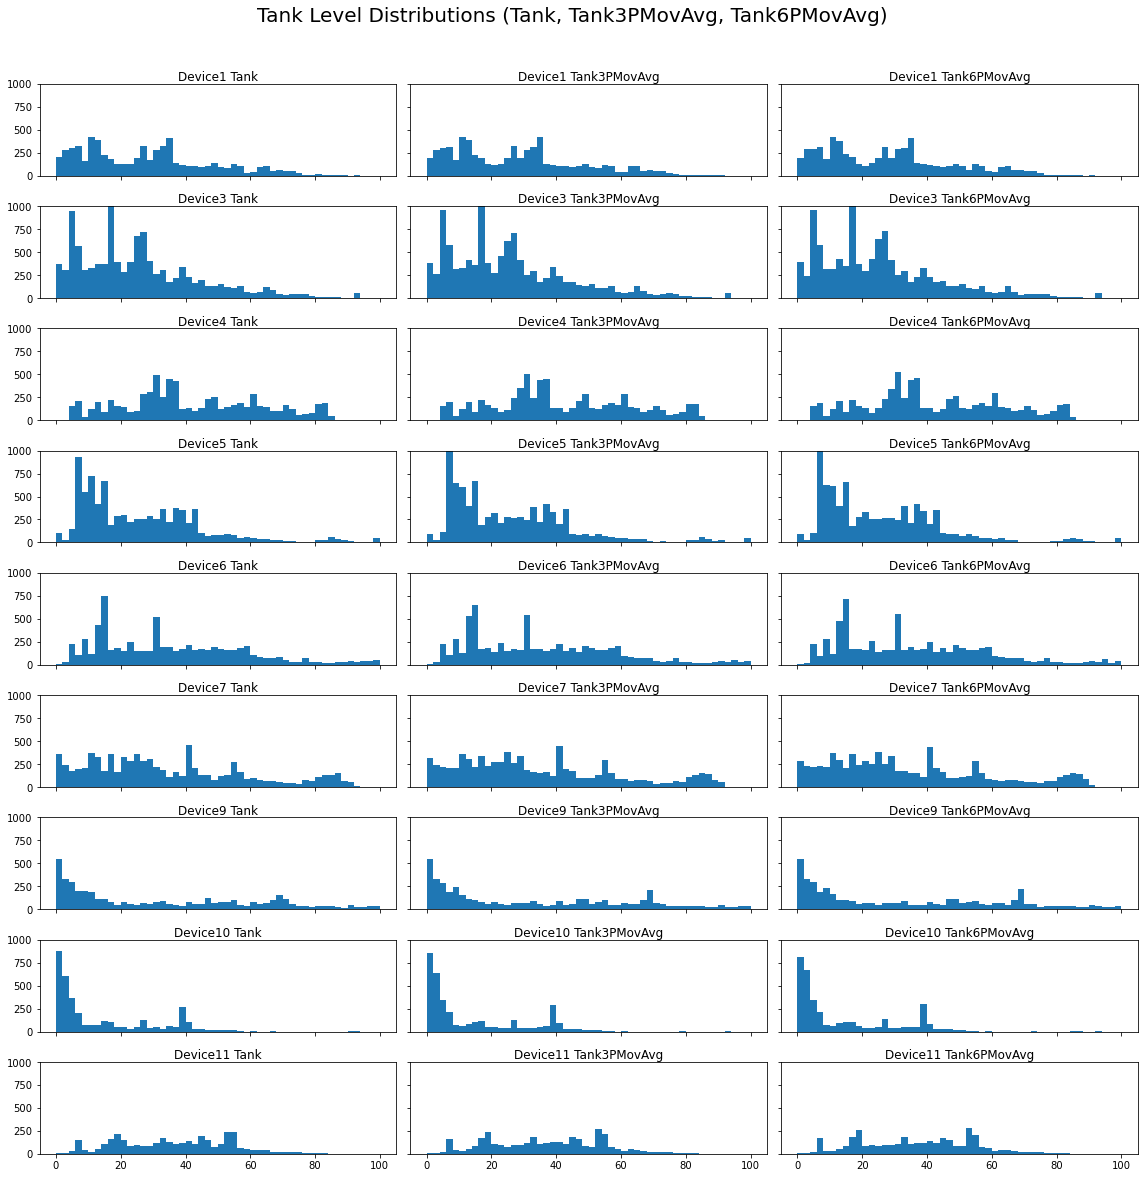

In [61]:
# plot tank Level distributions by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Tank Level Distributions (Tank, Tank3PMovAvg, Tank6PMovAvg)', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create histogram for each device
    sap_devicesD[ii]['Tank'].plot.hist(ax=axs[c][0], bins=50, range=[0, 100], ylim=(0,1000))
    sap_devicesD[ii]['Tank3PMovAvg'].plot.hist(ax=axs[c][1], bins=50, range=[0, 100], ylim=(0,1000))  
    sap_devicesD[ii]['Tank6PMovAvg'].plot.hist(ax=axs[c][2], bins=50, range=[0, 100], ylim=(0,1000))  
    # title each subplot
    axs[c][0].set_title(f'Device{ii} Tank', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMovAvg', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMovAvg', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
    # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1

plt.tight_layout()

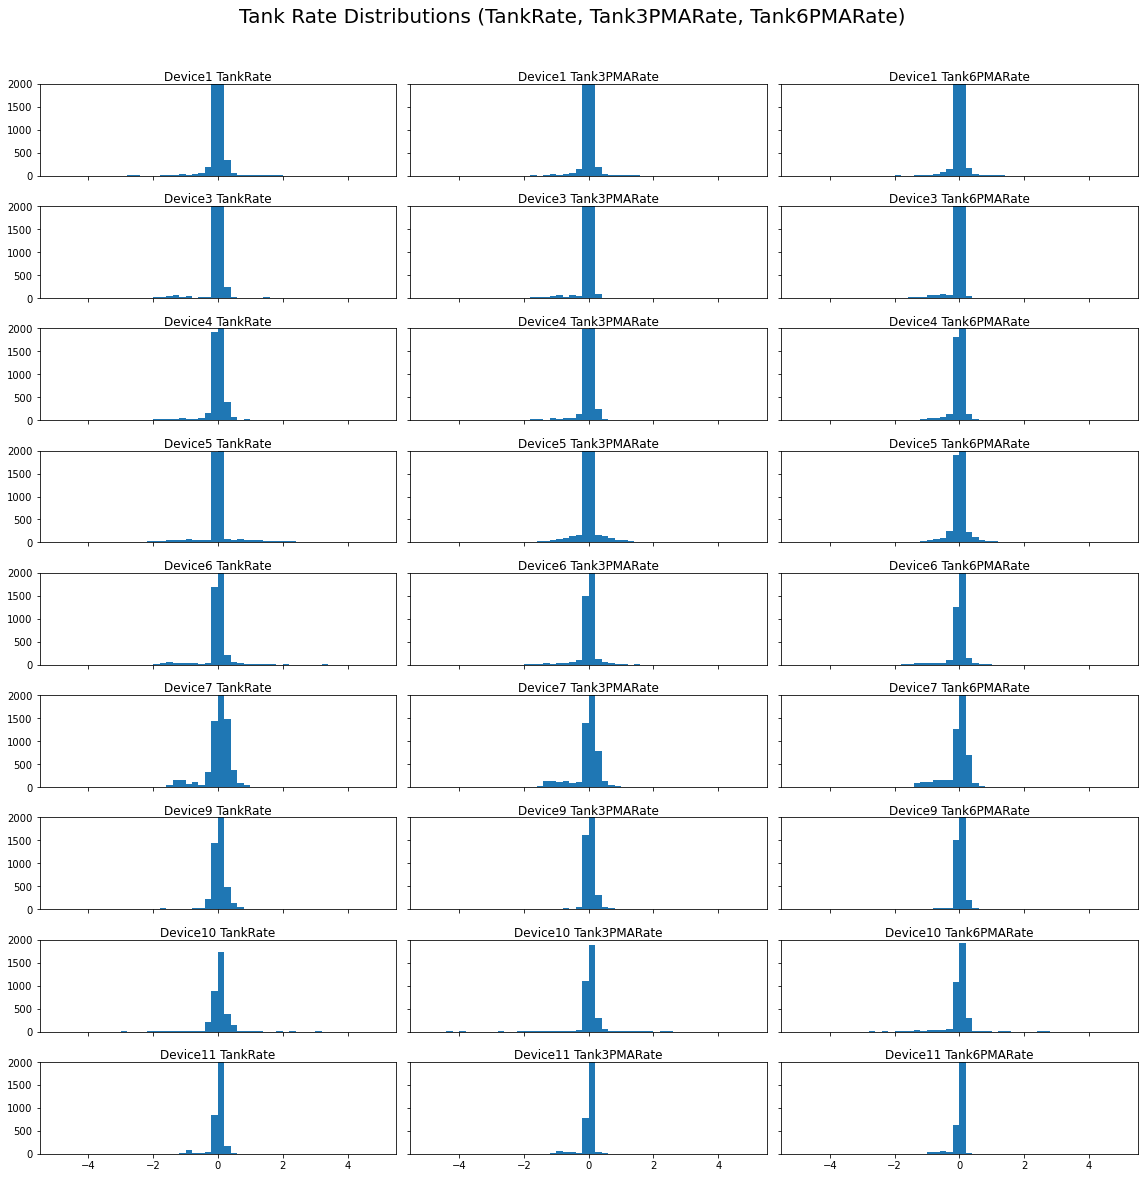

In [62]:
# plot tank rate distributions by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Tank Rate Distributions (TankRate, Tank3PMARate, Tank6PMARate)', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create histogram for each device
    sap_devicesD[ii]['TankRate'].plot.hist(ax=axs[c][0], bins=50, range=[-5, 5], ylim=(0,2000))
    sap_devicesD[ii]['Tank3PMARate'].plot.hist(ax=axs[c][1], bins=50, range=[-5, 5], ylim=(0,2000))  
    sap_devicesD[ii]['Tank6PMARate'].plot.hist(ax=axs[c][2], bins=50, range=[-5, 5], ylim=(0,2000))  
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
    # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1

plt.tight_layout()



#### Transform Tank Level Rates to remove negative rates

Negative rates are generated due to the following conditions:

- Decreasing tank levels due to emptying tanks.
- Noise causing decreasing tank levels causes by tank level sensor placement, tank vibration, or tank foam.

A zero-value tank rate is possible, but a negative tank rate is not considered in this analysis.  The assumption is that sap flow during the conditions creating temporary negative rates is unchanged.  Therefore, we will handle negative rates by forward-filling the values with the previous zero-and-above rate.  The lowest sap flow rate is assumed to be zero, which will naturally be detected under normal data collection.


In [63]:
# create features to indicate if the rate was negative and replaced
NegTankRateCols = ['NegRateInd', 'NegRate3PMAInd', 'NegRate6PMAInd']

# create empty dict to hold data frames
sap_devicesE = {}

# replace negative Tank Level Rate values with NaN
# (using deep copy to eliminate pointer to referenced df)
for ii in good_ids:
    sap_devicesE[ii] = sap_devicesD[ii].copy()
    for rr in range(len(TankRateCols)):
        # populate negative rate indicator column
        sap_devicesE[ii][NegTankRateCols[rr]] = sap_devicesE[ii][TankRateCols[rr]] < 0
        #print(f'Device{ii} {TankRateCols[rr]}: {round(sap_devicesE[ii][NegTankRateCols[rr]].mean()*100,2)}% of values were negative and transformed with forward-fill')
        # set negative rate to NaN
        sap_devicesE[ii][TankRateCols[rr]][sap_devicesE[ii][TankRateCols[rr]] < 0] = np.nan
        # forward-fill NaNs with the previous good value
        sap_devicesE[ii][TankRateCols[rr]] = sap_devicesE[ii][TankRateCols[rr]].fillna(method='ffill')
        # fill remaining NaNs with 0 (such as the first values of the series)
        sap_devicesE[ii][TankRateCols[rr]] = sap_devicesE[ii][TankRateCols[rr]].fillna(value = 0)


C:\Users\thomp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\thomp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\thomp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\thomp\A

In [64]:
sap_devicesE[3].sample(5)

DEVICE_ID  TempF       Tank    Vac  HourUTC  \
TSTAMP                                                                 
2020-03-23 21:15:20.623          3   39.4  22.200000  23.76       21   
2020-03-09 18:44:00.543          3   47.5  55.300000   6.89       18   
2020-03-01 21:38:32.103          3   47.5  32.700000  26.81       21   
2020-03-05 05:20:24.877          3   26.1  10.600000  26.75        5   
2020-03-24 20:44:19.487          3   41.4  48.171609  25.11       20   

                         elapsed_seconds  nonuniform_period  Tank3PMovAvg  \
TSTAMP                                                                      
2020-03-23 21:15:20.623          304.003              False     22.433333   
2020-03-09 18:44:00.543          304.000              False     55.300000   
2020-03-01 21:38:32.103          304.000              False     33.033333   
2020-03-05 05:20:24.877          304.004              False     10.600000   
2020-03-24 20:44:19.487          304.004              False     48.057203   

                         Tank6PMovAvg  TankRate  Tank3PMARate  Tank6PMARate  \
TSTAMP                                                                        
2020-03-23 21:15:20.623     22.350000  0.054872      0.000000      0.013158   
2020-03-09 18:44:00.543     55.333333  0.000000      0.000000      0.000000   
2020-03-01 21:38:32.103     32.150000  0.118421      0.072368      0.075658   
2020-03-05 05:20:24.877     10.600000  0.000000      0.013158      0.006579   
2020-03-24 20:44:19.487     48.095268  0.033870      0.000000      0.009188   

                         NegRateInd  NegRate3PMAInd  NegRate6PMAInd  
TSTAMP                                                               
2020-03-23 21:15:20.623        True           False           False  
2020-03-09 18:44:00.543       False           False           False  
2020-03-01 21:38:32.103        True           False           False  
2020-03-05 05:20:24.877       False            True           False  
2020-03-24 20:44:19.487       False            True           False

In [65]:
sap_devicesE[3][['TankRate', 'Tank3PMARate', 'Tank6PMARate']].describe().T

count      mean       std  min       25%       50%       75%  \
TankRate      10837.0  0.054935  0.097785  0.0  0.000000  0.039473  0.078947   
Tank3PMARate  10837.0  0.035001  0.067740  0.0  0.000000  0.013158  0.046053   
Tank6PMARate  10837.0  0.036493  0.083084  0.0  0.000753  0.013158  0.039474   

                   max  
TankRate      1.934211  
Tank3PMARate  1.605170  
Tank6PMARate  1.584555

Apply MAD filtering to Tank Rate values.

In [66]:
Deviations = 3 # limit of Tank Rate median deviations
Ptime = 390 # upper limit of a uniform period time interval in seconds (6.5 minutes)

# create empty dict to hold interpolated data frames
# sap_devicesC = {}

TankRateCols = ['TankRate', 'Tank3PMARate', 'Tank6PMARate']

# (using deep copy to eliminate pointer to referenced df)
for ii in good_ids:
#     sap_devicesC[ii] = sap_devicesB[ii].copy()
    for cc in range(len(TankRateCols)):
        # series of absolute differenced Tank Levels to take rolling medians
        Diffs = sap_devicesE[ii][TankRateCols[cc]].diff(1).abs()
        # get overall median across the entire device to replace NaN's
        DiffMdn = Diffs.median()    
        # specify conditions in variables for readability
        WindowMedian = Diffs.rolling(min_periods = 10, window=30).median()
        P1DiffCond = sap_devicesE[ii][TankRateCols[cc]].diff(1).abs() > Deviations * WindowMedian.fillna(DiffMdn)
        P2DiffCond = sap_devicesE[ii][TankRateCols[cc]].diff(2).abs() > Deviations * WindowMedian.fillna(DiffMdn)
        P1DiffTime = sap_devicesE[ii]['elapsed_seconds'] < Ptime
        P2DiffTime = sap_devicesE[ii]['elapsed_seconds'].rolling(min_periods=1, window=2).sum() < Ptime*2
        noise = P1DiffCond & P2DiffCond & P1DiffTime & P2DiffTime
        print(f'Device {ii} has {round(noise.mean()*100,2)}% of {TankRateCols[cc]} values identified as noisy.')
        # set noise to NaN
        sap_devicesE[ii].loc[(P1DiffCond & P2DiffCond & P1DiffTime & P2DiffTime), TankRateCols[cc]] = np.nan
        sap_devicesE[ii][TankRateCols[cc]].interpolate(method='time', inplace=True)
    


Device 1 has 26.06% of TankRate values identified as noisy.
Device 1 has 21.53% of Tank3PMARate values identified as noisy.
Device 1 has 19.58% of Tank6PMARate values identified as noisy.
Device 3 has 29.13% of TankRate values identified as noisy.
Device 3 has 23.19% of Tank3PMARate values identified as noisy.
Device 3 has 20.22% of Tank6PMARate values identified as noisy.
Device 4 has 30.36% of TankRate values identified as noisy.
Device 4 has 24.08% of Tank3PMARate values identified as noisy.
Device 4 has 20.63% of Tank6PMARate values identified as noisy.
Device 5 has 33.26% of TankRate values identified as noisy.
Device 5 has 27.9% of Tank3PMARate values identified as noisy.
Device 5 has 23.49% of Tank6PMARate values identified as noisy.
Device 6 has 26.66% of TankRate values identified as noisy.
Device 6 has 18.89% of Tank3PMARate values identified as noisy.
Device 6 has 16.53% of Tank6PMARate values identified as noisy.
Device 7 has 27.79% of TankRate values identified as noisy.
D

In [67]:
sap_devicesE[3][['TankRate', 'Tank3PMARate', 'Tank6PMARate']].describe().T

count      mean       std  min      25%       50%       75%  \
TankRate      10837.0  0.053180  0.093089  0.0  0.00000  0.039412  0.072941   
Tank3PMARate  10837.0  0.032237  0.060232  0.0  0.00000  0.013158  0.045589   
Tank6PMARate  10837.0  0.035212  0.079957  0.0  0.00193  0.012194  0.039473   

                   max  
TankRate      1.934211  
Tank3PMARate  1.605152  
Tank6PMARate  1.348103

Because we removed negative rates, this transformation will skew the rate distributions by truncating all values less than zero.  As some modeling techniques rely on normal-distribution assumptions, we will verify if one-period differenced rate values are in a more normal form.

As shown below, most of the differenced value are not in a true normal form, but are better distributed to meet the assumptions of some statistical modeling techniques.

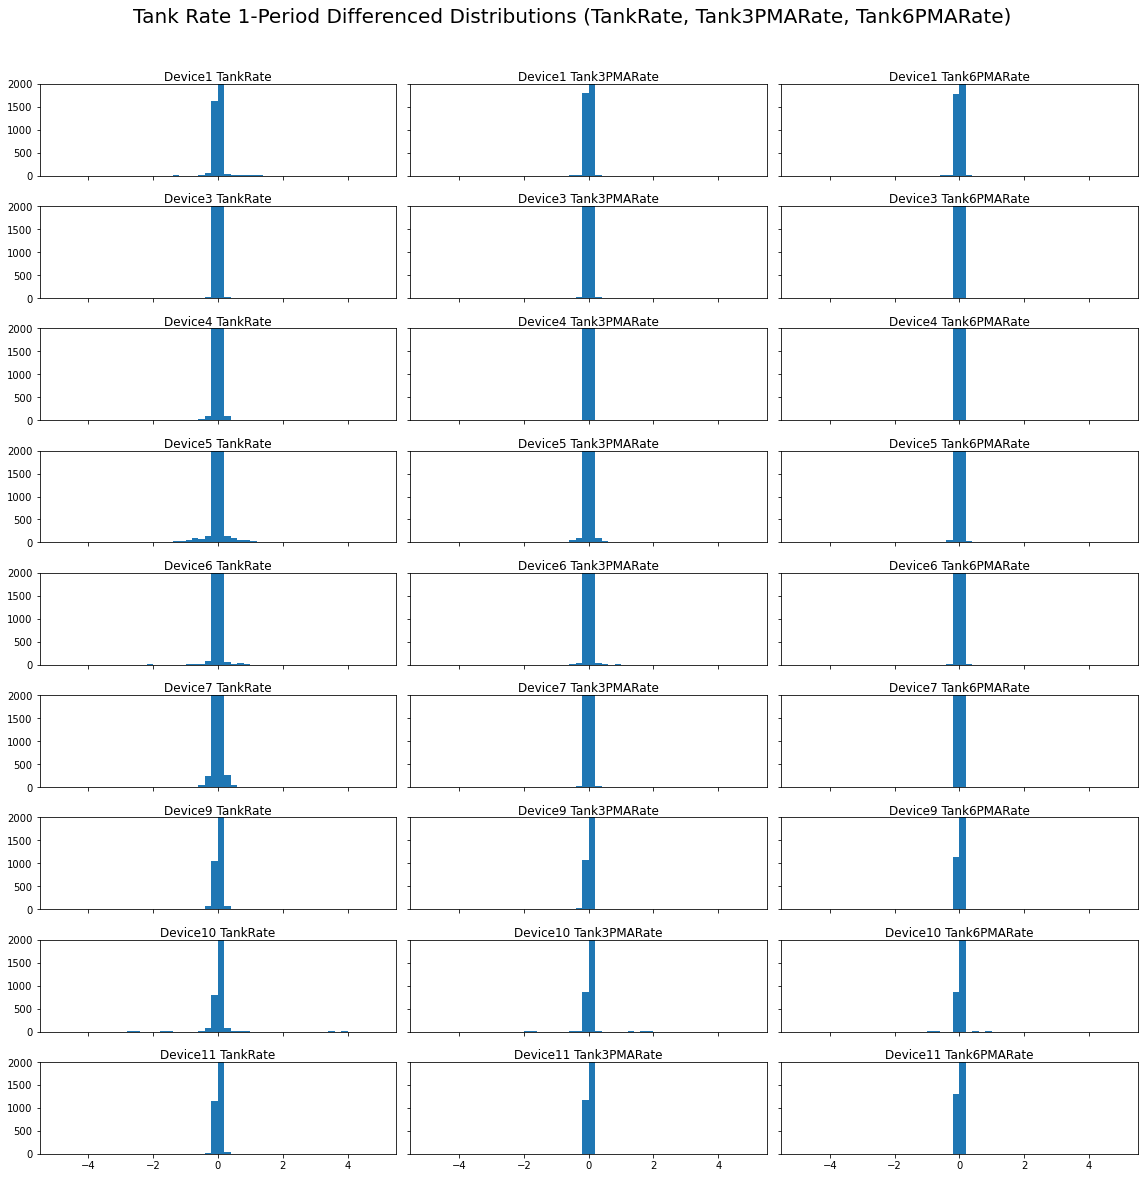

In [68]:
# plot tank rate distributions by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Tank Rate 1-Period Differenced Distributions (TankRate, Tank3PMARate, Tank6PMARate)', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create histogram for each device
    sap_devicesE[ii]['TankRate'].diff().plot.hist(ax=axs[c][0], bins=50, range=[-5, 5], ylim=(0,2000))
    sap_devicesE[ii]['Tank3PMARate'].diff().plot.hist(ax=axs[c][1], bins=50, range=[-5, 5], ylim=(0,2000))  
    sap_devicesE[ii]['Tank6PMARate'].diff().plot.hist(ax=axs[c][2], bins=50, range=[-5, 5], ylim=(0,2000))  
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
    # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1

plt.tight_layout()

## Data Exploratory Review and Feature Engineering

### Review relationships between features

#### Sap Flow Rate by Temperature

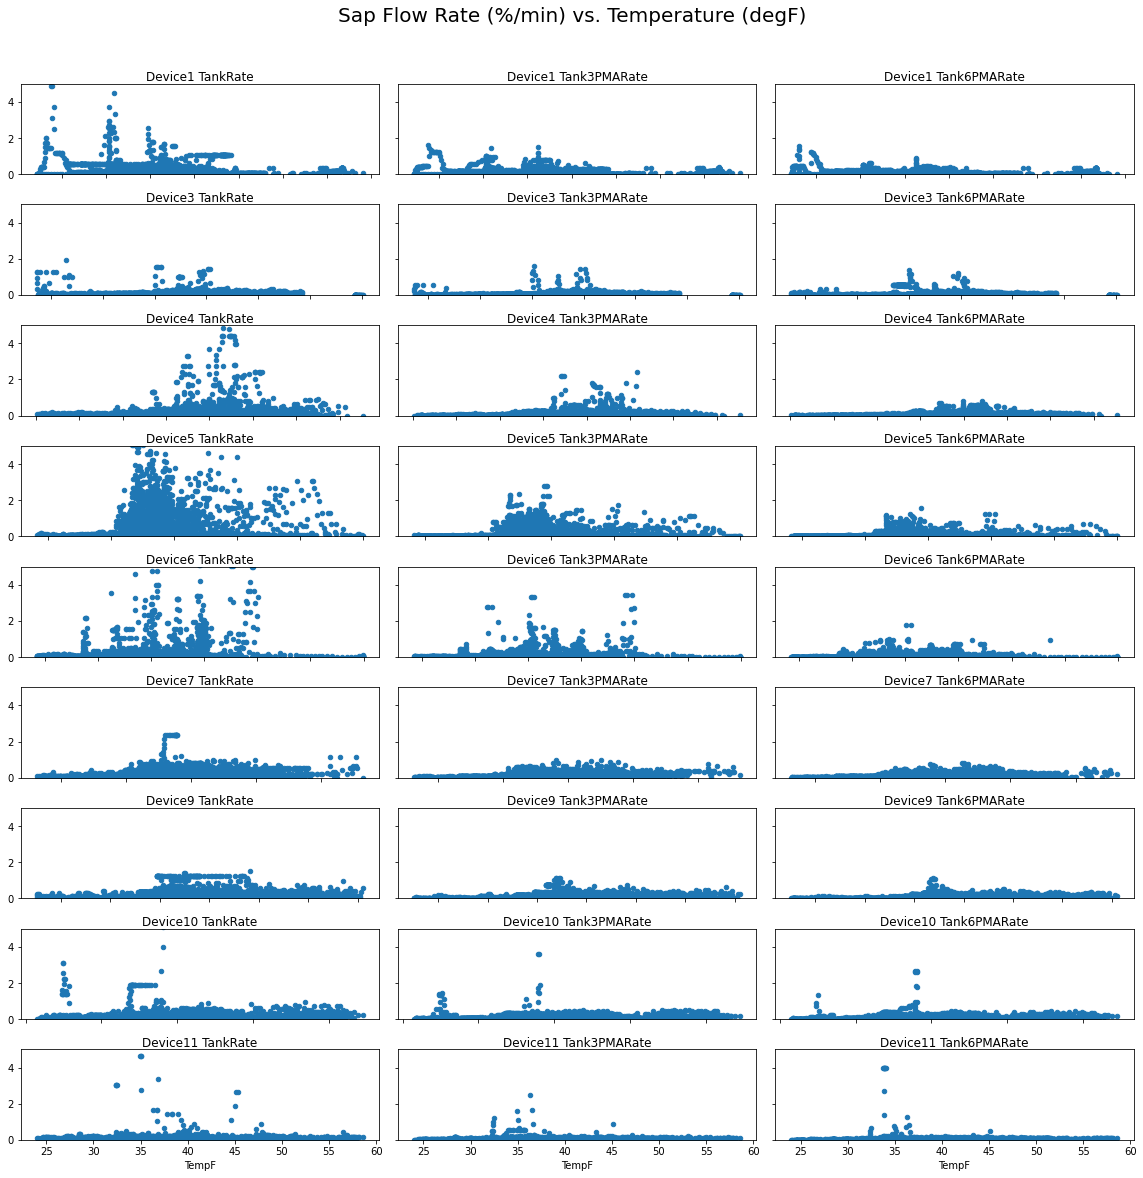

In [69]:
# plot tank rate by Temp by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Sap Flow Rate (%/min) vs. Temperature (degF)', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create scatterplot for each device
    sap_devicesE[ii].plot.scatter(ax=axs[c][0], x="TempF", y="TankRate", ylim=(0,5))
    sap_devicesE[ii].plot.scatter(ax=axs[c][1], x="TempF", y="Tank3PMARate", ylim=(0,5))
    sap_devicesE[ii].plot.scatter(ax=axs[c][2], x="TempF", y="Tank6PMARate", ylim=(0,5))
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
        axs[c][0].set_xlabel('')
        axs[c][1].set_xlabel('')
        axs[c][2].set_xlabel('')    
        # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1

plt.tight_layout()

Plot only Tank3PMARate vs. Temp

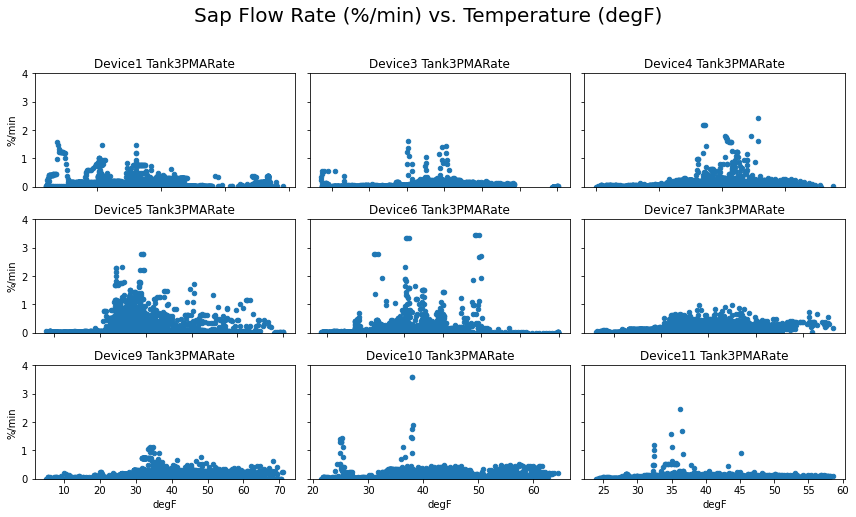

In [70]:
# plot tank rate by Temp by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=(len(good_ids)//3), figsize=(12,7))
fig.suptitle(f'Sap Flow Rate (%/min) vs. Temperature (degF)', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create scatterplot for each device
    sap_devicesE[ii].plot.scatter(ax=axs[c//3][c%3], x="TempF", y="Tank3PMARate", ylim=(0,4))
    # title each subplot
    axs[c//3][c%3].set_title(f'Device{ii} Tank3PMARate', size=12, y=1.0)
    # label the y-axis for the left column
    if (c%3) == 0:
        axs[c//3][c%3].set_ylabel('%/min')    
    else:
        axs[c//3][c%3].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if (c//3) != 2:
        axs[c//3][c%3].set_xticklabels([])
        axs[c//3][c%3].set_xlabel('')
    else:
        axs[c//3][c%3].set_xlabel('degF')
    # remove y-axis tick labels except for left column
    if (c%3) != 0:
        axs[c//3][c%3].set_yticklabels([])

    c += 1

plt.tight_layout()

#### Sap Flow Rate by UTC Hour

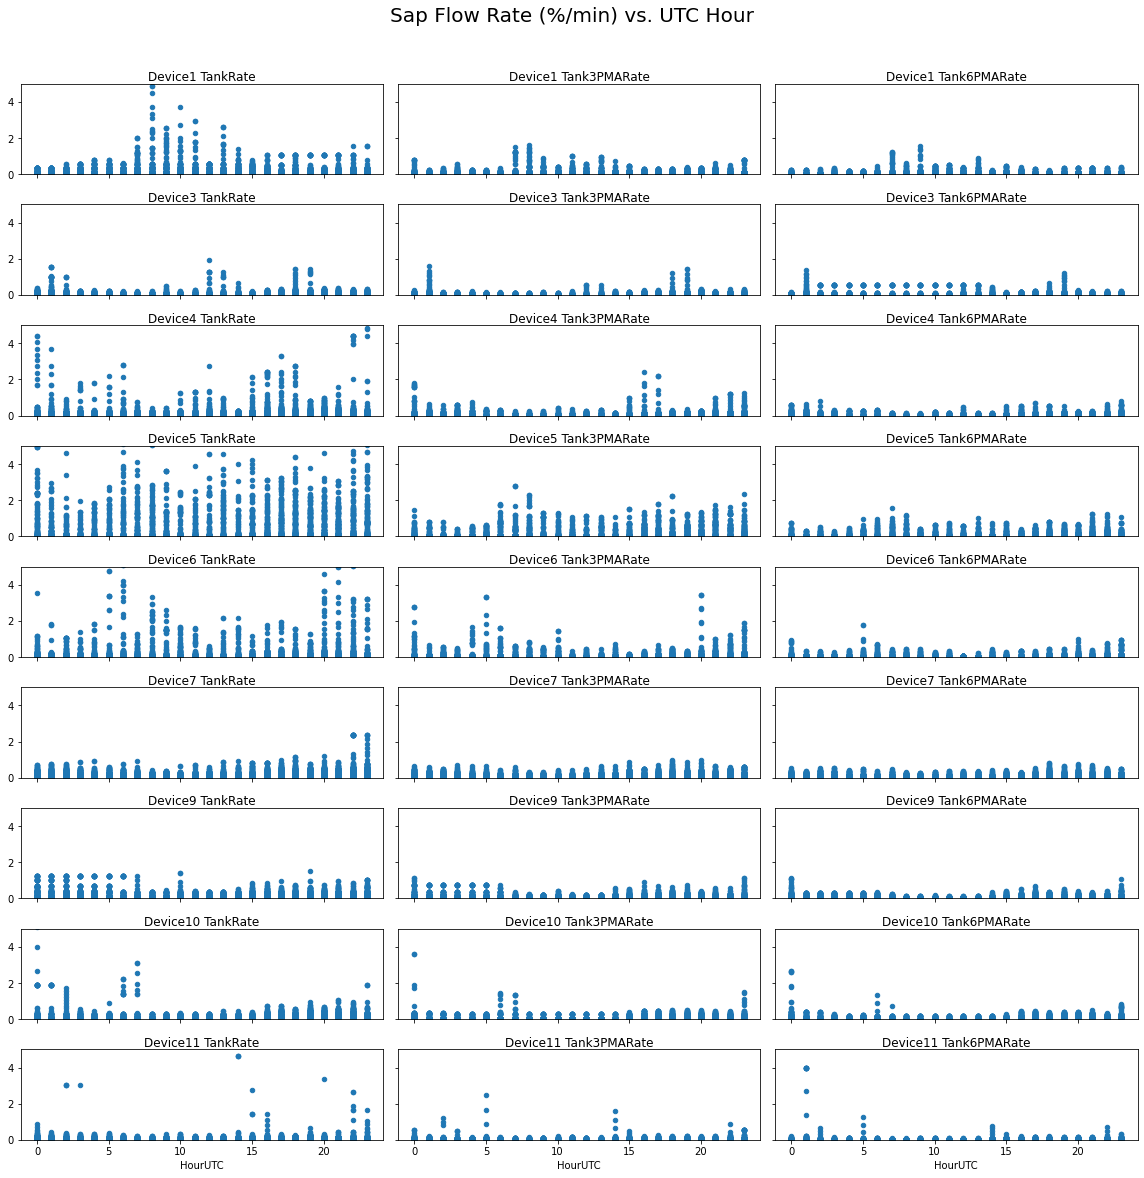

In [71]:
# plot tank rate by UTC Hour by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Sap Flow Rate (%/min) vs. UTC Hour', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create scatterplot for each device
    sap_devicesE[ii].plot.scatter(ax=axs[c][0], x="HourUTC", y="TankRate", ylim=(0,5))
    sap_devicesE[ii].plot.scatter(ax=axs[c][1], x="HourUTC", y="Tank3PMARate", ylim=(0,5))
    sap_devicesE[ii].plot.scatter(ax=axs[c][2], x="HourUTC", y="Tank6PMARate", ylim=(0,5))
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
        axs[c][0].set_xlabel('')
        axs[c][1].set_xlabel('')
        axs[c][2].set_xlabel('')    
        # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1
    
plt.tight_layout()    

Plot only Tank3PMARate vs. UTC Hour

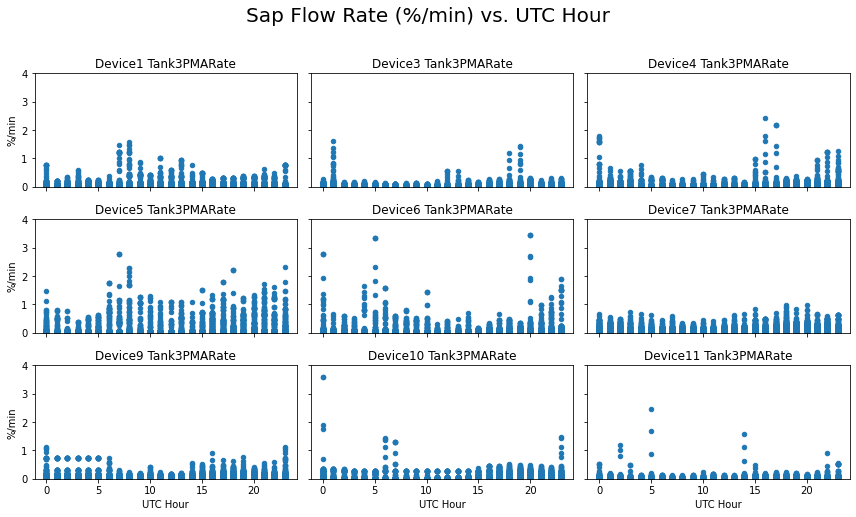

In [72]:
# plot tank rate by Temp by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=(len(good_ids)//3), figsize=(12,7))
fig.suptitle(f'Sap Flow Rate (%/min) vs. UTC Hour', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create scatterplot for each device
    sap_devicesE[ii].plot.scatter(ax=axs[c//3][c%3], x="HourUTC", y="Tank3PMARate", ylim=(0,4))
    # title each subplot
    axs[c//3][c%3].set_title(f'Device{ii} Tank3PMARate', size=12, y=1.0)
    # label the y-axis for the left column
    if (c%3) == 0:
        axs[c//3][c%3].set_ylabel('%/min')    
    else:
        axs[c//3][c%3].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if (c//3) != 2:
        axs[c//3][c%3].set_xticklabels([])
        axs[c//3][c%3].set_xlabel('')
    else:
        axs[c//3][c%3].set_xlabel('UTC Hour')
    # remove y-axis tick labels except for left column
    if (c%3) != 0:
        axs[c//3][c%3].set_yticklabels([])

    c += 1

plt.tight_layout()

#### Sap Flow Rate by Vacuum

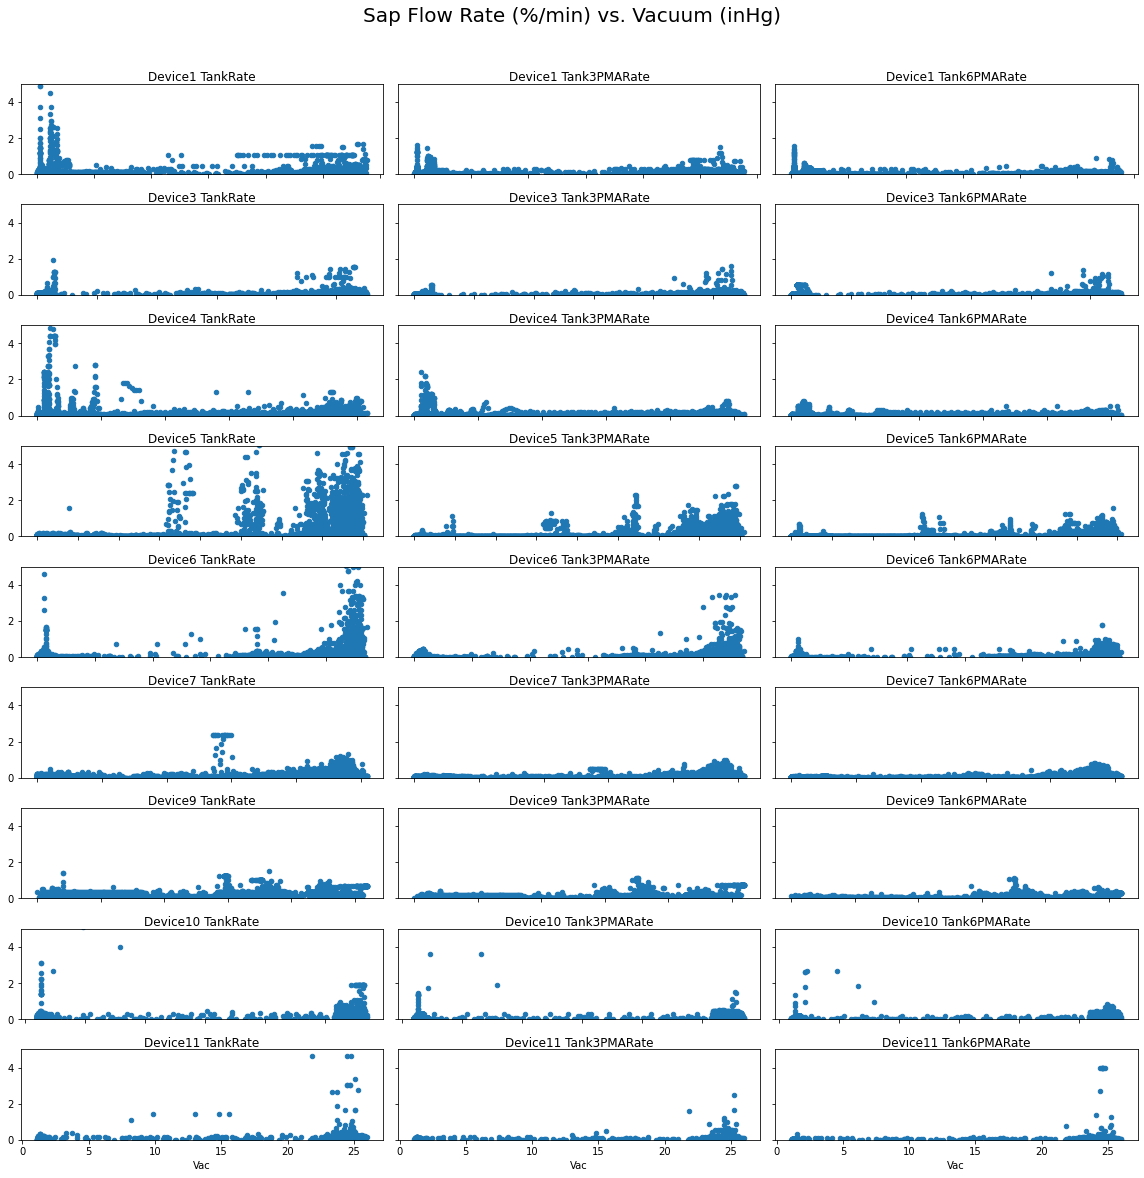

In [73]:
# plot tank rate by Vacuum by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Sap Flow Rate (%/min) vs. Vacuum (inHg)', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create scatterplot for each device
    sap_devicesE[ii].plot.scatter(ax=axs[c][0], x="Vac", y="TankRate", ylim=(0,5))
    sap_devicesE[ii].plot.scatter(ax=axs[c][1], x="Vac", y="Tank3PMARate", ylim=(0,5))
    sap_devicesE[ii].plot.scatter(ax=axs[c][2], x="Vac", y="Tank6PMARate", ylim=(0,5))
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
        axs[c][0].set_xlabel('')
        axs[c][1].set_xlabel('')
        axs[c][2].set_xlabel('')    
        # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1

plt.tight_layout()     

Plot only Tank3PMARate vs. Vacuum

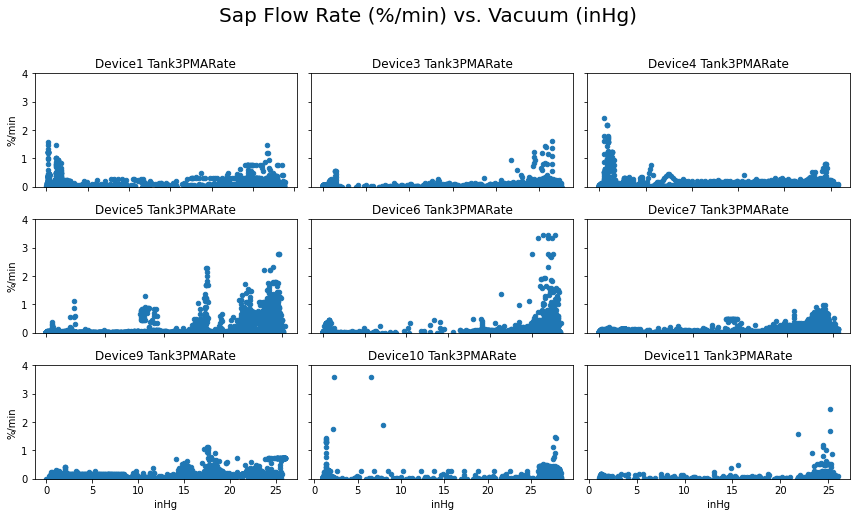

In [74]:
# plot tank rate by Temp by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=(len(good_ids)//3), figsize=(12,7))
fig.suptitle(f'Sap Flow Rate (%/min) vs. Vacuum (inHg)', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create scatterplot for each device
    sap_devicesE[ii].plot.scatter(ax=axs[c//3][c%3], x="Vac", y="Tank3PMARate", ylim=(0,4))
    # title each subplot
    axs[c//3][c%3].set_title(f'Device{ii} Tank3PMARate', size=12, y=1.0)
    # label the y-axis for the left column
    if (c%3) == 0:
        axs[c//3][c%3].set_ylabel('%/min')    
    else:
        axs[c//3][c%3].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if (c//3) != 2:
        axs[c//3][c%3].set_xticklabels([])
        axs[c//3][c%3].set_xlabel('')
    else:
        axs[c//3][c%3].set_xlabel('inHg')
    # remove y-axis tick labels except for left column
    if (c%3) != 0:
        axs[c//3][c%3].set_yticklabels([])

    c += 1

plt.tight_layout()

### Create a Vacuum On/Off indicator feature

In [75]:
# create Vacuum On/Off feature On (Vac >= 5"Hg) Off (Vac < 5"Hg)
OnVac = 5
for ii in good_ids:
        # create VacOnOff column and populate with zero if off and 1 if on
        sap_devicesE[ii]['VacOn'] = (sap_devicesE[ii]['Vac'] >= OnVac)

# inspect data for Device3
sap_devicesE[3][['DEVICE_ID','Vac', 'VacOn']].sample(5)

DEVICE_ID    Vac  VacOn
TSTAMP                                          
2020-03-12 06:14:55.760          3  26.28   True
2020-03-09 01:08:05.893          3  26.64   True
2020-03-04 22:21:51.307          3  24.88   True
2020-03-01 13:10:21.453          3   0.84  False
2020-03-20 14:59:46.590          3   0.71  False

#### Sap Flow Rate by Vacuum On/Off

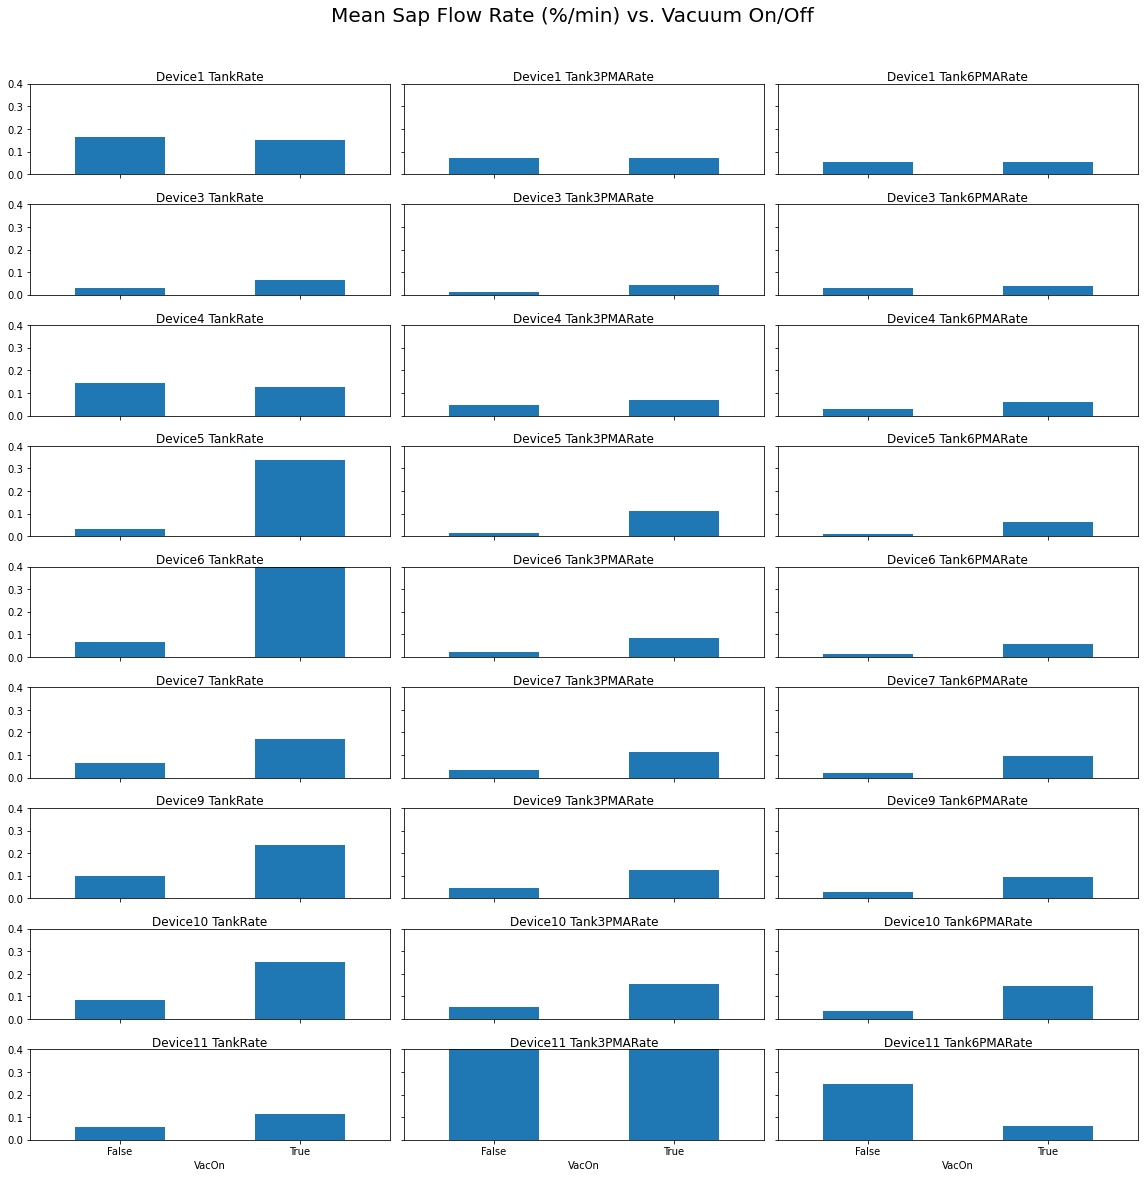

In [76]:
# plot tank rate by Vacuum On/Off
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Mean Sap Flow Rate (%/min) vs. Vacuum On/Off', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create barplot for each device
    sap_devicesE[ii].groupby(['VacOn'])[['TankRate']].agg(['mean']).plot.bar(rot=0, ax=axs[c][0], ylim=(0,0.4), legend=None)
    sap_devicesE[ii].groupby(['VacOn'])[['Tank3PMARate']].agg(['mean']).plot.bar(rot=0, ax=axs[c][1], ylim=(0,0.4), legend=None)
    sap_devicesE[ii].groupby(['VacOn'])[['Tank6PMARate']].agg(['mean']).plot.bar(rot=0, ax=axs[c][2], ylim=(0,0.4), legend=None)
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
        axs[c][0].set_xlabel('')
        axs[c][1].set_xlabel('')
        axs[c][2].set_xlabel('')    
        # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1

plt.tight_layout()

### Create Freeze indicator features

#### Current Period Freeze Indicator

In [77]:
# create Freeze / NoFreeze feature: Freeze (Temp <= 32 degF) NoFreeze (Temp > 32 degF)

FreezeTemp = 32
for ii in good_ids:
        # create Freeze column and populate with zero if not freezing and 1 if freezing temp
        sap_devicesE[ii]['Freeze'] = (sap_devicesE[ii]['TempF'] <= FreezeTemp)


# inspect data for Device3
sap_devicesE[3][['DEVICE_ID','TempF', 'Freeze']].sample(5)

DEVICE_ID  TempF  Freeze
TSTAMP                                           
2020-03-20 17:08:59.833          3   28.5    True
2020-03-22 07:01:24.420          3   20.3    True
2020-02-23 16:02:45.027          3   40.3   False
2020-03-28 06:01:41.393          3   34.9   False
2020-03-23 11:55:42.557          3   25.3    True

#### Sap Flow Rate by Current Period Above Freezing and Freezing Temperature

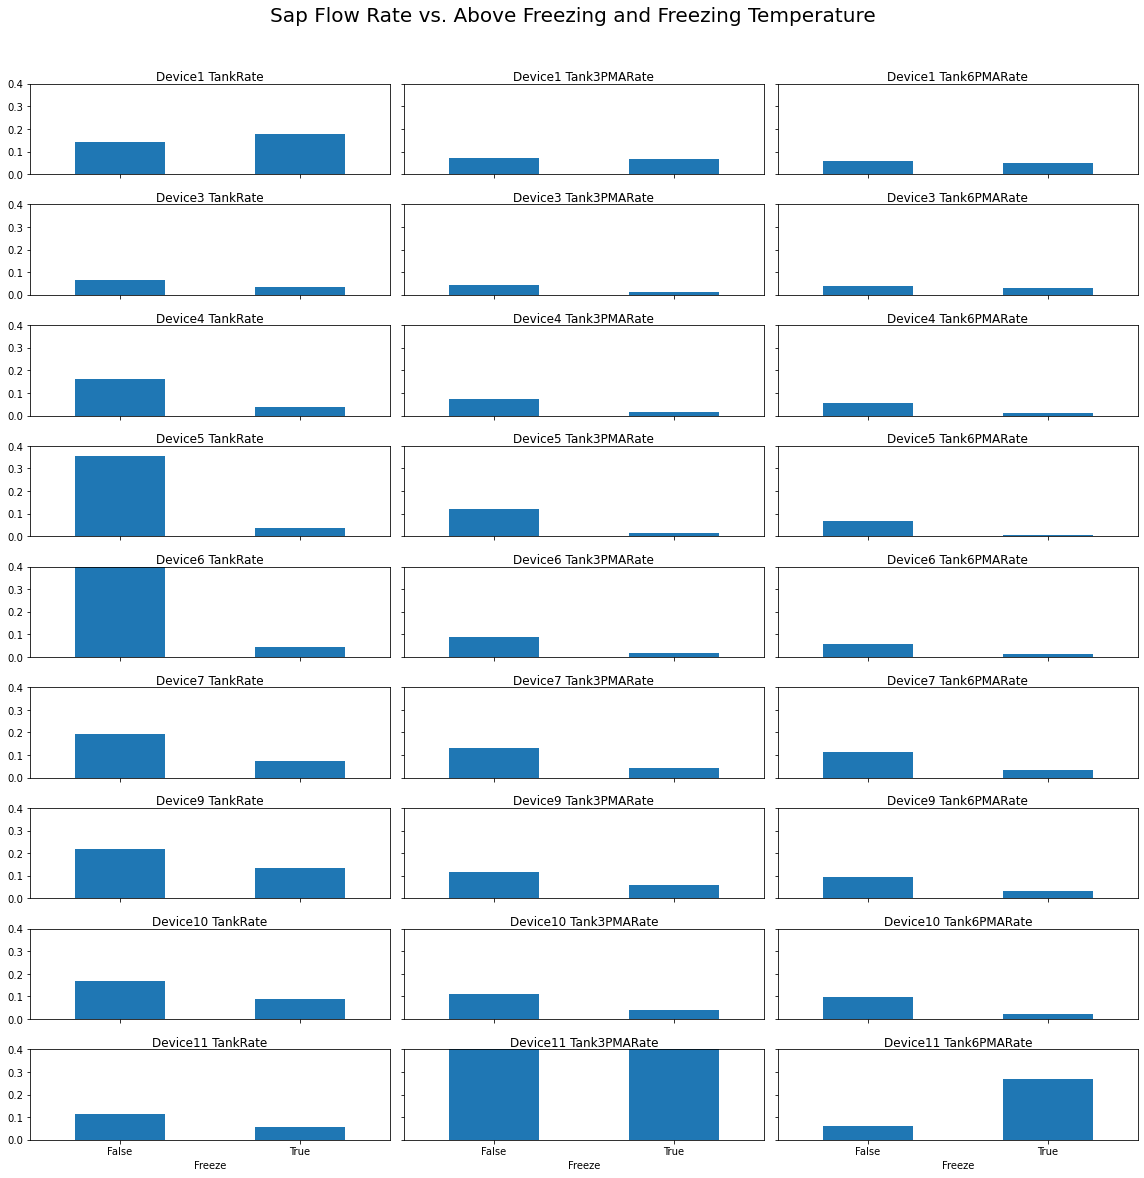

In [78]:
# plot tank rate by Freeze True/False
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Sap Flow Rate vs. Above Freezing and Freezing Temperature', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create barplot for each device
    sap_devicesE[ii].groupby(['Freeze'])[['TankRate']].agg(['mean']).plot.bar(rot=0, ax=axs[c][0], ylim=(0,0.4), legend=None)
    sap_devicesE[ii].groupby(['Freeze'])[['Tank3PMARate']].agg(['mean']).plot.bar(rot=0, ax=axs[c][1], ylim=(0,0.4), legend=None)
    sap_devicesE[ii].groupby(['Freeze'])[['Tank6PMARate']].agg(['mean']).plot.bar(rot=0, ax=axs[c][2], ylim=(0,0.4), legend=None)
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
        axs[c][0].set_xlabel('')
        axs[c][1].set_xlabel('')
        axs[c][2].set_xlabel('')    
        # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1

plt.tight_layout()

#### Last X Hourly Period Freeze Indicators

In [79]:
# load libraries
from datetime import timedelta

# calculate Freeze indicator for previous windowed time periods from the current period

# define function to return the calculated tank fill rate over a windowed dataframe
def freeze_period(row, time_offsets, freeze_series):

    #debug: 
    #print(row.index[0])

    start_offset_hrs = time_offsets[0]
    end_offset_hrs = time_offsets[1]
    
    # calc time deltas (in seconds) for timeframe relative to current row time
    start_delta = timedelta(0, start_offset_hrs * 3600)
    end_delta = timedelta(0, end_offset_hrs * 3600)

    # calc time indexes to get freeze indicator
    start_time = row.index[0] + start_delta
    end_time = row.index[0] + end_delta

    # freeze indicator is 1 when any time during the period was in a freeze condition, otherwise 0
    # requires a minimum of 5 data points within the sampling period, or NaN will result
    freeze_ind = freeze_series[start_time:end_time].sum(skipna=False, min_count=5)
    
    if freeze_ind > 0:
        state = True
    else: # missing values will also assume to be false
        state = False
        
    return(state)
    

# apply function to create new feature based on each row condition
freeze_ind_cols = ['Freeze.1hr', 'Freeze.1-3hr', 'Freeze.3-6hr']
freeze_ind_offsets = [(-1,0), (-3,-1), (-6,-3)]

# compute the X-hr period freeze indicators
for ii in good_ids:
    for ff in range(len(freeze_ind_cols)):
        # populate series of freeze indicators per device dataframe
        freeze_series = sap_devicesE[ii]['Freeze']
        # applies a rolling window to the dataframe to return single row-by-rows with the index (time index) for the calculation
        sap_devicesE[ii][freeze_ind_cols[ff]] = \
        sap_devicesE[ii]['Freeze'].rolling(window=1, min_periods=1) \
        .apply(freeze_period, args=(freeze_ind_offsets[ff],freeze_series), raw=False).astype('bool')


In [80]:
# inspect data for Device3
sap_devicesE[3].sample(5)

DEVICE_ID  TempF  Tank    Vac  HourUTC  \
TSTAMP                                                            
2020-02-26 23:33:12.857          3   23.7   4.9   0.63       23   
2020-03-16 15:12:21.550          3   31.5   1.1   0.54       15   
2020-03-31 13:39:58.663          3   32.3  27.1  26.75       13   
2020-03-25 22:36:36.430          3   41.7  34.0  26.43       22   
2020-03-05 17:20:02.900          3   36.9  28.2  25.72       17   

                         elapsed_seconds  nonuniform_period  Tank3PMovAvg  \
TSTAMP                                                                      
2020-02-26 23:33:12.857          333.014              False      5.407590   
2020-03-16 15:12:21.550          329.033              False      0.855555   
2020-03-31 13:39:58.663          304.000              False     27.100000   
2020-03-25 22:36:36.430          304.003              False     33.878897   
2020-03-05 17:20:02.900          304.003              False     27.466667   

                         Tank6PMovAvg  TankRate  Tank3PMARate  Tank6PMARate  \
TSTAMP                                                                        
2020-02-26 23:33:12.857      5.687128  0.000000  0.000000e+00      0.006097   
2020-03-16 15:12:21.550      0.806027  0.043050  1.812119e-02      0.006018   
2020-03-31 13:39:58.663     27.133333  0.000000  1.402387e-15      0.000000   
2020-03-25 22:36:36.430     33.556115  0.033226  4.605218e-02      0.029605   
2020-03-05 17:20:02.900     26.816667  0.138157  1.118410e-01      0.101973   

                         NegRateInd  NegRate3PMAInd  NegRate6PMAInd  VacOn  \
TSTAMP                                                                       
2020-02-26 23:33:12.857        True            True            True  False   
2020-03-16 15:12:21.550       False           False           False  False   
2020-03-31 13:39:58.663       False           False            True   True   
2020-03-25 22:36:36.430       False           False           False   True   
2020-03-05 17:20:02.900       False           False           False   True   

                         Freeze  Freeze.1hr  Freeze.1-3hr  Freeze.3-6hr  
TSTAMP                                                                   
2020-02-26 23:33:12.857    True        True          True          True  
2020-03-16 15:12:21.550    True        True          True          True  
2020-03-31 13:39:58.663   False        True          True         False  
2020-03-25 22:36:36.430   False       False         False         False  
2020-03-05 17:20:02.900   False       False         False         False

#### Sap Flow Rate by Past Period Freezing Conditions

In [81]:
(sap_devicesE[3].groupby(['DEVICE_ID','Freeze', 'Freeze.1hr','Freeze.1-3hr','Freeze.3-6hr'])
     [['TankRate', 'Tank3PMARate', 'Tank6PMARate']]
     .agg(['mean','size'])
)

TankRate        \
                                                           mean  size   
DEVICE_ID Freeze Freeze.1hr Freeze.1-3hr Freeze.3-6hr                   
3         False  False      False        False         0.064627  4943   
                                         True          0.102668   747   
                            True         False         0.036530    45   
                                         True          0.049177   519   
                 True       False        False         0.049737    21   
                                         True          0.000000     1   
                            True         False         0.056717    57   
                                         True          0.031609   281   
          True   False      False        False         0.009288     4   
                                         True          0.000235     4   
                 True       False        False         0.079503   243   
                                         True          0.013541    37   
                            True         False         0.032013   426   
                                         True          0.030307  3509   

                                                      Tank3PMARate        \
                                                              mean  size   
DEVICE_ID Freeze Freeze.1hr Freeze.1-3hr Freeze.3-6hr                      
3         False  False      False        False            0.042157  4943   
                                         True             0.075517   747   
                            True         False            0.025815    45   
                                         True             0.030946   519   
                 True       False        False            0.033757    21   
                                         True             0.000000     1   
                            True         False            0.027447    57   
                                         True             0.019194   281   
          True   False      False        False            0.013158     4   
                                         True             0.000078     4   
                 True       False        False            0.050861   243   
                                         True             0.003821    37   
                            True         False            0.016532   426   
                                         True             0.011422  3509   

                                                       Tank6PMARate        
                                                               mean  size  
DEVICE_ID Freeze Freeze.1hr Freeze.1-3hr Freeze.3-6hr                      
3         False  False      False        False         3.881489e-02  4943  
                                         True          6.614115e-02   747  
                            True         False         2.165440e-02    45  
                                         True          2.554322e-02   519  
                 True       False        False         3.443790e-02    21  
                                         True          6.557313e-03     1  
                            True         False         1.851626e-02    57  
                                         True          1.621089e-02   281  
          True   False      False        False         1.752984e-16     4  
                                         True          0.000000e+00     4  
                 True       False        False         4.787758e-02   243  
                                         True          1.687002e-03    37  
                            True         False         4.163414e-02   426  
                                         True          2.573794e-02  3509

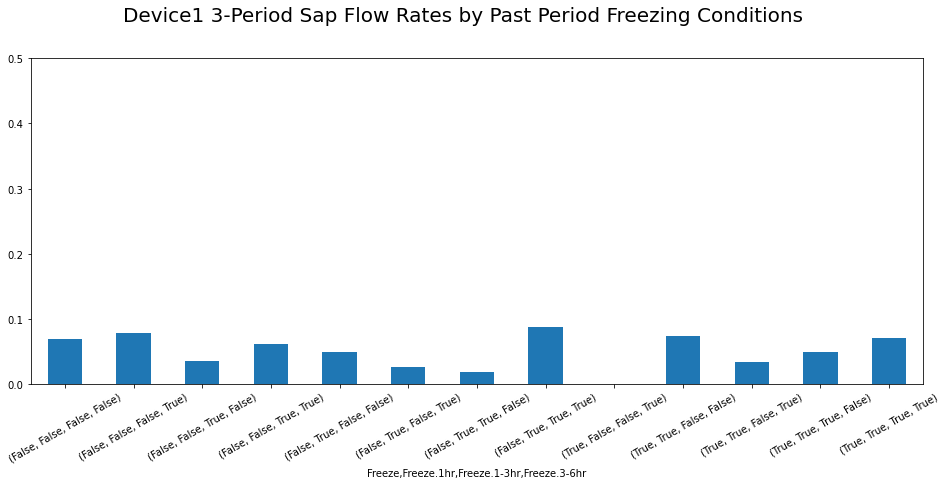

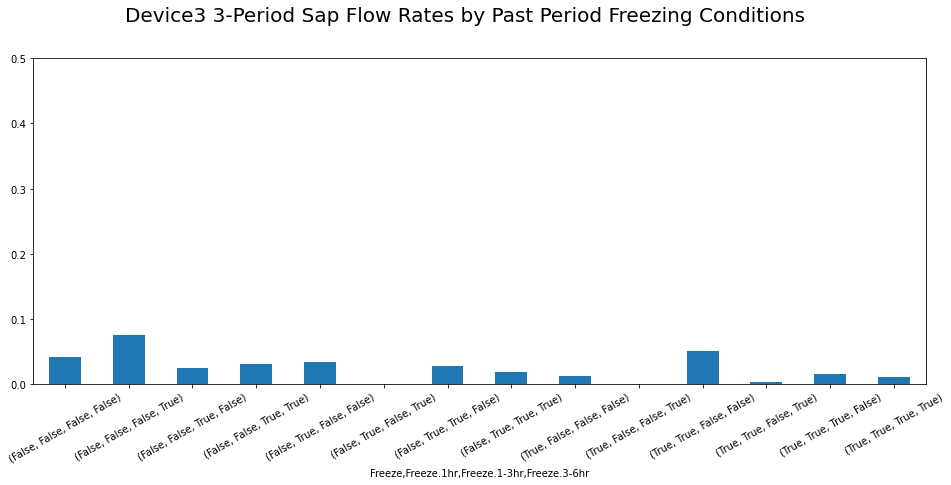

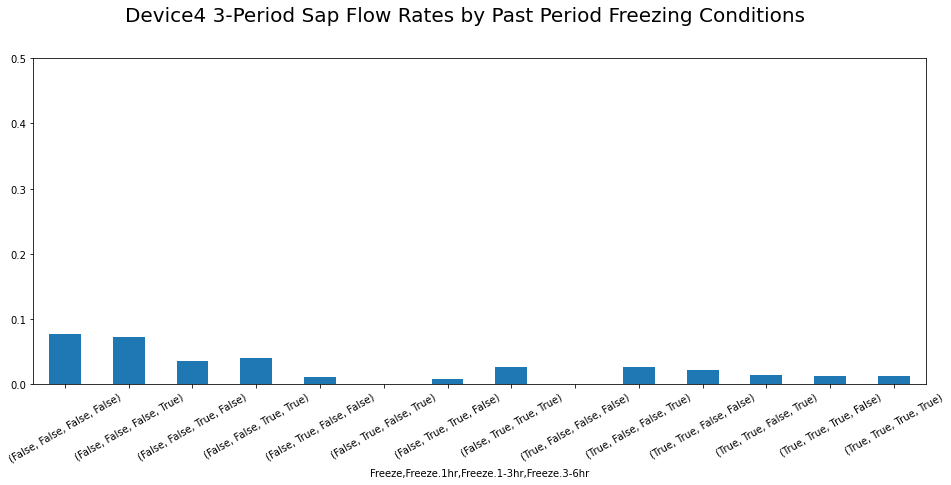

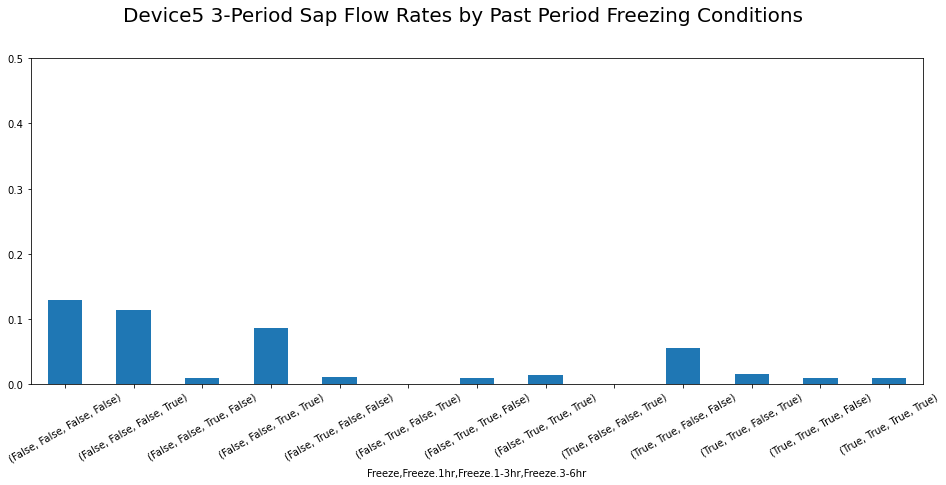

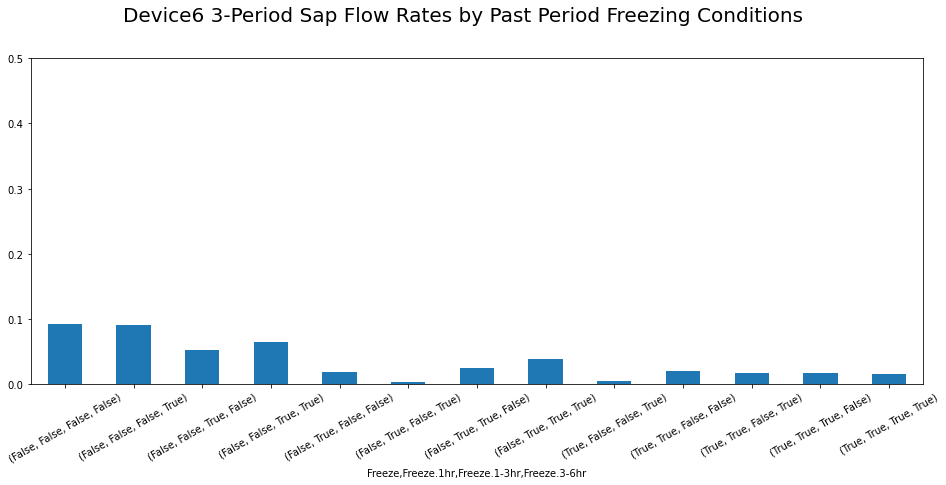

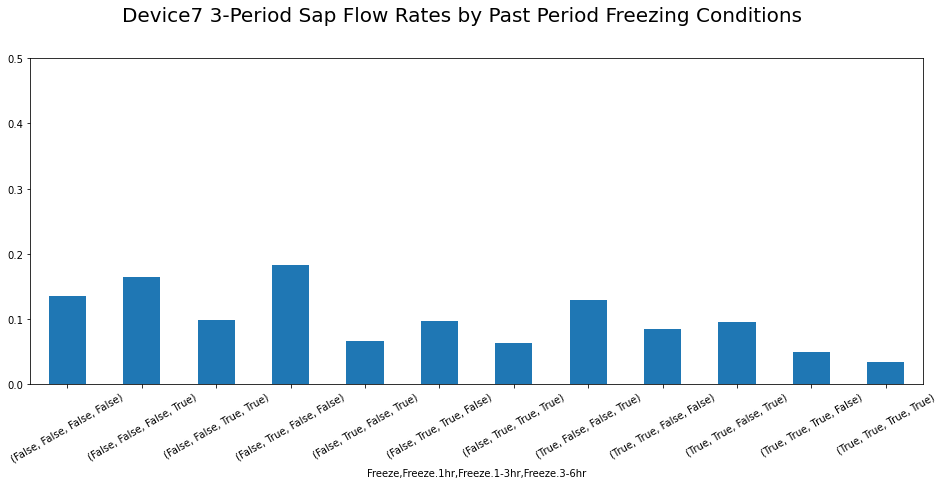

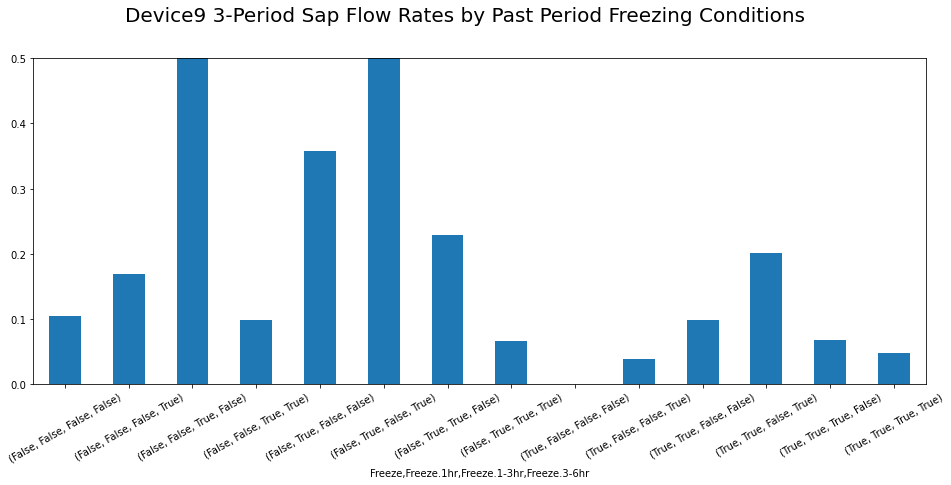

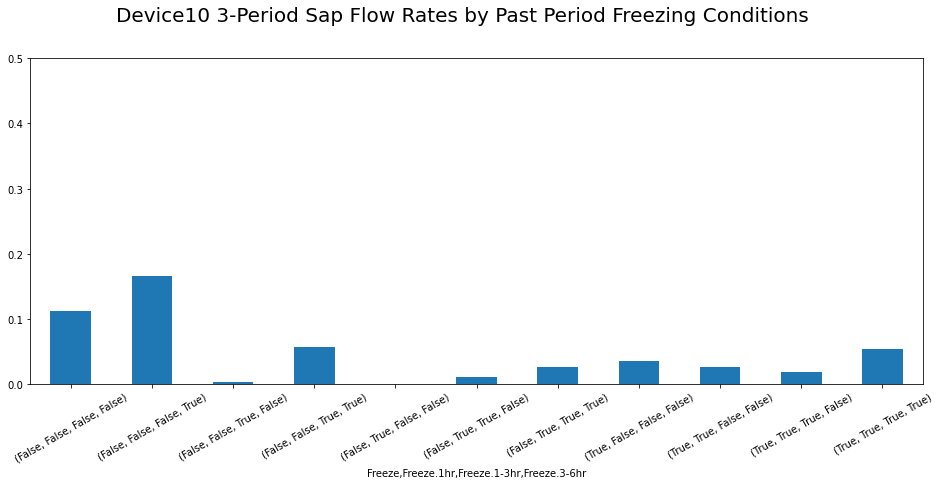

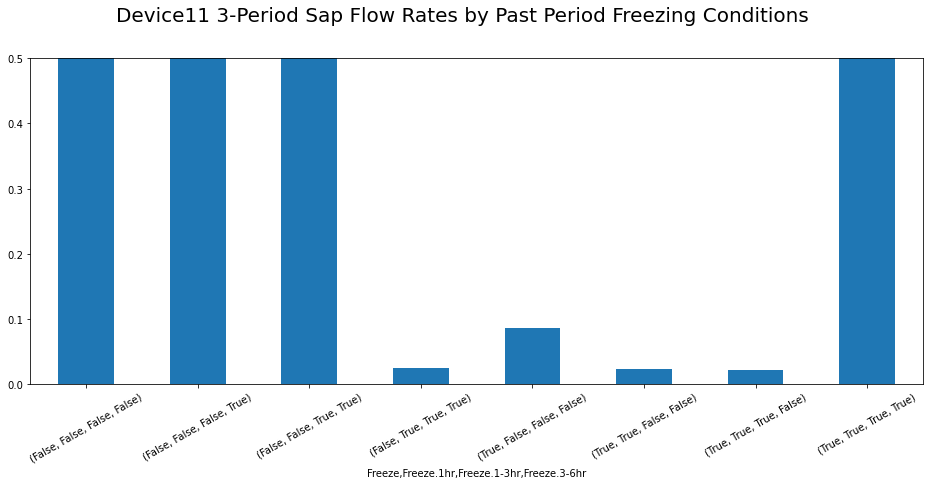

In [82]:
%matplotlib inline

import matplotlib.pyplot as plt

freeze_cols = ['Freeze', 'Freeze.1hr', 'Freeze.1-3hr', 'Freeze.3-6hr']

# generate trends of Tank Levels by device
for ii in good_ids:
    fig, ax1 = plt.subplots(1,1, figsize=(16,6))
    fig.suptitle(f'Device{ii} 3-Period Sap Flow Rates by Past Period Freezing Conditions', size = 20, y=1)
    ( sap_devicesE[ii].groupby(freeze_cols)[['Tank3PMARate']].agg(['mean'])
     .plot.bar(rot=30, ax=ax1, ylim=(0,0.5), legend=None) )


### Combine device dataframes for feature analysis across devices

In [83]:
# combine device dataframes into a single dataframe
# (using deep copy to eliminate pointer to referenced df)
ctr = 0
for ii in good_ids:
    if ctr == 0:
        all_devicesE = sap_devicesE[ii].copy().reset_index()
    else:
        all_devicesE = all_devicesE.append(sap_devicesE[ii].copy().reset_index())
    ctr += 1

In [84]:
all_devicesE.sample(5)


TSTAMP  DEVICE_ID  TempF       Tank    Vac  HourUTC  \
9100 2020-03-26 15:11:39.297          3   38.3  28.200000  25.11       15   
2589 2020-04-02 04:05:46.097         11   37.4  19.450000  24.54        4   
339  2020-03-23 08:56:02.220         10   29.8   0.000000   1.38        8   
5493 2020-03-27 19:16:25.303          6   42.4  41.100000  27.25       19   
3387 2020-04-05 06:23:42.223         10   25.7  24.106696   1.30        6   

      elapsed_seconds  nonuniform_period  Tank3PMovAvg  Tank6PMovAvg  ...  \
9100          304.000              False  2.833333e+01  2.826667e+01  ...   
2589          304.000              False  1.895000e+01  1.879167e+01  ...   
339           305.003              False  1.894781e-14  2.368476e-15  ...   
5493          304.000              False  4.110000e+01  4.072978e+01  ...   
3387          304.000              False  2.442983e+01  3.063158e+01  ...   

      Tank3PMARate  Tank6PMARate  NegRateInd  NegRate3PMAInd  NegRate6PMAInd  \
9100      0.000000      0.006116        True           False            True   
2589      0.043989      0.025205       False           False           False   
339       0.000000      0.000000       False           False           False   
5493      0.025058      0.036184       False           False           False   
3387      0.404634      0.185348       False            True           False   

      VacOn  Freeze  Freeze.1hr  Freeze.1-3hr  Freeze.3-6hr  
9100   True   False       False         False         False  
2589   True   False       False         False         False  
339   False    True        True          True          True  
5493   True   False       False         False         False  
3387  False    True        True          True          True  

[5 rows x 21 columns]

#### Heatmap of Tank Flow Rate by HourUTC across devices

In [85]:
(all_devicesE.groupby(['DEVICE_ID','HourUTC'])
     [['Tank3PMARate']]
     .agg(['mean'])
     .unstack('DEVICE_ID')
     .style.background_gradient(axis='rows')
)

#### Sap Flow Rate by Current Period Freeze Indicator across devices

In [86]:
# review summary stats across all devices

(all_devicesE
     .groupby(['DEVICE_ID','Freeze'])
     [['TankRate', 'Tank3PMARate', 'Tank6PMARate']]
     .agg(['mean','size'])
)


TankRate       Tank3PMARate       Tank6PMARate      
                      mean  size         mean  size         mean  size
DEVICE_ID Freeze                                                      
1         False   0.140408  3253     0.070195  3253     0.056114  3253
          True    0.177769  3106     0.068674  3106     0.049276  3106
3         False   0.065992  6614     0.043798  6614     0.039589  6614
          True    0.033114  4223     0.014131  4223     0.028356  4223
4         False   0.162052  5529     0.072576  5529     0.056555  5529
          True    0.039504  1622     0.013805  1622     0.010006  1622
5         False   0.357051  5898     0.118825  5898     0.066972  5898
          True    0.034787  2668     0.013292  2668     0.007179  2668
6         False   0.606391  5171     0.087431  5171     0.058741  5171
          True    0.042187  1911     0.016962  1911     0.011646  1911
7         False   0.193357  5397     0.131133  5397     0.112062  5397
          True    0.074004  2546     0.040698  2546     0.032448  2546
9         False   0.218217  2878     0.117333  2878     0.093557  2878
          True    0.133253  1621     0.059590  1621     0.032272  1621
10        False   0.168849  2676     0.110154  2676     0.096433  2676
          True    0.088464   837     0.040802   837     0.021298   837
11        False   0.114260  2843     2.055329  2843     0.059179  2843
          True    0.054585   708     0.705879   708     0.271171   708

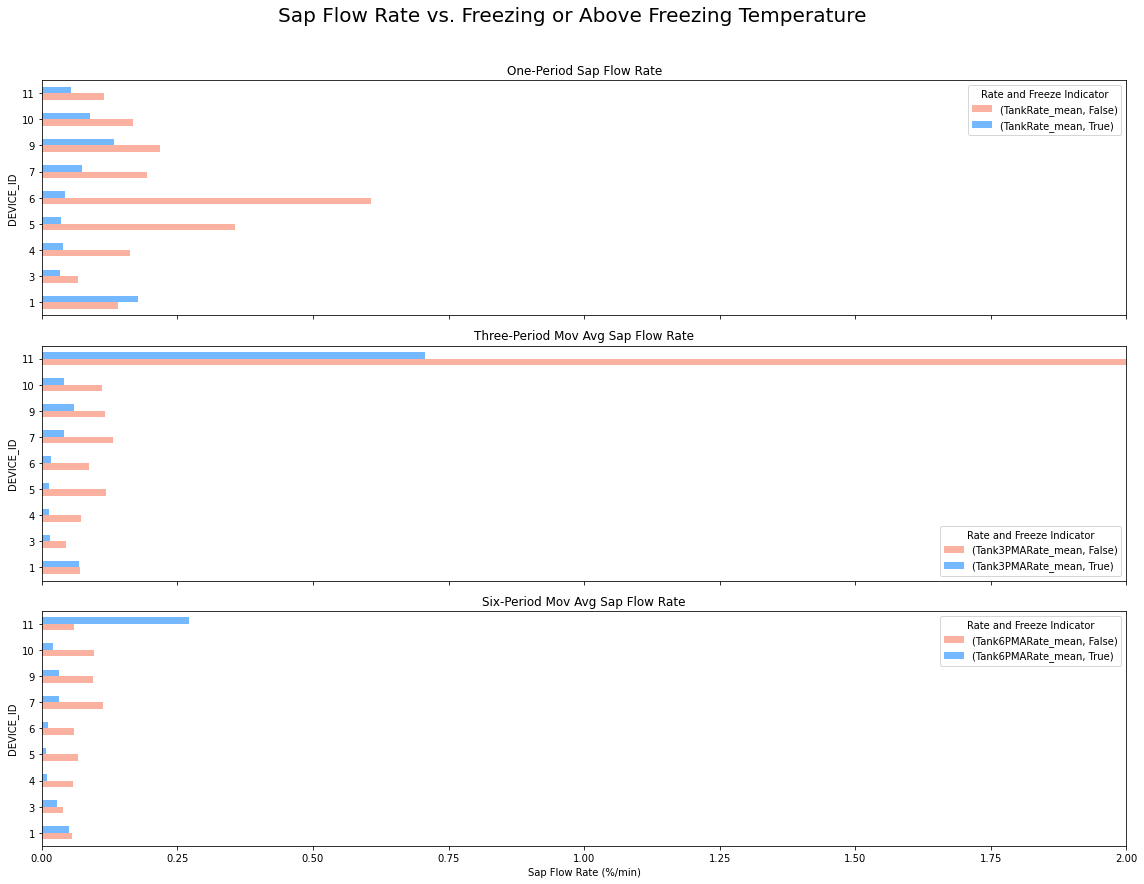

In [87]:
# plot tank rate by Freeze True/False
%matplotlib inline
import matplotlib.pyplot as plt

def flatten_cols(df):
    df.columns = ['_'.join(x) for x in df.columns.to_flat_index()]
    return df

fig, axs = plt.subplots(ncols=1, nrows=len(TankRateCols), figsize=(16,12))
fig.suptitle(f'Sap Flow Rate vs. Freezing or Above Freezing Temperature', size = 20, y=1.02)

colors = ['#fab1a0', '#74b9ff']

# seed subplot row counter
c = 0
for rr in range(len(TankRateCols)):
     # create barplots by device and rate column
    (all_devicesE.groupby(['DEVICE_ID','Freeze'])[[TankRateCols[rr]]].agg(['mean'])
     .pipe(flatten_cols)
     .unstack('Freeze')
     .plot.barh(rot=0, ax=axs[rr], width=0.5, color=colors, xlim=(0,2))
     .legend(title="Rate and Freeze Indicator")
    ) 
    # title each subplot
    # axs[rr].set_title(f'Sap Flow Rate by Device', size=10, y=0.97)
    # remove x-axis tick labels except for bottom row
    if c != (len(TankRateCols)-1):
        axs[rr].set_xticklabels([])
        axs[rr].set_xlabel('')
    else:
        axs[rr].set_xlabel('Sap Flow Rate (%/min)')
    # incremement subplot row counter
    c += 1

    # title each subplot
axs[0].set_title('One-Period Sap Flow Rate')
axs[1].set_title('Three-Period Mov Avg Sap Flow Rate')
axs[2].set_title('Six-Period Mov Avg Sap Flow Rate')

plt.tight_layout()

#### Heat Maps of Sap Flow Rate by Past Period Freeze Indicators across devices

As shown, higher sap flows occur in the absence of current or recent past period freezing conditions.  Some devices show higher sap flows without current freeze conditions but with some freezing recency.  Therefore these features appear to provide some information that could be used for modeling.

In [88]:
# one-period tank rate

(all_devicesE.groupby(['DEVICE_ID','Freeze', 'Freeze.1hr','Freeze.1-3hr','Freeze.3-6hr'])
     [['TankRate']]
     .agg(['mean'])
     .unstack('DEVICE_ID')
     .reset_index()
     .style.background_gradient(axis='rows')
     .highlight_null(null_color='white')
     .hide_index() 
)

In [89]:
# 3-period tank rate

(all_devicesE.groupby(['DEVICE_ID','Freeze', 'Freeze.1hr','Freeze.1-3hr','Freeze.3-6hr'])
     [['Tank3PMARate']]
     .agg(['mean'])
     .unstack('DEVICE_ID')
     .reset_index()
     .style.background_gradient(axis='rows')
     .highlight_null(null_color='white')
     .hide_index()
)

In [90]:
# 6-period tank rate

(all_devicesE.groupby(['DEVICE_ID','Freeze', 'Freeze.1hr','Freeze.1-3hr','Freeze.3-6hr'])
     [['Tank6PMARate']]
     .agg(['mean'])
     .unstack('DEVICE_ID')
     .reset_index()
     .style.background_gradient(axis='rows')
     .highlight_null(null_color='white')
     .hide_index()
)

## Review Sap Flow Rate trends

The following focuses on analysis of the Sap Flow Rates, which will be the predicted value(s) of modeling efforts.

### Review Trends of Sap Flow Rate by Device

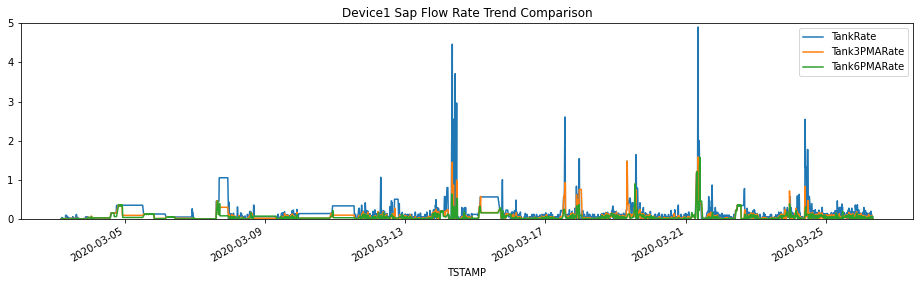

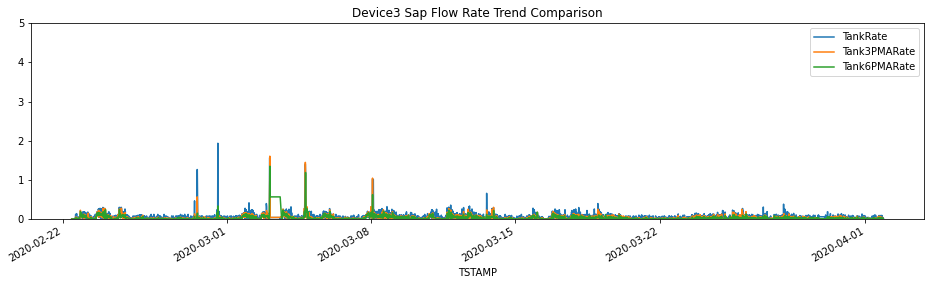

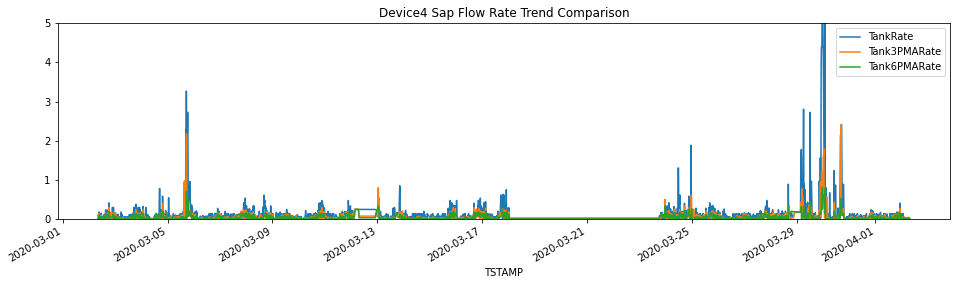

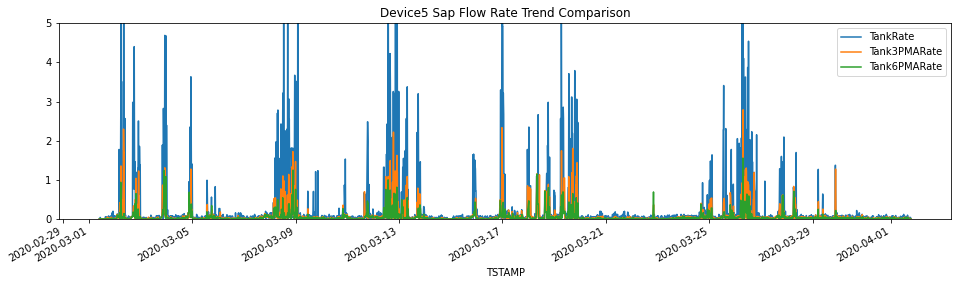

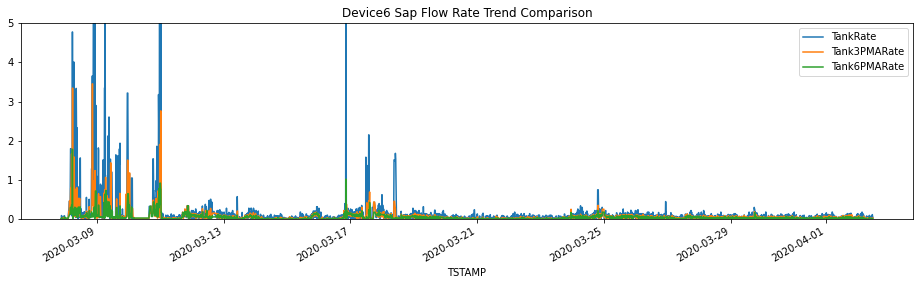

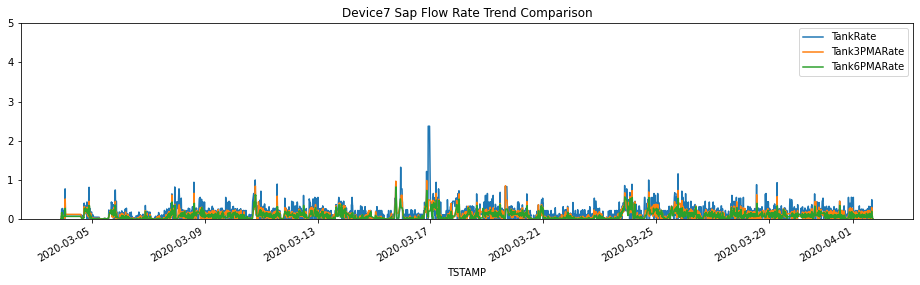

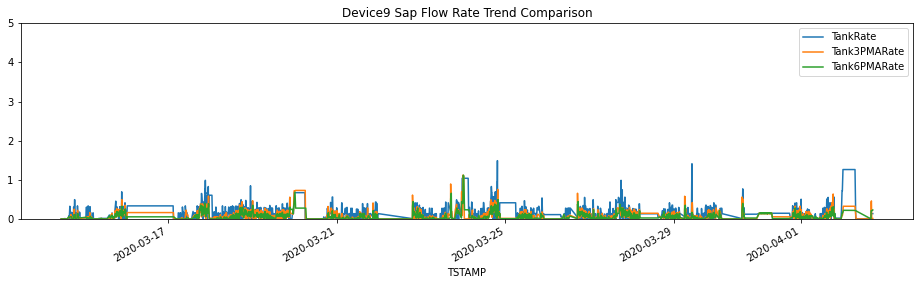

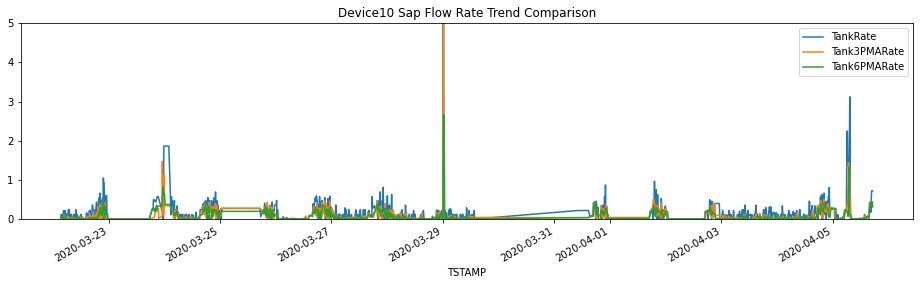

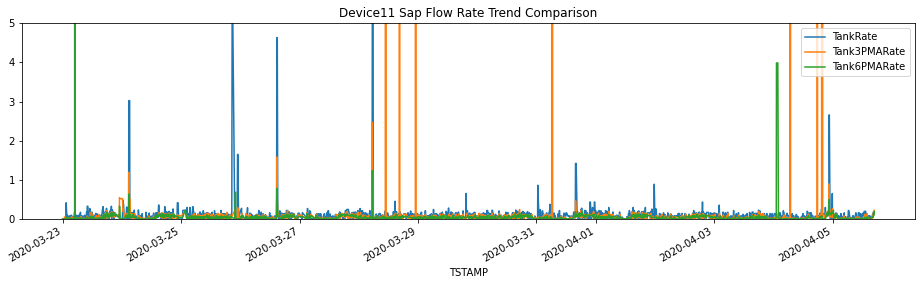

In [91]:
# plot the period sap flow rates for comparison

TankLevelCols = ['Tank', 'Tank3PMovAvg', 'Tank6PMovAvg']

for ii in good_ids:
    ( sap_devicesE[ii][TankRateCols]
     .plot(title = f'Device{ii} Sap Flow Rate Trend Comparison', ylim=(0,5), figsize = (16,4)) )


Per the trends, the mean and variance look reasonably stationary except for Device 5.

<AxesSubplot:title={'center':'Device7 Sap Rate Trend Comparison'}, xlabel='TSTAMP'>

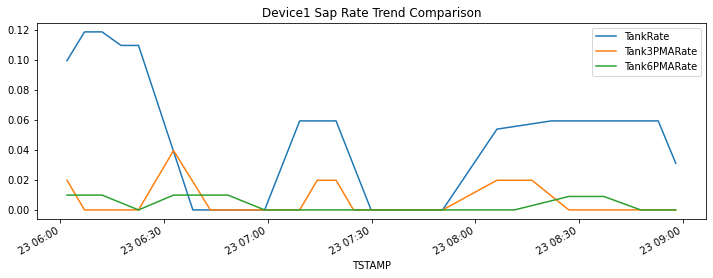

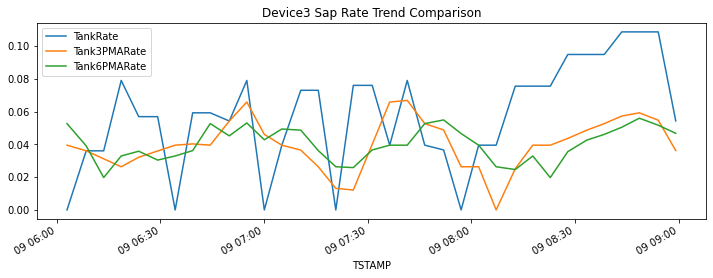

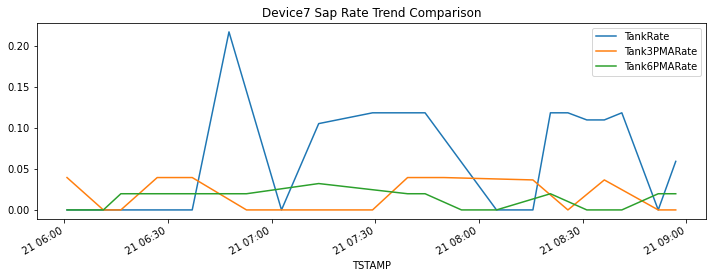

In [92]:
# zoom-in on some example flow rates

# device 1
( sap_devicesE[1].loc['2020-03-23 06:00':'2020-03-23 09:00'][TankRateCols]
     .plot(title = "Device1 Sap Rate Trend Comparison", figsize = (12,4)) )

# device 3
( sap_devicesE[3].loc['2020-03-09 06:00':'2020-03-09 09:00'][TankRateCols]
     .plot(title = "Device3 Sap Rate Trend Comparison", figsize = (12,4)) )

# device 7
( sap_devicesE[7].loc['2020-03-21 06:00':'2020-03-21 09:00'][TankRateCols]
     .plot(title = "Device7 Sap Rate Trend Comparison", figsize = (12,4)) )

Comparison of Tank Level and Tank Level Rate of Change

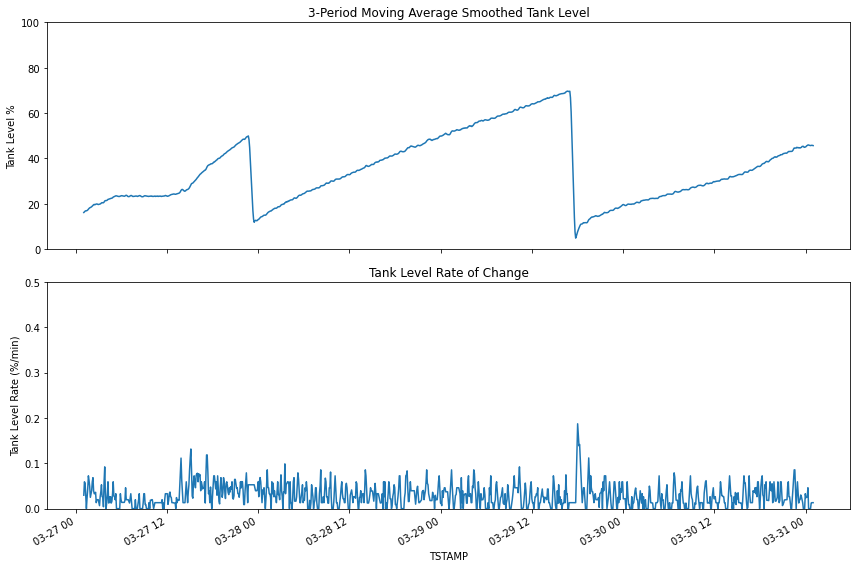

In [93]:
# plot tank rate by Temp by device
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(12,8))
# fig.suptitle(f'Sap Flow Rate (%/min) vs. Temperature (degF)', size = 20, y=1.02)

( sap_devicesE[6].loc['2020-03-27 01:00':'2020-03-31 01:00']['Tank3PMovAvg']
     .plot(ax=axs[0], title = "3-Period Moving Average Smoothed Tank Level", ylim=(0,100)) ) 

( sap_devicesE[6].loc['2020-03-27 01:00':'2020-03-31 01:00']['Tank3PMARate']
     .plot(ax=axs[1], title = "Tank Level Rate of Change", ylim=(0,0.5)) )

axs[0].set_xticklabels([])
axs[0].set_xlabel('')
axs[0].set_ylabel('Tank Level %')
axs[1].set_ylabel('Tank Level Rate (%/min)')

plt.tight_layout()

In [94]:
# device 7
# sap_devicesE[7].loc['2020-03-21 06:00':'2020-03-21 09:00']


### Review Autocorrelation of Sap Flow Rate

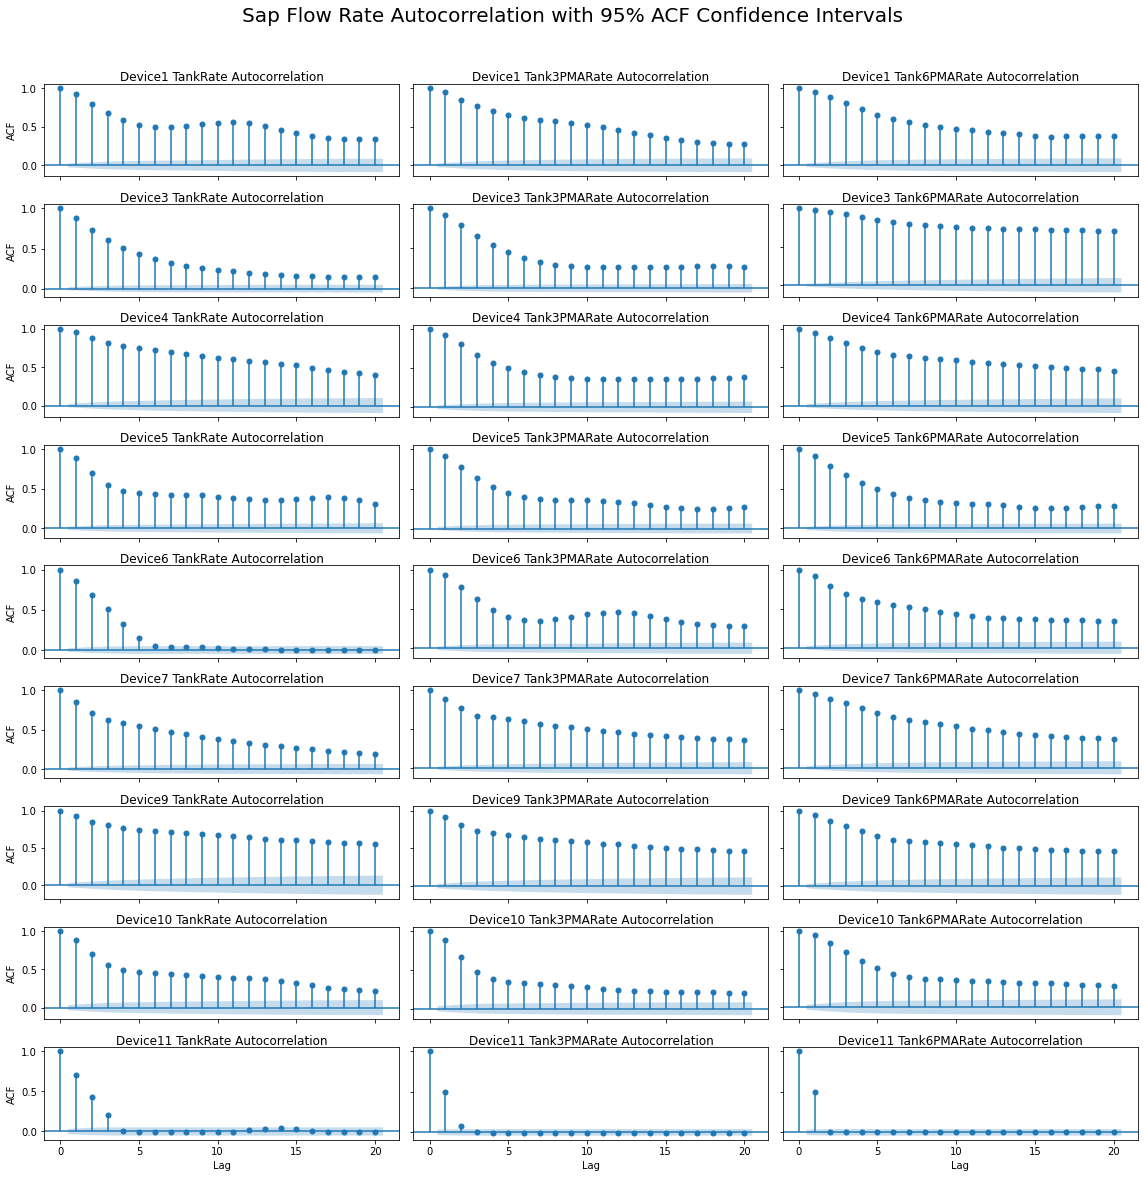

In [95]:
# plot tank rate Autocorrelation by device
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Sap Flow Rate Autocorrelation with 95% ACF Confidence Intervals', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create scatterplot for each device
    sm.graphics.tsa.plot_acf(sap_devicesE[ii]['TankRate'], ax=axs[c][0], lags=20)
    sm.graphics.tsa.plot_acf(sap_devicesE[ii]['Tank3PMARate'], ax=axs[c][1], lags=20)
    sm.graphics.tsa.plot_acf(sap_devicesE[ii]['Tank6PMARate'], ax=axs[c][2], lags=20)
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate Autocorrelation', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate Autocorrelation', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate Autocorrelation', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('ACF')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # label each x-axis
    axs[c][0].set_xlabel('Lag')
    axs[c][1].set_xlabel('Lag')
    axs[c][2].set_xlabel('Lag')    
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
        axs[c][0].set_xlabel('')
        axs[c][1].set_xlabel('')
        axs[c][2].set_xlabel('')    
    # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1
    
plt.tight_layout()    

### Review Partial Autocorrelation of Sap Flow Rate

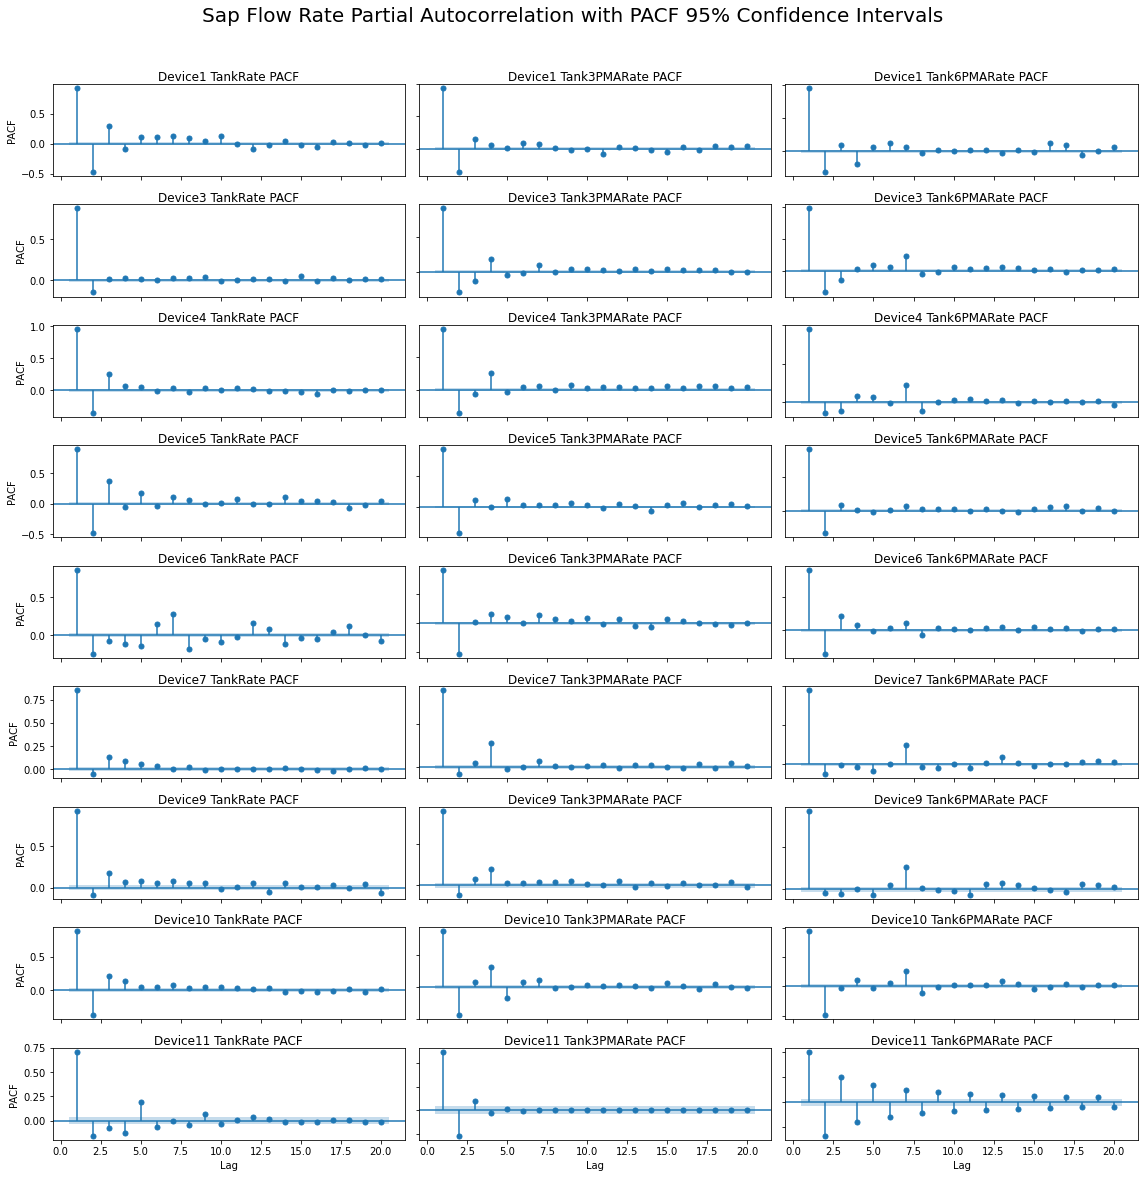

In [96]:
# plot tank rate Partial Autocorrelation by device
%matplotlib inline

import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, axs = plt.subplots(ncols=3, nrows=len(good_ids), figsize=(16,16))
fig.suptitle(f'Sap Flow Rate Partial Autocorrelation with PACF 95% Confidence Intervals', size = 20, y=1.02)

# seed subplot row counter
c = 0
for ii in good_ids:
    # create scatterplot for each device
    sm.graphics.tsa.plot_pacf(sap_devicesE[ii]['TankRate'], ax=axs[c][0], lags=20, zero=False)
    sm.graphics.tsa.plot_pacf(sap_devicesE[ii]['Tank3PMARate'], ax=axs[c][1], lags=20, zero=False)
    sm.graphics.tsa.plot_pacf(sap_devicesE[ii]['Tank6PMARate'], ax=axs[c][2], lags=20, zero=False)
    # title each subplot
    axs[c][0].set_title(f'Device{ii} TankRate PACF', size=12, y=0.97)
    axs[c][1].set_title(f'Device{ii} Tank3PMARate PACF', size=12, y=0.97)
    axs[c][2].set_title(f'Device{ii} Tank6PMARate PACF', size=12, y=0.97)
    # label each y-axis
    axs[c][0].set_ylabel('PACF')
    axs[c][1].set_ylabel('')
    axs[c][2].set_ylabel('')
    # label each x-axis
    axs[c][0].set_xlabel('Lag')
    axs[c][1].set_xlabel('Lag')
    axs[c][2].set_xlabel('Lag')    
    # remove x-axis tick labels except for bottom row
    if c != (len(good_ids)-1):
        axs[c][0].set_xticklabels([])
        axs[c][1].set_xticklabels([])
        axs[c][2].set_xticklabels([])    
        axs[c][0].set_xlabel('')
        axs[c][1].set_xlabel('')
        axs[c][2].set_xlabel('')    
    # remove y-axis tick labels except for left column
    axs[c][1].set_yticklabels([])
    axs[c][2].set_yticklabels([])   
    # incremement subplot row counter
    c += 1
    
plt.tight_layout()    

## Add Features for Supervised ML Modeling

ML modeling will need informative features to help predict future rates based on current process conditions, as well as estimated future process conditions.  

For example to predict rates 144 periods ahead (about 12 hours ahead), we will pull forward the 144th period from current as the 'Target' predicted value.

We will also assume that future process conditions, such as temperature, can be supplied as estimated values based on future weather forecasts.  If future weather forecasts cannot be obtained, then values will be estimated by taking values from the past day.

In [97]:
TankTgtCols = ['TankTgt1P', 'TankTgt6P', 'TankTgt12P', 'TankTgt36P', 'TankTgt72P', 'TankTgt144P', 'TankTgt288P']
TankTgtCols3PMA = ['Tank3PMATgt1P', 'Tank3PMATgt6P', 'Tank3PMATgt12P', 'Tank3PMATgt36P', 'Tank3PMATgt72P', 'Tank3PMATgt144P', 'Tank3PMATgt288P']
TankTgtCols6PMA = ['Tank6PMATgt1P', 'Tank6PMATgt6P', 'Tank6PMATgt12P', 'Tank6PMATgt36P', 'Tank6PMATgt72P', 'Tank6PMATgt144P', 'Tank6PMATgt288P']

RateTgtCols = ['TankRateTgt1P', 'TankRateTgt6P', 'TankRateTgt12P', 'TankRateTgt36P', 'TankRateTgt72P', 'TankRateTgt144P', 'TankRateTgt288P']
RateTgtCols3PMA = ['Tank3PMARateTgt1P', 'Tank3PMARateTgt6P', 'Tank3PMARateTgt12P', 'Tank3PMARateTgt36P', 'Tank3PMARateTgt72P', 'Tank3PMARateTgt144P', 'Tank3PMARateTgt288P']
RateTgtCols6PMA = ['Tank6PMARateTgt1P', 'Tank6PMARateTgt6P', 'Tank6PMARateTgt12P', 'Tank6PMARateTgt36P', 'Tank6PMARateTgt72P', 'Tank6PMARateTgt144P', 'Tank6PMARateTgt288P']
TgtPeriods = [-1, -6, -12, -36, -72, -144, -288]

freezetgt_ind_cols = [['FreezeTgt1P.1hr', 'FreezeTgt1P.1-3hr', 'FreezeTgt1P.3-6hr'],
                      ['FreezeTgt6P.1hr', 'FreezeTgt6P.1-3hr', 'FreezeTgt6P.3-6hr'],
                      ['FreezeTgt12P.1hr', 'FreezeTgt12P.1-3hr', 'FreezeTgt12P.3-6hr'],
                      ['FreezeTgt36P.1hr', 'FreezeTgt36P.1-3hr', 'FreezeTgt36P.3-6hr'],
                      ['FreezeTgt72P.1hr', 'FreezeTgt72P.1-3hr', 'FreezeTgt72P.3-6hr'],
                      ['FreezeTgt144P.1hr', 'FreezeTgt144P.1-3hr', 'FreezeTgt144P.3-6hr'],
                      ['FreezeTgt288P.1hr', 'FreezeTgt288P.1-3hr', 'FreezeTgt288P.3-6hr']]

freeze_ind_offsets = [(-1,0), (-3,-1), (-6,-3)]



In [98]:
# create empty dict to hold data frames
sap_devicesF = {}

# replace negative Tank Level Rate values with NaN
# (using deep copy to eliminate pointer to referenced df)
for ii in good_ids:
    sap_devicesF[ii] = sap_devicesE[ii].copy()
    for cc in range(len(TankTgtCols)):
        #TankTgts
        sap_devicesF[ii][TankTgtCols[cc]] = sap_devicesF[ii]['Tank'].shift(TgtPeriods[cc])
        #Tank3PAMATgts
        sap_devicesF[ii][TankTgtCols3PMA[cc]] = sap_devicesF[ii]['Tank3PMovAvg'].shift(TgtPeriods[cc])
        #Tank6PAMATgts
        sap_devicesF[ii][TankTgtCols6PMA[cc]] = sap_devicesF[ii]['Tank6PMovAvg'].shift(TgtPeriods[cc])
        
        #TankRateTgts
        sap_devicesF[ii][RateTgtCols[cc]] = sap_devicesF[ii]['TankRate'].shift(TgtPeriods[cc])
        #Tank3PAMARateTgts
        sap_devicesF[ii][RateTgtCols3PMA[cc]] = sap_devicesF[ii]['Tank3PMARate'].shift(TgtPeriods[cc])
        #Tank6PAMARateTgts
        sap_devicesF[ii][RateTgtCols6PMA[cc]] = sap_devicesF[ii]['Tank6PMARate'].shift(TgtPeriods[cc])

        # compute the Tgt X-hr period freeze indicators
        for ff in range(len(freeze_ind_offsets)):
            # populate series of freeze indicators per device dataframe
            freeze_series = sap_devicesF[ii]['Freeze'].shift(TgtPeriods[cc])
            # applies a rolling window to the dataframe to return single row-by-rows with the index (time index) for the calculation
            sap_devicesF[ii][freezetgt_ind_cols[cc][ff]] = \
            sap_devicesF[ii]['Freeze'].rolling(window=1, min_periods=1) \
            .apply(freeze_period, args=(freeze_ind_offsets[ff],freeze_series), raw=False).astype('bool')
        
        


In [99]:
sap_devicesF[3].head()

sap_devicesF[3].tail(20)

DEVICE_ID  TempF  Tank    Vac  HourUTC  \
TSTAMP                                                            
2020-04-01 19:21:20.093          3   46.8  24.0  27.34       19   
2020-04-01 19:26:24.093          3   46.6  24.2  27.32       19   
2020-04-01 19:31:52.130          3   46.4  24.4  27.27       19   
2020-04-01 19:36:56.130          3   46.1  24.7  27.30       19   
2020-04-01 19:42:00.133          3   46.2  24.2  27.08       19   
2020-04-01 19:47:04.133          3   46.5  24.0  27.18       19   
2020-04-01 19:52:33.163          3   46.7  24.2  27.31       19   
2020-04-01 19:57:37.167          3   46.7  24.4  27.30       19   
2020-04-01 20:02:41.167          3   46.9  24.2  27.26       20   
2020-04-01 20:07:45.170          3   47.5  24.4  27.11       20   
2020-04-01 20:13:14.207          3   47.7  24.4  27.19       20   
2020-04-01 20:18:18.207          3   47.1  24.2  27.08       20   
2020-04-01 20:23:22.207          3   47.4  24.2  27.33       20   
2020-04-01 20:28:26.210          3   47.4  24.2  27.32       20   
2020-04-01 20:33:54.247          3   47.7  24.4  27.22       20   
2020-04-01 20:38:58.247          3   47.6  24.2  27.17       20   
2020-04-01 20:44:02.247          3   47.9  24.2  27.45       20   
2020-04-01 20:49:06.250          3   47.7  24.2  27.42       20   
2020-04-01 20:54:35.287          3   47.6  24.4  27.16       20   
2020-04-01 20:59:39.287          3   47.7  24.4  27.04       20   

                         elapsed_seconds  nonuniform_period  Tank3PMovAvg  \
TSTAMP                                                                      
2020-04-01 19:21:20.093          304.003              False     23.633333   
2020-04-01 19:26:24.093          304.000              False     23.833333   
2020-04-01 19:31:52.130          328.037              False     24.200000   
2020-04-01 19:36:56.130          304.000              False     24.433333   
2020-04-01 19:42:00.133          304.003              False     24.433333   
2020-04-01 19:47:04.133          304.000              False     24.300000   
2020-04-01 19:52:33.163          329.030              False     24.133333   
2020-04-01 19:57:37.167          304.004              False     24.200000   
2020-04-01 20:02:41.167          304.000              False     24.266667   
2020-04-01 20:07:45.170          304.003              False     24.333333   
2020-04-01 20:13:14.207          329.037              False     24.333333   
2020-04-01 20:18:18.207          304.000              False     24.333333   
2020-04-01 20:23:22.207          304.000              False     24.266667   
2020-04-01 20:28:26.210          304.003              False     24.200000   
2020-04-01 20:33:54.247          328.037              False     24.266667   
2020-04-01 20:38:58.247          304.000              False     24.266667   
2020-04-01 20:44:02.247          304.000              False     24.266667   
2020-04-01 20:49:06.250          304.003              False     24.200000   
2020-04-01 20:54:35.287          329.037              False     24.266667   
2020-04-01 20:59:39.287          304.000              False     24.333333   

                         Tank6PMovAvg  TankRate  ...  FreezeTgt144P.3-6hr  \
TSTAMP                                           ...                        
2020-04-01 19:21:20.093     23.483333  0.085330  ...                False   
2020-04-01 19:26:24.093     23.583333  0.078927  ...                False   
2020-04-01 19:31:52.130     23.766667  0.072017  ...                False   
2020-04-01 19:36:56.130     24.033333  0.065614  ...                False   
2020-04-01 19:42:00.133     24.133333  0.059211  ...                False   
2020-04-01 19:47:04.133     24.250000  0.059211  ...                False   
2020-04-01 19:52:33.163     24.283333  0.052280  ...                False   
2020-04-01 19:57:37.167     24.316667  0.045877  ...                False   
2020-04-01 20:02:41.167     24.283333  0.039473  ...                False   
2020-04-

## Save Cleansed Dataset for Modeling

### Save all_devices dataframe to CSV file

In [100]:
# combine device dataframes into a single dataframe
# (using deep copy to eliminate pointer to referenced df)
ctr = 0
for ii in good_ids:
    if ctr == 0:
        all_devicesF = sap_devicesF[ii].copy().reset_index()
    else:
        all_devicesF = all_devicesF.append(sap_devicesF[ii].copy().reset_index())
    ctr += 1
    
all_devicesF.to_csv('sap_cleansed_alldevices.csv', index=False, header=True)